# Section 1

1.1 Protein annotations 

In [ ]:
# Extract protein IDs from a FASTA alignment file

badAaCharacters = "X"

def extractFastaInfo(fastaAlignment):
  
    """ 
    FASTA file alignment
    """

    # Read the file    
    fin = open(fastaAlignment)
    lines = fin.readlines()
    fin.close()

    startReading = True
    seqAlignments = {}
    seqIdList = []
    
    for line in lines:        

      cols = line.split()

      if cols:
      
        if cols[0].startswith('>'):
          seqId = cols[0][1:].strip()
          
            
        if seqId.startswith('UniRef90_'):
          seqId = seqId[9:].strip()
          
          seqIdList.append(seqId)
        
        else:
          if seqId not in seqAlignments.keys():
            seqAlignments[seqId] = cols[0].upper()
          else:
            # Multiline FASTA
            seqAlignments[seqId] += cols[0].upper()
            
    
    for seqId in list(seqAlignments.keys()):
      for badAaChar in badAaCharacters:
        if seqAlignments[seqId].count(badAaChar):
          print("Removing sequence {}, contains {} character".format(seqId,badAaChar))
          del(seqAlignments[seqId])
          break

    return (seqAlignments, seqIdList)


In [1]:
from apiFunctions import uniprotDownload, enaDownload
from utils import extractFastaInfo, extractClustalInfo
import pandas as pd

# Comment out the line below that you don't want to use, and change the filename!
# Note that the file has to be in the same directory as this Jupyter file
# Extract Ids from FASTA
(seqAlignInfo,seqIds) = extractFastaInfo("secondQ16543.fasta")
# Extract Ids from CLUSTAL
#(seqAlignInfo,seqIds) = extractClustalInfo("clustalExample.aln")

# Information for API
fileName="proteins.tab"
query="id:"+"+OR+id:".join(seqIds)
format="tab"

# You can find possible columns on this page https://www.uniprot.org/help/uniprotkb_column_names
columns="id,entry name,genes,organism,length,feature(MOTIF),comment(FUNCTION),interactor,families,comment(DOMAIN),3d,database(EMBL),database(GenBank),database(GeneID),lineage(all)"

# Download File
uniprotDownload(fileName,query=query, format=format, columns=columns)

# Show with Pandas
proteinInfo = pd.read_csv(fileName, sep="\t").set_index("Entry").sort_index()
proteinInfo

Entry name                             Gene names  \
Entry                                                                 
A0A091FHY8  A0A091FHY8_9AVES                             N303_15225   
A0A0B8RUH5  A0A0B8RUH5_BOIIR                                    NaN   
A0A1A7ZPF8  A0A1A7ZPF8_NOTFU                         CABZ01043370.1   
A0A1U7RP49  A0A1U7RP49_ALLSI                                  CDC37   
A0A1V4KY85  A0A1V4KY85_PATFA                     CDC37 AV530_000245   
A0A218U7F7  A0A218U7F7_9PASE                  CDC37_1 RLOC_00005237   
A0A2I3SMF7  A0A2I3SMF7_PANTR                                    NaN   
A0A2K5UTH8  A0A2K5UTH8_MACFA                                    NaN   
A0A2K6PMM1  A0A2K6PMM1_RHIRO                                    NaN   
A0A2K6T3R7  A0A2K6T3R7_SAIBB                                  CDC37   
A0A2U3Z8D5  A0A2U3Z8D5_LEPWE                           LOC102747171   
A0A3B3T5I2  A0A3B3T5I2_9TELE                                    NaN   
A0A3M0JGH0  A0A3M0JGH0_HIRRU                            DUI87_29808   
A0A3Q2UCH4  A0A3Q2UCH4_CHICK                                  CDC37   
A0A3Q3B1B3  A0A3Q3B1B3_KRYMA                                    NaN   
A0A3Q7R113  A0A3Q7R113_VULVU                                  CDC37   
A0A402FYL4  A0A402FYL4_9SAUR                          parPi_0025369   
A0A4D9DHP3  A0A4D9DHP3_9SAUR                         DR999_PMT21327   
A0A4W4GA37  A0A4W4GA37_ELEEL                                  CDC37   
A0A4X1V8J7    A0A4X1V8J7_PIG                                  CDC37   
A0A5F7ZMB1  A0A5F7ZMB1_MACMU                                  CDC37   
F6UJW3          F6UJW3_MONDO                                  CDC37   
F7DES9          F7DES9_ORNAN                                  CDC37   
F7DRC7          F7DRC7_MACMU                                  CDC37   
G1KI32          G1KI32_ANOCA                                  CDC37   
G1QVX5          G1QVX5_NOMLE                                    NaN   
G1RNK0          G1RNK0_NOMLE                                  CDC37   
G3U9M4          G3U9M4_LOXAF                                  CDC37   
H0X429          H0X429_OTOGA                                  CDC37   
H2LLR4          H2LLR4_ORYLA                                  cdc37   
H3AJQ8          H3AJQ8_LATCH                                  CDC37   
I3IZC1          I3IZC1_ORENI                                    NaN   
I3MQN7          I3MQN7_ICTTR                                  CDC37   
K7EKQ2          K7EKQ2_HUMAN                                  CDC37   
K7G5X4          K7G5X4_PELSI                                  CDC37   
L5L465          L5L465_PTEAL                      PAL_GLEAN10002424   
O57476           CDC37_CHICK                                  CDC37   
Q16543           CDC37_HUMAN                           CDC37 CDC37A   
Q28CE8          Q28CE8_XENTR  cdc37 pla2r1 slc6a12 TGas127m02.1-001   
Q5EAC6           CDC37_BOVIN                                  CDC37   
Q61081           CDC37_MOUSE                                  Cdc37   
V9KU08          V9KU08_CALMI                                    NaN   
W5ML97          W5ML97_LEPOC                                    NaN   

                                                     Organism  Length  Motif  \
Entry                                                                          
A0A091FHY8                    Cuculus canorus (common cuckoo)     340    NaN   
A0A0B8RUH5               Boiga irregularis (Brown tree snake)     378    NaN   
A0A1A7ZPF8       Nothobranchius furzeri (Turquoise killifish)     374    NaN   
A0A1U7RP49             Alligator sinensis (Chinese alligator)     376    NaN   
A0A1V4KY85                       Patagioenas fasciata monilis     376    NaN   
A0A218U7F7       Lonchura striata domestica (Bengalese finch)     328    NaN   
A0A2I3SMF7                       Pan troglodytes (Chimpanzee)     359    NaN   
A0A2K5UTH8  Macaca fascicularis (Crab-eating macaque) (Cyn...     348    NaN   
A0A2K6PMM1  Rhinopithe

In [ ]:
1.2 Info per protein sequence

In [2]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#seqIds =ids
seqsDict = {}
for seqId in seqAlignInfo.keys():
    seqsDict[seqId] = seqAlignInfo[seqId].replace("-","")
    
print(seqIds [1])
print(seqsDict[seqIds[1]])

X = ProteinAnalysis(seqsDict[seqIds[1]])

print("Number residues: {}".format(X.count_amino_acids()))
print("Number of A: {}".format(X.count_amino_acids()['A']))
print("Number of E: {}".format(X.count_amino_acids()['E']))

print("% of A: {:.2f}".format(X.get_amino_acids_percent()['A'] * 100))
print("MW: {:.2f}".format(X.molecular_weight()))
print("Aromaticity: {:.2f}".format(X.aromaticity()))
print("Instability: {:.2f}".format(X.instability_index()))
print("Isoelectric point: {:.2f}".format(X.isoelectric_point()))
print("Flexibility per residue: {}".format(X.flexibility()))

secStruc = X.secondary_structure_fraction()
print("{:.2f}".format(secStruc[0])) # Helix
print("{:.2f}".format(secStruc[1])) # b-sheet
print("{:.2f}".format(secStruc[2])) # coil


print(seqIds [2])
print(seqsDict[seqIds[2]])

X = ProteinAnalysis(seqsDict[seqIds[2]])

print("Number residues: {}".format(X.count_amino_acids()))
print("Number of A: {}".format(X.count_amino_acids()['A']))
print("Number of E: {}".format(X.count_amino_acids()['E']))

print("% of A: {:.2f}".format(X.get_amino_acids_percent()['A'] * 100))
print("MW: {:.2f}".format(X.molecular_weight()))
print("Aromaticity: {:.2f}".format(X.aromaticity()))
print("Instability: {:.2f}".format(X.instability_index()))
print("Isoelectric point: {:.2f}".format(X.isoelectric_point()))
print("Flexibility per residue: {}".format(X.flexibility()))

secStruc = X.secondary_structure_fraction()
print("{:.2f}".format(secStruc[0])) # Helix
print("{:.2f}".format(secStruc[1])) # b-sheet
print("{:.2f}".format(secStruc[2])) # coil

I3MQN7
MVDYSVWDHIEVSDDEDETHPNIDTASLFRWRHQARVERMEQFQKEKEELDRGCRECKRKVAECQRKLKELEVAEGGQAELERLQAEAQQLRKEERSWEQKLEEMRKKEKSMPWNVDTLSKDGFSKSMVNTKPEKAEEDSEEVREQKHKTFVEKYEKQIKHFGMLRRWDDSQKYLSDNVHLVCEETANYLVIWCIDLEVEEKCALMEQVAHQTIVMQFILELAKSLKVDPRACFRQFFTKIKTADRQYMEGFNDELEAFKERVRGRAKLRIEKAMKEYEAEERKKRLGPGGLDPVEVYESLPEELQKCFDVKDVQMLQDAISKMDPTDAKYHMQRCIDSGLWVPNSKSSEAKEGEEAGPGDPLLEAVPKSGDEKDVSA
Number residues: {'A': 24, 'C': 9, 'D': 27, 'E': 56, 'F': 12, 'G': 15, 'H': 8, 'I': 11, 'K': 40, 'L': 28, 'M': 13, 'N': 7, 'P': 12, 'Q': 21, 'R': 25, 'S': 20, 'T': 10, 'V': 25, 'W': 7, 'Y': 8}
Number of A: 24
Number of E: 56
% of A: 6.35
MW: 44353.64
Aromaticity: 0.07
Instability: 48.16
Isoelectric point: 5.16
Flexibility per residue: [0.9571071428571429, 0.968357142857143, 1.0080357142857144, 0.9559761904761905, 0.9779642857142857, 1.0203809523809524, 0.974404761904762, 1.0390476190476192, 1.034690476190476, 1.0480714285714288, 1.0629642857142858, 1.0512023809523807, 1.0607619047619048, 1.03, 1.02280952380

1.3 Predictions per residue

In [3]:
import requests
import json
import time

WAIT_TIME = 5
TOTAL_TIME = 3600

def createInputJson(seqsDict, outFile):
    """
    Create dict of form scaffold:sequence, filter out gaps from MSA itself
    """
    
    with open(outFile, 'w+') as outfile:
        json.dump(seqsDict, outfile, indent=4)

def getDataFromDisoMine(inputFile,outputFile):

    # Read input Json file
    file = open(inputFile, 'r')
    inputData = file.read()
    request_json = json.dumps(json.loads(inputData))
    request_json = request_json[:-1] + ', "extra_predictions":"true"}'
    
    # API Post URL
    post_url = "http://bio2byte.be/disomine/api/"

    # Make POST request with Json Input body
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary
    response = requests.post(post_url, json = request_json)
    
    queue_id = str(response.json()['queue_id'])
    
    # Validating Response Code
    assert response.status_code == 202
    
    print("Submitted with queue ID: {}...".format(queue_id))
        
    # Now get results - this will happen when results available or when time limit reached
    time_waited = 0    
    get_url = "http://bio2byte.be/disomine/api/queue/"
    
    while time_waited / TOTAL_TIME < 1.0:

      # Get Request
      response = requests.get(get_url + queue_id)
      
      if response.status_code == 202:
        print("  Waiting for results...")

      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
       
      else:
        print("Server error, response {}.".format(response.status_code))
        break
      
      time.sleep(WAIT_TIME)
      #time_waited += WAIT_TIME (IN THIS PART THE # WAS ADDED TO IGNORE THE WAITED TIME)

    # save the results to a json file
    predJsonData = json.dumps(queryResults)
    f = open(outputFile, "w")
    f.write(predJsonData)
    f.close()

    return queryResults


seqJsonFile = 'sequenceschaperon.json'
predJsonFile = 'predictionschaperon.json'

createInputJson(seqsDict,seqJsonFile)
results = getDataFromDisoMine(seqJsonFile,predJsonFile)
    
print(results)


Submitted with queue ID: 10375...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
{'id': 9961, 'results': [{'proteinID': 'A0A3B3T5I2', 'sequence': 'MTTIDYSVWDHIEVSDDEDDTHPNIDTPSLFRWRHQARVERMEQFQKKGGELEKVQVECKRKLAEVQKKLRELEFSATEEAKAELSQVRVEEKQLKKEEKECDKKMEEYRREEKKMPWNVDTLSKEGFSKSIMNVKPEIKEETEEEKEQKHKTFVEKYEKQIKHFGMLRRWDDSQKYLSDNPQLVCEETANYLVIMCIDLEVEEKHALMEQVAHQTIVMQFILELAKSLKVDPRGCFRQFFTKIKTADQQYQDAFNDELESFKERVRGRAKIRIEKAMKEYEEEERQKRLGPGGLDPVEVYESLPEEMQKCFDEKNIQMLQDAIS

1.4 Over all Biopython data 

In [4]:
import json

from Bio.SeqUtils.ProtParam import ProteinAnalysis
from utils import extractFastaInfo, extractClustalInfo

# Comment out the line below that you don't want to use, and change the filename, as in the other Jupyter sheet!
# Note that the file has to be in the same directory as this Jupyter file
# Extract Ids from FASTA
(seqAlignInfo,seqIds) = extractFastaInfo("secondQ16543.fasta")
# Extract Ids from CLUSTAL
#(seqAlignInfo,seqIds) = extractClustalInfo("clustalExample.aln")

# Now we are going to calculate all the biopython features for all sequences, and save the result in a JSON file
# that we can later load again
seqsDict = {}
for seqId in seqAlignInfo.keys():
    # Here we take out all the gaps '-' from the sequences, otherwise they won't be predicted correctly!
    seqsDict[seqId] = seqAlignInfo[seqId].replace("-","")

# This is a python list with all the Uniprot IDs of the sequences in the MSA
seqIds = list(seqsDict.keys())

# This is a python dictionary that we will use to store all biopython calculated information.
# We here already set up all the labels (keys in python terminology) to store the different types of data
biopythonInformation = {
    
    'aminoAcidNumbers': {},
    'aminoAcidFractions': {},
    'molecularWeights': {},
    'aromaticity': {},
    'instability': {},
    'isoelectricPoint': {},
    'flexibility': {},
    'helixFraction': {},
    'sheetFraction': {},
    'coilFraction': {}

}

# Here 'looping' over all the sequences and calculating the relevant information
for seqId in seqIds:
    
    # See last Jupyter page, this is Biopython code
    x = ProteinAnalysis(seqsDict[seqId])
    secStruc = x.secondary_structure_fraction()
    
    # Here there will be twenty values, one per amino acid type
    biopythonInformation['aminoAcidNumbers'][seqId] = x.count_amino_acids()
    biopythonInformation['aminoAcidFractions'][seqId] = x.get_amino_acids_percent()
    
    # These are per-protein values, so only one per protein
    biopythonInformation['molecularWeights'][seqId] = x.molecular_weight()
    biopythonInformation['aromaticity'][seqId] = x.aromaticity()
    biopythonInformation['instability'][seqId] = x.instability_index()
    biopythonInformation['isoelectricPoint'][seqId] = x.isoelectric_point()
    
    # Here we access the secondary structure fraction information from the secStruc
    # list, so [0] is the first element, [1] the second, ...
    biopythonInformation['helixFraction'][seqId] = secStruc[0]
    biopythonInformation['sheetFraction'][seqId] = secStruc[1]
    biopythonInformation['coilFraction'][seqId] = secStruc[2]

    # The flexibility are per-residue values, so one per amino acid in the sequence.
    # This calculates 9 values less than there actually are in the sequence, so cannot be 
    # directly connected to the dynaMine data. The first five and last four residues are missing.
    biopythonInformation['flexibility'][seqId] = x.flexibility()
    
print(biopythonInformation)

# The info will be stored in this file
outFile = 'biopythonchaperon.json'
with open(outFile, 'w+') as outfile:
        json.dump(biopythonInformation, outfile, indent=4)

{'aminoAcidNumbers': {'Q16543': {'A': 22, 'C': 9, 'D': 27, 'E': 57, 'F': 12, 'G': 15, 'H': 8, 'I': 11, 'K': 41, 'L': 28, 'M': 13, 'N': 7, 'P': 12, 'Q': 20, 'R': 25, 'S': 18, 'T': 12, 'V': 26, 'W': 7, 'Y': 8}, 'I3MQN7': {'A': 24, 'C': 9, 'D': 27, 'E': 56, 'F': 12, 'G': 15, 'H': 8, 'I': 11, 'K': 40, 'L': 28, 'M': 13, 'N': 7, 'P': 12, 'Q': 21, 'R': 25, 'S': 20, 'T': 10, 'V': 25, 'W': 7, 'Y': 8}, 'H0X429': {'A': 22, 'C': 9, 'D': 27, 'E': 57, 'F': 12, 'G': 14, 'H': 8, 'I': 11, 'K': 41, 'L': 28, 'M': 13, 'N': 8, 'P': 13, 'Q': 20, 'R': 25, 'S': 20, 'T': 9, 'V': 26, 'W': 7, 'Y': 8}, 'Q5EAC6': {'A': 23, 'C': 9, 'D': 28, 'E': 57, 'F': 12, 'G': 16, 'H': 8, 'I': 11, 'K': 40, 'L': 28, 'M': 13, 'N': 7, 'P': 10, 'Q': 21, 'R': 25, 'S': 21, 'T': 12, 'V': 24, 'W': 7, 'Y': 8}, 'L5L465': {'A': 38, 'C': 11, 'D': 29, 'E': 62, 'F': 12, 'G': 33, 'H': 9, 'I': 13, 'K': 43, 'L': 38, 'M': 15, 'N': 10, 'P': 27, 'Q': 24, 'R': 47, 'S': 35, 'T': 11, 'V': 33, 'W': 11, 'Y': 8}, 'Q61081': {'A': 24, 'C': 9, 'D': 27, 'E':

1.5 Pairwise Sequence distances

In [5]:
from Bio import Align
from Bio.Align import substitution_matrices

# Set up the alignment procedure. You can modify the parameters, up to you how to calculate the distances between
# sequences
aligner = Align.PairwiseAligner()
aligner.open_gap_score=-6
aligner.extend_gap_score=-2
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62") # Other default matrices are available as well
aligner.mode = 'global' # Can be 'local', 'global'

# We now have to calculate all the pairwise scores between sequences, so we are comparing all sequences to all other
# sequences. Try some print() statements in there to see what's going on if you want to understand the code

sequenceDistances = {}
for firstSeqIndex in range(len(seqIds)-1):
    firstSeqId = seqIds[firstSeqIndex]
    if firstSeqId not in sequenceDistances.keys():
        sequenceDistances[firstSeqId] = {}
    for secondSeqIndex in range(firstSeqIndex+1,len(seqIds)):
        secondSeqId = seqIds[secondSeqIndex]
        alignments = aligner.align(seqsDict[firstSeqId], seqsDict[secondSeqId])
        
        alignmentScore = alignments[0].score
        
        # Keeping track of both combinations, might not be necessary
        sequenceDistances[firstSeqId][secondSeqId] = alignmentScore
        
        if secondSeqId not in sequenceDistances.keys():
            sequenceDistances[secondSeqId] = {}
        sequenceDistances[secondSeqId][firstSeqId] = alignmentScore

        print(firstSeqId, secondSeqId, alignmentScore)
        #print(alignment[0])


# The info will be stored in this file
outFile = 'seqDistanceschaperon_1.json'
with open(outFile, 'w+') as outfile:
        json.dump(sequenceDistances, outfile, indent=4)


D:\ANACODA\lib\site-packages\Bio\Align\substitution_matrices\__init__.py:21: BiopythonExperimentalWarning: Bio.Align.substitution_matrices is an experimental module which may still undergo significant changes. In particular, the location of this module may change, and the Array class defined in this module may be moved to other existing or new modules in Biopython.
  BiopythonExperimentalWarning)


Q16543 I3MQN7 1962.0
Q16543 H0X429 1956.0
Q16543 Q5EAC6 1930.0
Q16543 L5L465 1655.0
Q16543 Q61081 1900.0
Q16543 A0A5F7ZMB1 1743.0
Q16543 F7DRC7 1700.0
Q16543 A0A3Q7R113 1713.0
Q16543 G1RNK0 1681.0
Q16543 F6UJW3 1734.0
Q16543 G3U9M4 1713.0
Q16543 A0A2U3Z8D5 1622.0
Q16543 UPI00042BF012 1690.0
Q16543 O57476 1662.0
Q16543 A0A1V4KY85 1668.0
Q16543 A0A3Q2UCH4 1414.0
Q16543 A0A402FYL4 1646.0
Q16543 UPI0009E5B7FA 1644.0
Q16543 K7G5X4 1650.0
Q16543 A0A2I3SMF7 1620.0
Q16543 G1KI32 1614.0
Q16543 F7DES9 1632.0
Q16543 A0A1U7RP49 1598.0
Q16543 G1QVX5 1607.0
Q16543 H3AJQ8 1587.0
Q16543 A0A0B8RUH5 1586.0
Q16543 A0A4D9DHP3 1458.0
Q16543 UPI001185050B 1558.0
Q16543 A0A2K5UTH8 1535.0
Q16543 A0A4X1V8J7 1463.0
Q16543 W5ML97 1529.0
Q16543 K7EKQ2 1325.0
Q16543 A0A2K6PMM1 1514.0
Q16543 A0A218U7F7 1424.0
Q16543 Q28CE8 1501.0
Q16543 A0A091FHY8 1437.0
Q16543 I3IZC1 1497.0
Q16543 V9KU08 1492.0
Q16543 UPI0011F3A40C 1494.0
Q16543 UPI0006B0BF67 1277.0
Q16543 H2LLR4 1484.0
Q16543 A0A3M0JGH0 1482.0
Q16543 A0A3Q3B1B3 1

G1RNK0 Q28CE8 1396.0
G1RNK0 A0A091FHY8 1267.0
G1RNK0 I3IZC1 1352.0
G1RNK0 V9KU08 1330.0
G1RNK0 UPI0011F3A40C 1345.0
G1RNK0 UPI0006B0BF67 1102.0
G1RNK0 H2LLR4 1361.0
G1RNK0 A0A3M0JGH0 1377.0
G1RNK0 A0A3Q3B1B3 1349.0
G1RNK0 A0A1A7ZPF8 1347.0
G1RNK0 A0A3B3T5I2 1356.0
G1RNK0 UPI00109F6845 1358.0
G1RNK0 A0A4W4GA37 1327.0
G1RNK0 UPI0004F0A91E 1237.0
G1RNK0 A0A2K6T3R7 1171.0
F6UJW3 G3U9M4 1519.0
F6UJW3 A0A2U3Z8D5 1408.0
F6UJW3 UPI00042BF012 1482.0
F6UJW3 O57476 1697.0
F6UJW3 A0A1V4KY85 1685.0
F6UJW3 A0A3Q2UCH4 1466.0
F6UJW3 A0A402FYL4 1703.0
F6UJW3 UPI0009E5B7FA 1698.0
F6UJW3 K7G5X4 1711.0
F6UJW3 A0A2I3SMF7 1399.0
F6UJW3 G1KI32 1686.0
F6UJW3 F7DES9 1700.0
F6UJW3 A0A1U7RP49 1654.0
F6UJW3 G1QVX5 1381.0
F6UJW3 H3AJQ8 1601.0
F6UJW3 A0A0B8RUH5 1654.0
F6UJW3 A0A4D9DHP3 1543.0
F6UJW3 UPI001185050B 1578.0
F6UJW3 A0A2K5UTH8 1319.0
F6UJW3 A0A4X1V8J7 1358.0
F6UJW3 W5ML97 1567.0
F6UJW3 K7EKQ2 1219.0
F6UJW3 A0A2K6PMM1 1310.0
F6UJW3 A0A218U7F7 1470.0
F6UJW3 Q28CE8 1554.0
F6UJW3 A0A091FHY8 1471.0
F6UJW3 I3I

K7G5X4 UPI0006B0BF67 1410.0
K7G5X4 H2LLR4 1478.0
K7G5X4 A0A3M0JGH0 1575.0
K7G5X4 A0A3Q3B1B3 1509.0
K7G5X4 A0A1A7ZPF8 1496.0
K7G5X4 A0A3B3T5I2 1508.0
K7G5X4 UPI00109F6845 1495.0
K7G5X4 A0A4W4GA37 1442.0
K7G5X4 UPI0004F0A91E 1481.0
K7G5X4 A0A2K6T3R7 1216.0
A0A2I3SMF7 G1KI32 1306.0
A0A2I3SMF7 F7DES9 1310.0
A0A2I3SMF7 A0A1U7RP49 1318.0
A0A2I3SMF7 G1QVX5 1620.0
A0A2I3SMF7 H3AJQ8 1272.0
A0A2I3SMF7 A0A0B8RUH5 1290.0
A0A2I3SMF7 A0A4D9DHP3 1135.0
A0A2I3SMF7 UPI001185050B 1268.0
A0A2I3SMF7 A0A2K5UTH8 1425.0
A0A2I3SMF7 A0A4X1V8J7 1220.0
A0A2I3SMF7 W5ML97 1222.0
A0A2I3SMF7 K7EKQ2 1009.0
A0A2I3SMF7 A0A2K6PMM1 1383.0
A0A2I3SMF7 A0A218U7F7 1119.0
A0A2I3SMF7 Q28CE8 1204.0
A0A2I3SMF7 A0A091FHY8 1170.0
A0A2I3SMF7 I3IZC1 1206.0
A0A2I3SMF7 V9KU08 1210.0
A0A2I3SMF7 UPI0011F3A40C 1203.0
A0A2I3SMF7 UPI0006B0BF67 971.0
A0A2I3SMF7 H2LLR4 1200.0
A0A2I3SMF7 A0A3M0JGH0 1175.0
A0A2I3SMF7 A0A3Q3B1B3 1201.0
A0A2I3SMF7 A0A1A7ZPF8 1198.0
A0A2I3SMF7 A0A3B3T5I2 1207.0
A0A2I3SMF7 UPI00109F6845 1179.0
A0A2I3SMF7 A0A4W4GA3

Q28CE8 A0A4W4GA37 1391.0
Q28CE8 UPI0004F0A91E 1295.0
Q28CE8 A0A2K6T3R7 1126.0
A0A091FHY8 I3IZC1 1318.0
A0A091FHY8 V9KU08 1290.0
A0A091FHY8 UPI0011F3A40C 1281.0
A0A091FHY8 UPI0006B0BF67 1322.0
A0A091FHY8 H2LLR4 1281.0
A0A091FHY8 A0A3M0JGH0 1395.0
A0A091FHY8 A0A3Q3B1B3 1295.0
A0A091FHY8 A0A1A7ZPF8 1297.0
A0A091FHY8 A0A3B3T5I2 1296.0
A0A091FHY8 UPI00109F6845 1295.0
A0A091FHY8 A0A4W4GA37 1225.0
A0A091FHY8 UPI0004F0A91E 1609.0
A0A091FHY8 A0A2K6T3R7 1080.0
I3IZC1 V9KU08 1492.0
I3IZC1 UPI0011F3A40C 1659.0
I3IZC1 UPI0006B0BF67 1179.0
I3IZC1 H2LLR4 1692.0
I3IZC1 A0A3M0JGH0 1387.0
I3IZC1 A0A3Q3B1B3 1758.0
I3IZC1 A0A1A7ZPF8 1735.0
I3IZC1 A0A3B3T5I2 1656.0
I3IZC1 UPI00109F6845 1516.0
I3IZC1 A0A4W4GA37 1582.0
I3IZC1 UPI0004F0A91E 1313.0
I3IZC1 A0A2K6T3R7 1140.0
V9KU08 UPI0011F3A40C 1420.0
V9KU08 UPI0006B0BF67 1137.0
V9KU08 H2LLR4 1475.0
V9KU08 A0A3M0JGH0 1372.0
V9KU08 A0A3Q3B1B3 1460.0
V9KU08 A0A1A7ZPF8 1450.0
V9KU08 A0A3B3T5I2 1453.0
V9KU08 UPI00109F6845 1527.0
V9KU08 A0A4W4GA37 1368.0
V9KU08 UPI0

1.6 Combining in Dataframe

In [6]:
import json
import pandas as pd

# Load in the data files we generated - note that you can always update these by running
# one of the previous cells. Make sure you keep a copy of the original though, just in case
# things go wrong

#
# The csv file from uniprot
#
fileName = "proteins.tab"
proteinData = pd.read_csv(fileName, sep="\t").set_index("Entry").sort_index()

#
# The predictions from DynaMine, ...
#
dynaminePredFile = 'predictionschaperon.json'
file = open(dynaminePredFile, 'r')
input = file.read()
dynamineRawData = json.loads(input)
# Reorganising this data bit to make it easier to use
dynaMineData = {}
dynaMineValueTypes = ['disomine', 'backbone', 'sidechain', 'efoldmine']
for dynaMineValueType in dynaMineValueTypes:
    dynaMineData[dynaMineValueType] = {}
    
for resultDict in dynamineRawData['results']:
    proteinID = resultDict['proteinID']
    for dynaMineValueType in dynaMineValueTypes:
        dynaMineData[dynaMineValueType][proteinID] = resultDict[dynaMineValueType]

#
# The biopython data
#
bioPythonFile = 'biopythonchaperon.json'
file = open(bioPythonFile, 'r')
input = file.read()
bioPythonData = json.loads(input)

#
# The sequence distance data - is not used here because it relates to two proteins at the
# same time (is a matrix, essentially)
#
seqDistanceFile ='seqDistanceschaperonlocal_1.json'
file = open(seqDistanceFile, 'r')
input = file.read()
seqDistData = json.loads(input)


# The uniprot identifiers are shared, so we can use that to add information to the pandas dataframe
# from uniprot. We can in fact store most information in there, except for the sequence distance matrix,
# which we will have to treat differently.

# This gets the keys from the pandas dataframe
uniprotKeys = proteinData.index.values.tolist()

# We add first the data from disoMine/dynaMine, then biopython
for dictToAdd in (dynaMineData,bioPythonData):
    
    # These are the data labels for each dataset
    dataLabels = dictToAdd.keys()
    print(dataLabels)
    
    # We enter the data into the saveframe per data type
    for dataLabel in dataLabels:
        dataList = []
        
        # We get the data per uniprot ID, in the same order as in the pandas dataframe, to
        # create a list of values
        for uniprotKey in uniprotKeys:
            dataList.append(dictToAdd[dataLabel][uniprotKey])
        
        # We then add this list of values to the pandas dataframe, and now have the data available in there
        proteinData[dataLabel] = dataList


dict_keys(['disomine', 'backbone', 'sidechain', 'efoldmine'])
dict_keys(['aminoAcidNumbers', 'aminoAcidFractions', 'molecularWeights', 'aromaticity', 'instability', 'isoelectricPoint', 'flexibility', 'helixFraction', 'sheetFraction', 'coilFraction'])


1.7 Export to SPSS

In [7]:
import pyreadstat
import numpy

# First we make a copy of the pandas dataframe, as we need to modify it
# in order to get all the data across to SPSS
proteinDataCopy = proteinData.copy()

# SPSS does not accept all characters in column names, so doing some renaming here
proteinDataCopy.rename(columns={"Entry name": "uniprotID",
                            "Gene names": "geneNames",
                            "3D": "StructureAvailable",
                            "Cross-reference (EMBL)": "EMBL",
                            "Cross-reference (GenBank)": "GenBank",
                            "Cross-reference (GeneID)": "GeneID",
                            "Taxonomic lineage": "TaxonomicLineage",
                            "Taxonomic lineage (all)": "TaxonomicLineageAll",
                            "Function [CC]": "functionCC",
                            "Interacts with": "interactsWith",
                            "Domain [CC]": "domainCC",
                            "Protein families": "proteinFamilies",
                            "Length": "length",
                            "Motif":"featureMOTIF"
                           },inplace=True)

# Instead of giving SPSS the list of the predicted values for all residues per protein,
# we are here calculating the mean value for that list, so that we end up with a single
# value for each protein. This can then be used for, for example, PCA or cluster analysis
# In addition, for the amino acids a separate column has to be made, as SPSS cannot deal
# with the Python dictionaries
for dataName in proteinDataCopy.columns:
    dataValuesList = proteinDataCopy[dataName]
    # Check whether this is a list of values
    if type(dataValuesList[0]) == type([]):
        # If this is a list, then take the mean value and replace the original values
        dataValuesList = [numpy.mean(dataList) for dataList in dataValuesList[:]]
        print(dataName,dataValuesList[0])
        proteinDataCopy[dataName] = dataValuesList
    elif type(dataValuesList[0]) == type({}):
        # If this is a dictionary, make new columns per dictionary entry with the values
        for aaKey in dataValuesList[0]:
            dataLabel = "{}_{}".format(dataName,aaKey)
            proteinDataCopy[dataLabel] = [dataList[aaKey] for dataList in dataValuesList]
            print(dataLabel, proteinDataCopy[dataLabel][0])
        # Removing the original column, no use for SPSS
        del(proteinDataCopy[dataName])
    else:  
        print(dataName,dataValuesList[0])

# Names of all the data columns
print(proteinDataCopy.columns)

# Dump all data
pyreadstat.write_sav(proteinDataCopy,'proteinDatachaperon11.sav')

# Dump only specific columns of the data
pyreadstat.write_sav(proteinDataCopy[['helixFraction','sheetFraction','coilFraction']],'proteinDataSubsetchaperon11.sav')


# Here we also reorganise the distance data for SPSS, and save it, so that you can do a clustering 
# analysis in SPSS using directly this distance data. Note that you can also do a clustering based
# on other characteristics from the proteinData.sav file!
distanceMatrix = pd.DataFrame.from_dict(sequenceDistances)
pyreadstat.write_sav(distanceMatrix,'distanceMatrixchaperon11.sav')



uniprotID A0A091FHY8_9AVES
geneNames N303_15225
Organism Cuculus canorus (common cuckoo)
length 340
featureMOTIF nan
functionCC nan
interactsWith nan
proteinFamilies nan
domainCC nan
StructureAvailable nan
EMBL KL447009;
GenBank nan
GeneID nan
TaxonomicLineageAll cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Sauropsida, Sauria (diapsids), Archelosauria, Archosauria, Dinosauria, Saurischia, Theropoda, Coelurosauria, Aves, Neognathae, Cuculiformes (cuckoos and others), Cuculidae (cuckoos), Cuculus, Cuculus canorus (common cuckoo)
disomine 0.2357284553020316
backbone 0.7899032352941175
sidechain 0.05920931221762658
efoldmine 0.03738529411764706
aminoAcidNumbers_A 21
aminoAcidNumbers_C 8
aminoAcidNumbers_D 18
aminoAcidNumbers_E 57
aminoAcidNumbers_F 12
aminoAcidNumbers_G 15
aminoAcidNumbers_H 6
ami

# Section 2

2.1 Mann Withney U test and box plot

MannwhitneyuResult(statistic=81.0, pvalue=0.07761759378152214)
MannwhitneyuResult(statistic=35.0, pvalue=0.0021554737737490793)
MannwhitneyuResult(statistic=47.0, pvalue=0.08219202379400664)
MannwhitneyuResult(statistic=100.0, pvalue=0.2544359644102332)
MannwhitneyuResult(statistic=89.0, pvalue=0.33467296945237435)
MannwhitneyuResult(statistic=68.5, pvalue=0.4424056265145)


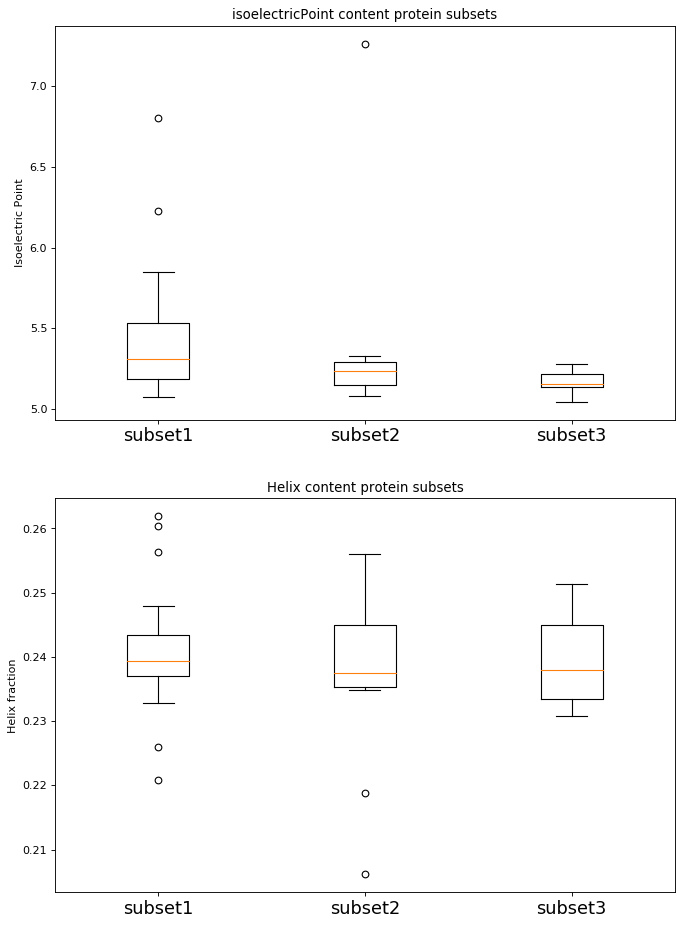

In [10]:
import scipy.stats as stats
import numpy
import matplotlib.pyplot as plt

# 
# Make a large plot to put subplots into
# 

fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')



# These subsets of protein ID lists you have to generete yourself based on clustering, via SPSS or via a label such as organism
proteinID_subset1 = ['H0X429','Q61081','I3MQN7','A0A2K6T3R7','G3U9M4','Q5EAC6','L5L465','A0A5F7ZMB1','A0A3Q7R113','A0A2U3Z8D5','Q16543','A0A2K5UTH8','A0A2K6PMM1','A0A2I3SMF7','G1QVX5','A0A4X1V8J7','G1RNK0','K7EKQ2']
proteinID_subset2 = ['F7DES9','F6UJW3','A0A402FYL4','A0A0B8RUH5','G1KI32','A0A4D9DHP3','K7G5X4','A0A1U7RP49','A0A091FHY8','A0A1V4KY85','A0A218U7F7','O57476','A0A3Q2UCH4']
proteinID_subset3 = ['V9KU08','Q28CE8','H3AJQ8','W5ML97','H2LLR4','I3IZC1','A0A1A7ZPF8','A0A3Q3B1B3','A0A3B3T5I2','A0A4W4GA37','A0A3M0JGH0']



# Here we get the value per protein (uniprot) ID in each subset, so the values in
# helix_subset1 correspond to the helix fractions in the proteinID_subset1 list,
# the helix_subset2 values to the ones in proteinID_subset2
isoelectricPoint_subset1 = [proteinData.loc[proteinID]['isoelectricPoint'] for proteinID in proteinID_subset1]
isoelectricPoint_subset2 = [proteinData.loc[proteinID]['isoelectricPoint'] for proteinID in proteinID_subset2]
isoelectricPoint_subset3 = [proteinData.loc[proteinID]['isoelectricPoint'] for proteinID in proteinID_subset3]

# We now make a list of these separate lists in order to plot it in matplotlib
distributionData = [isoelectricPoint_subset1,isoelectricPoint_subset2,isoelectricPoint_subset3]

axes = fig.add_subplot(413)
# This adds a boxplot
axes.boxplot(distributionData)
axes.set_title("isoelectricPoint content protein subsets")
axes.set_ylabel("Isoelectric Point")
# Here we label the boxplots on the x-axis
axes.set_xticklabels(['subset1','subset2','subset3'],fontsize=16)

#
# We can also compare their distributions with many tests, here using a Mann-Whitney non-parametric test
#

print(stats.mannwhitneyu(isoelectricPoint_subset1,isoelectricPoint_subset2))
print(stats.mannwhitneyu(isoelectricPoint_subset1,isoelectricPoint_subset3))
print(stats.mannwhitneyu(isoelectricPoint_subset2,isoelectricPoint_subset3))
#print(stats.ttest_ind(helix_subset1,helix_subset2))







# These subsets of protein ID lists you have to generete yourself based on clustering, via SPSS or via a label such as organism
proteinID_subset1 = ['H0X429','Q61081','I3MQN7','A0A2K6T3R7','G3U9M4','Q5EAC6','L5L465','A0A5F7ZMB1','A0A3Q7R113','A0A2U3Z8D5','Q16543','A0A2K5UTH8','A0A2K6PMM1','A0A2I3SMF7','G1QVX5','A0A4X1V8J7','G1RNK0','K7EKQ2']
proteinID_subset2 = ['F7DES9','F6UJW3','A0A402FYL4','A0A0B8RUH5','G1KI32','A0A4D9DHP3','K7G5X4','A0A1U7RP49','A0A091FHY8','A0A1V4KY85','A0A218U7F7','O57476','A0A3Q2UCH4']
proteinID_subset3 = ['V9KU08','Q28CE8','H3AJQ8','W5ML97','H2LLR4','I3IZC1','A0A1A7ZPF8','A0A3Q3B1B3','A0A3B3T5I2','A0A4W4GA37','A0A3M0JGH0']


#UPI00042BF012, UPI0006D0BF67, ,'UPI0004F0A91E','UPI0009E5B7FA''UPI0001185050B','UPI00109F6845''UPI0011F3A40C 'H2NXJ2''A0A087VKL6'
# Here we get the value per protein (uniprot) ID in each subset, so the values in
# helix_subset1 correspond to the helix fractions in the proteinID_subset1 list,
# the helix_subset2 values to the ones in proteinID_subset2
helix_subset1 = [proteinData.loc[proteinID]['helixFraction'] for proteinID in proteinID_subset1]
helix_subset2 = [proteinData.loc[proteinID]['helixFraction'] for proteinID in proteinID_subset2]
helix_subset3 = [proteinData.loc[proteinID]['helixFraction'] for proteinID in proteinID_subset3]

# We now make a list of these separate lists in order to plot it in matplotlib
distributionData = [helix_subset1,helix_subset2,helix_subset3]

axes = fig.add_subplot(414)
# This adds a boxplot
axes.boxplot(distributionData)
axes.set_title("Helix content protein subsets")
axes.set_ylabel("Helix fraction")
# Here we label the boxplots on the x-axis
axes.set_xticklabels(['subset1','subset2','subset3'],fontsize=16)

#
# We can also compare their distributions with many tests, here using a Mann-Whitney non-parametric test
#

print(stats.mannwhitneyu(helix_subset1,helix_subset2))
print(stats.mannwhitneyu(helix_subset1,helix_subset3))
print(stats.mannwhitneyu(helix_subset2,helix_subset3))
#print(stats.ttest_ind(helix_subset1,helix_subset2))

2.2 Protein dynamics
Here we modified the script to display the protein ID next to the name of each plots 

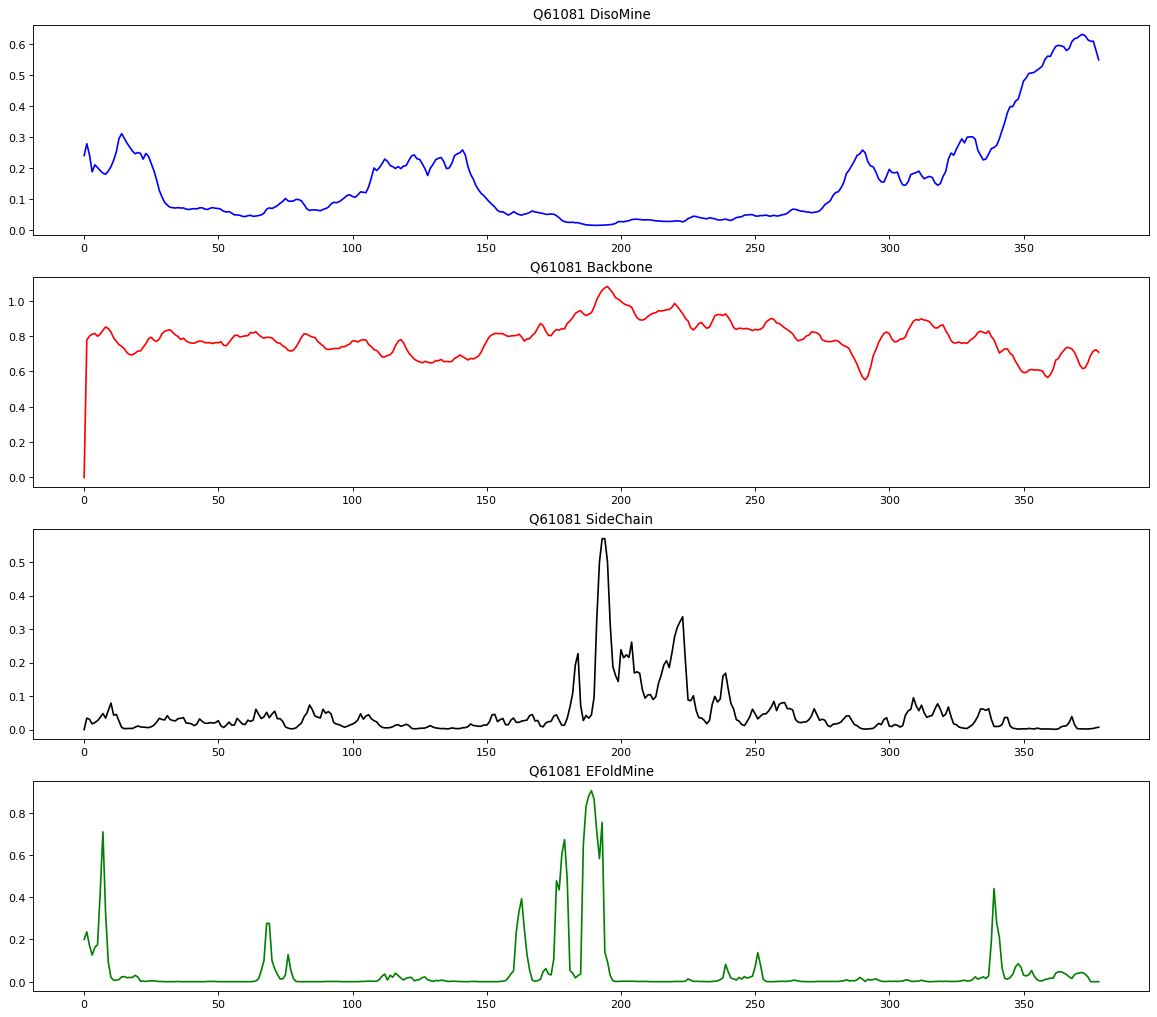

In [11]:
import matplotlib.pyplot as plt
import json

# Read input Json file
file = open(predJsonFile, 'r')
input = file.read()
request_json = json.loads(input)

# Note that here we are showing the results for the first protein - index 0 in the results list
currentProteinIndex = 2

# residue index
seq = request_json["results"][currentProteinIndex]['sequence']
#DisoMine Score
disomine = request_json["results"][currentProteinIndex]['disomine']
#backbone Score
backbone = request_json["results"][currentProteinIndex]['backbone']
#sidechain Score
sidechain = request_json["results"][currentProteinIndex]['sidechain']
#efoldmine Score
efoldmine = request_json["results"][currentProteinIndex]['efoldmine']
# creating a plot
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#ploting the DisoMine results
axes = fig.add_subplot(411)
axes.plot(range(len(seq)), disomine, color="b")
axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " DisoMine")

#ploting the Backbone results 
axes = fig.add_subplot(412)
axes.plot(range(len(seq)), backbone, color="r")
axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " Backbone")

#ploting the SideChain results
axes = fig.add_subplot(413)
axes.plot(range(len(seq)), sidechain, color="black")
axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " SideChain")

#ploting the EFoldMine results
axes = fig.add_subplot(414)
axes.plot(range(len(seq)), efoldmine, color="g")
axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " EFoldMine")

plt.show()

#ploting the DisoMine results
#axes = fig.add_subplot(411)
#axes.plot(range(len(seq)), disomine, color="b")
#axes.set_title("DisoMine")

#ploting the Backbone results 
#axes = fig.add_subplot(412)
#axes.plot(range(len(seq)), backbone, color="r")
#axes.set_title("Backbone")

#ploting the SideChain results
#axes = fig.add_subplot(413)
#axes.plot(range(len(seq)), sidechain, color="black")
#axes.set_title("SideChain")

#ploting the EFoldMine results
#axes = fig.add_subplot(414)
#axes.plot(range(len(seq)), efoldmine, color="g")
#axes.set_title("EFoldMine")



Here we modified the script to display the protein ID next to the name of each plots and also to display all the proteins plots in one run 

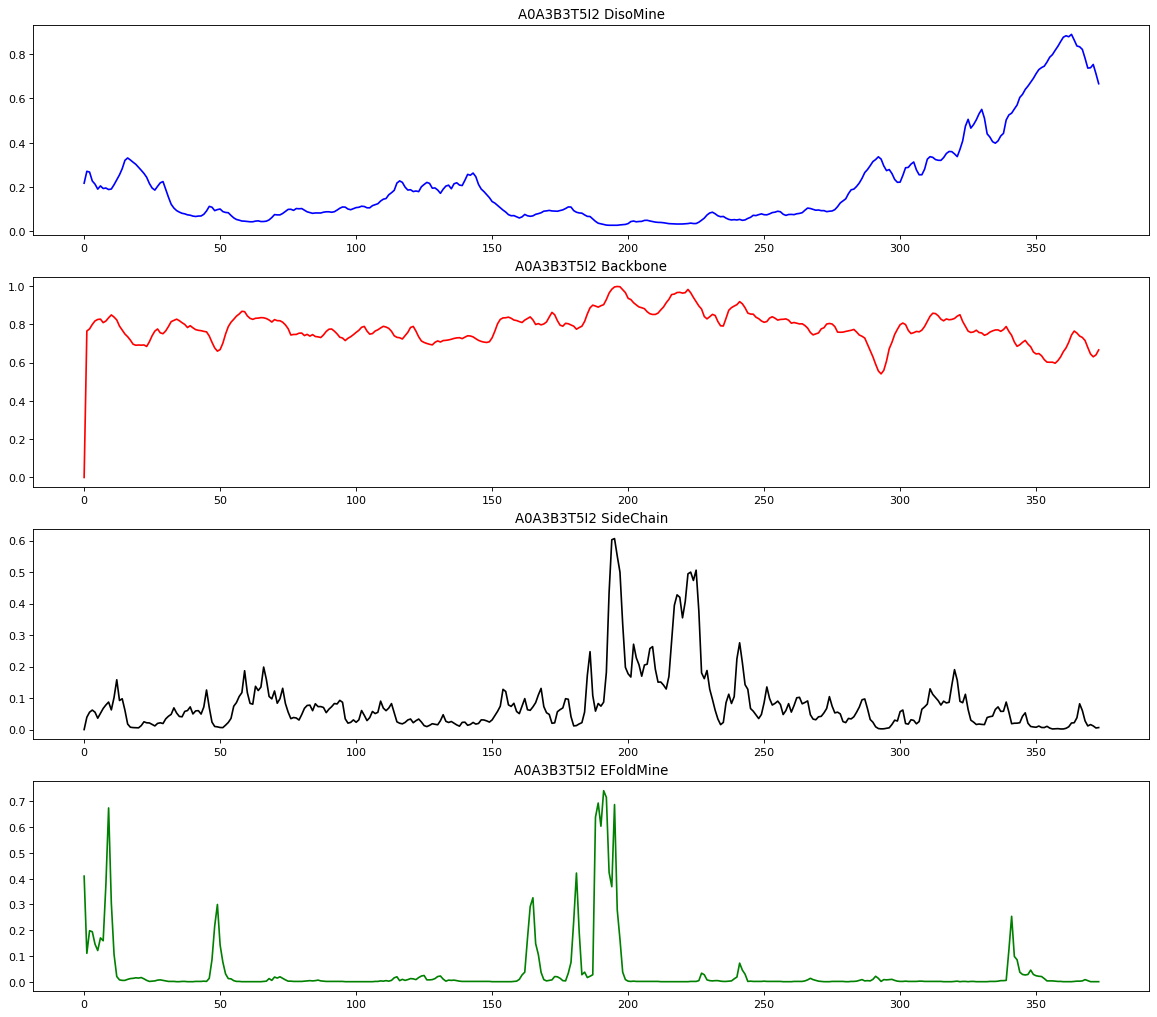

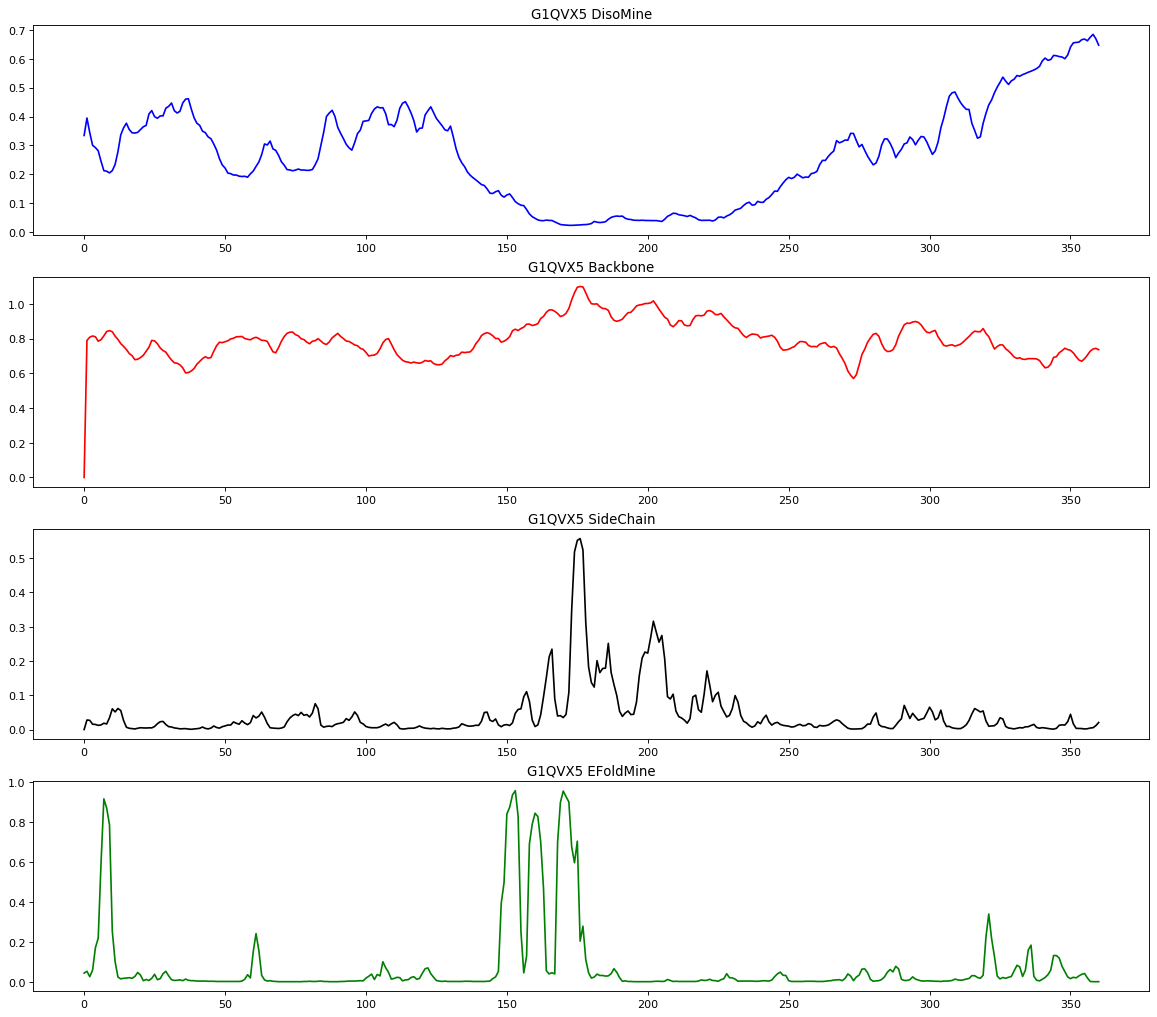

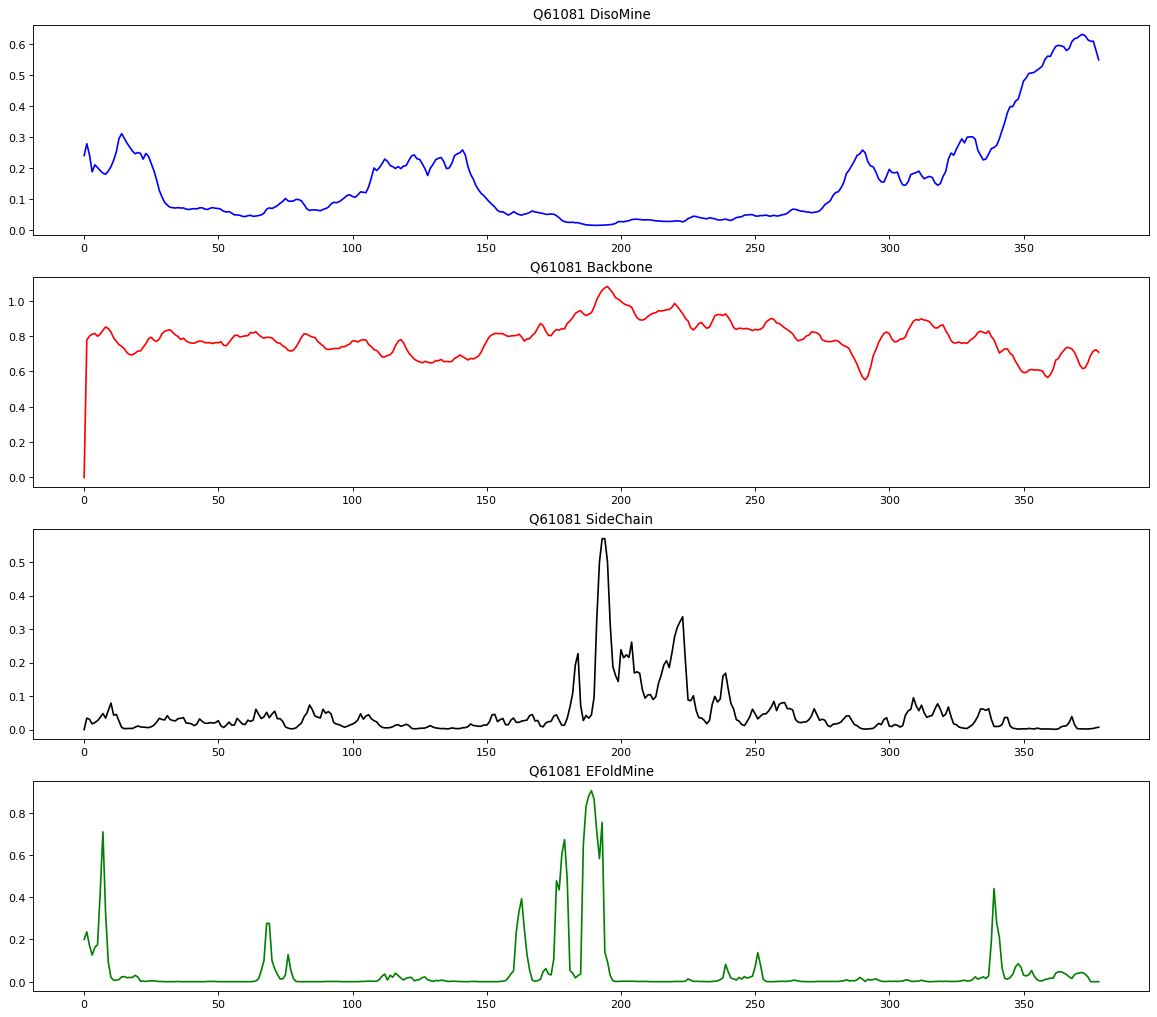

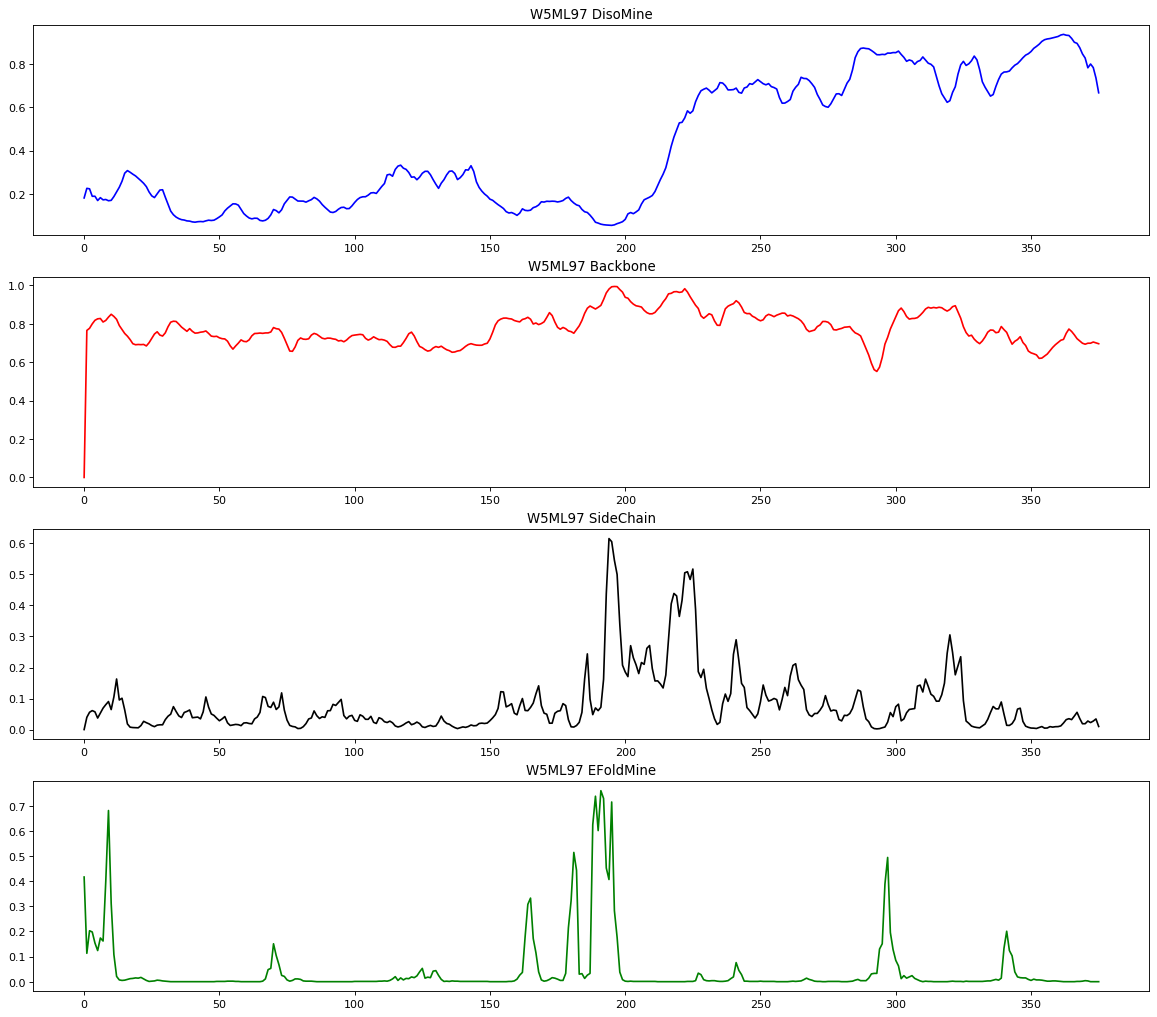

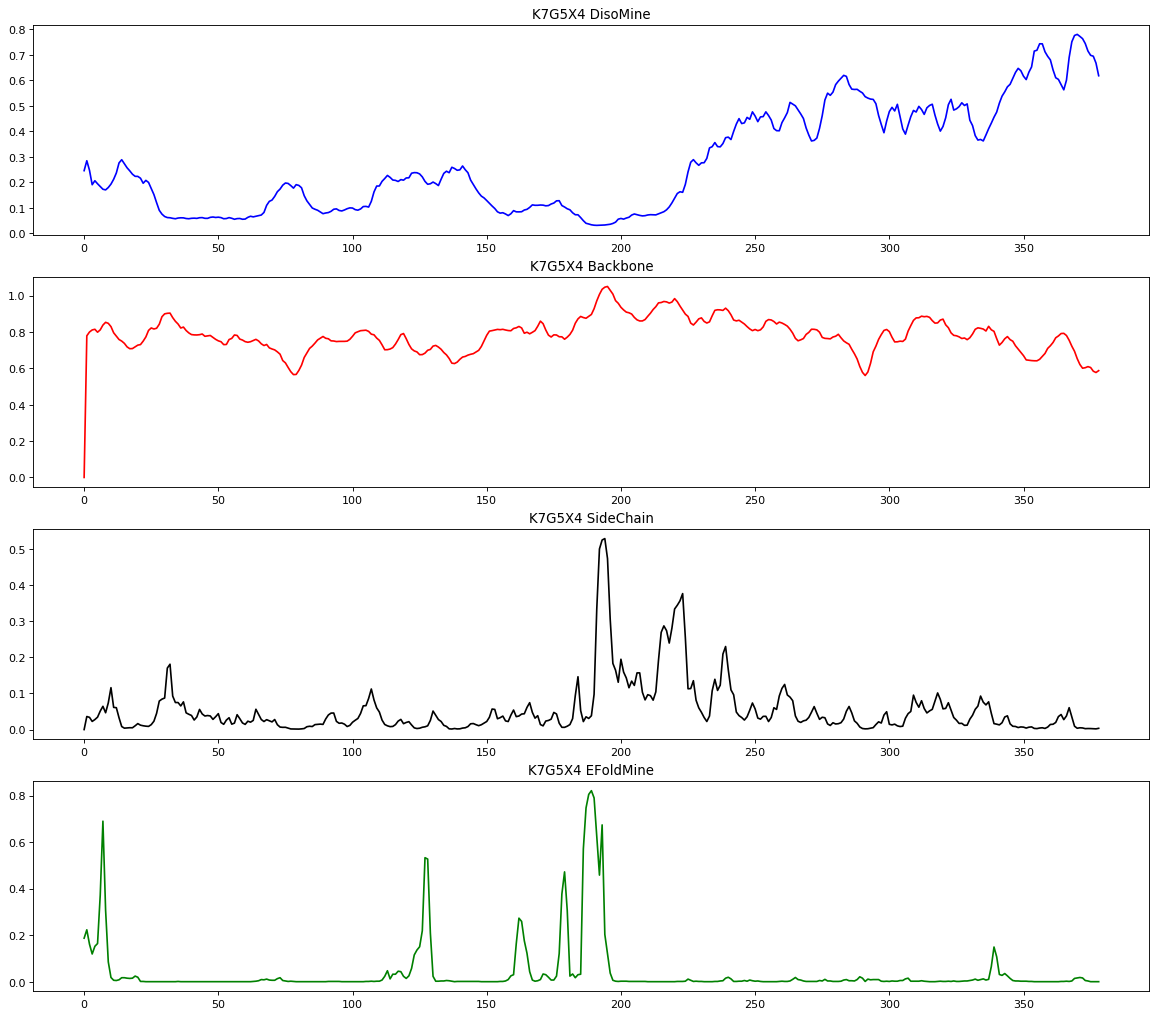

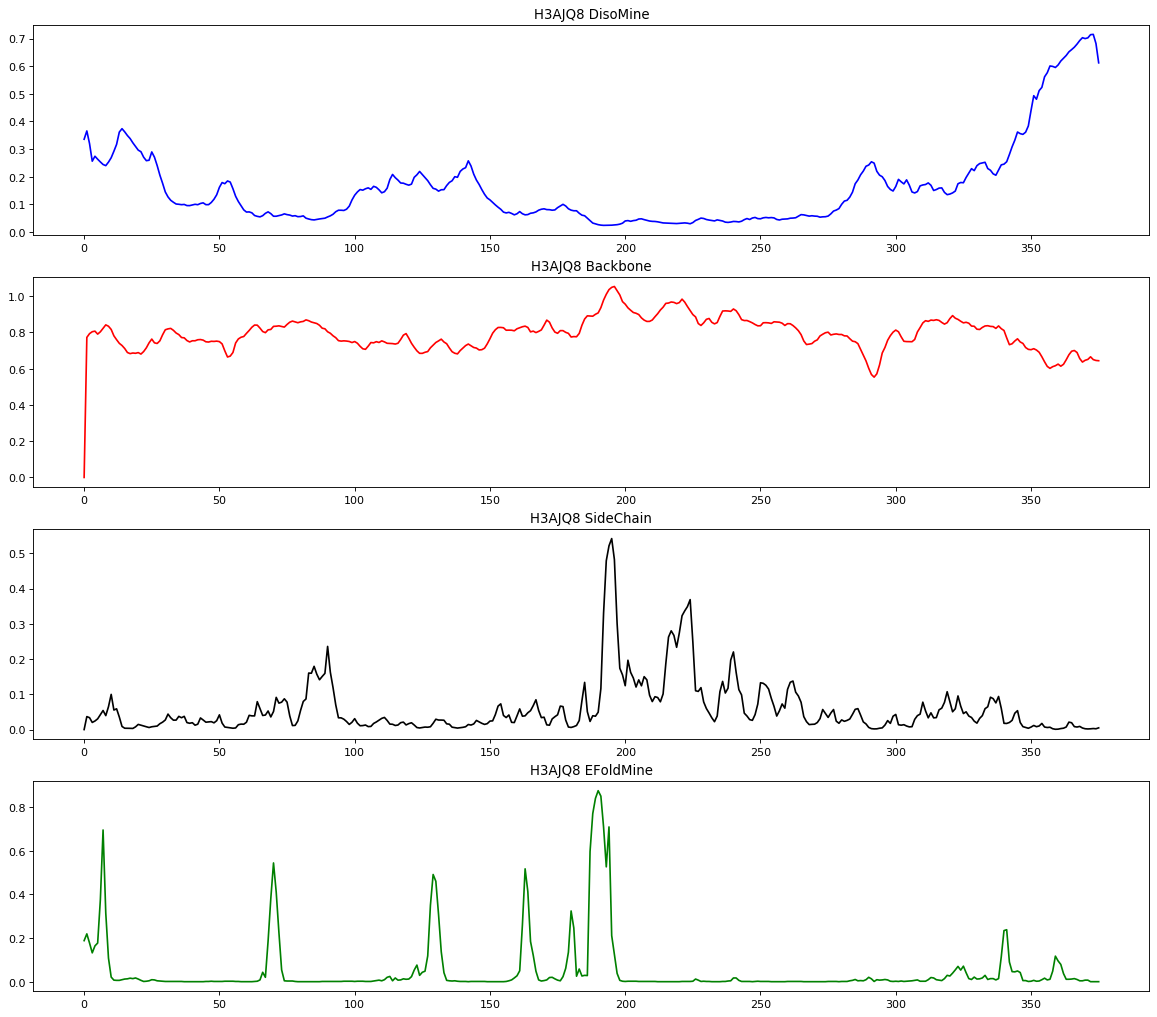

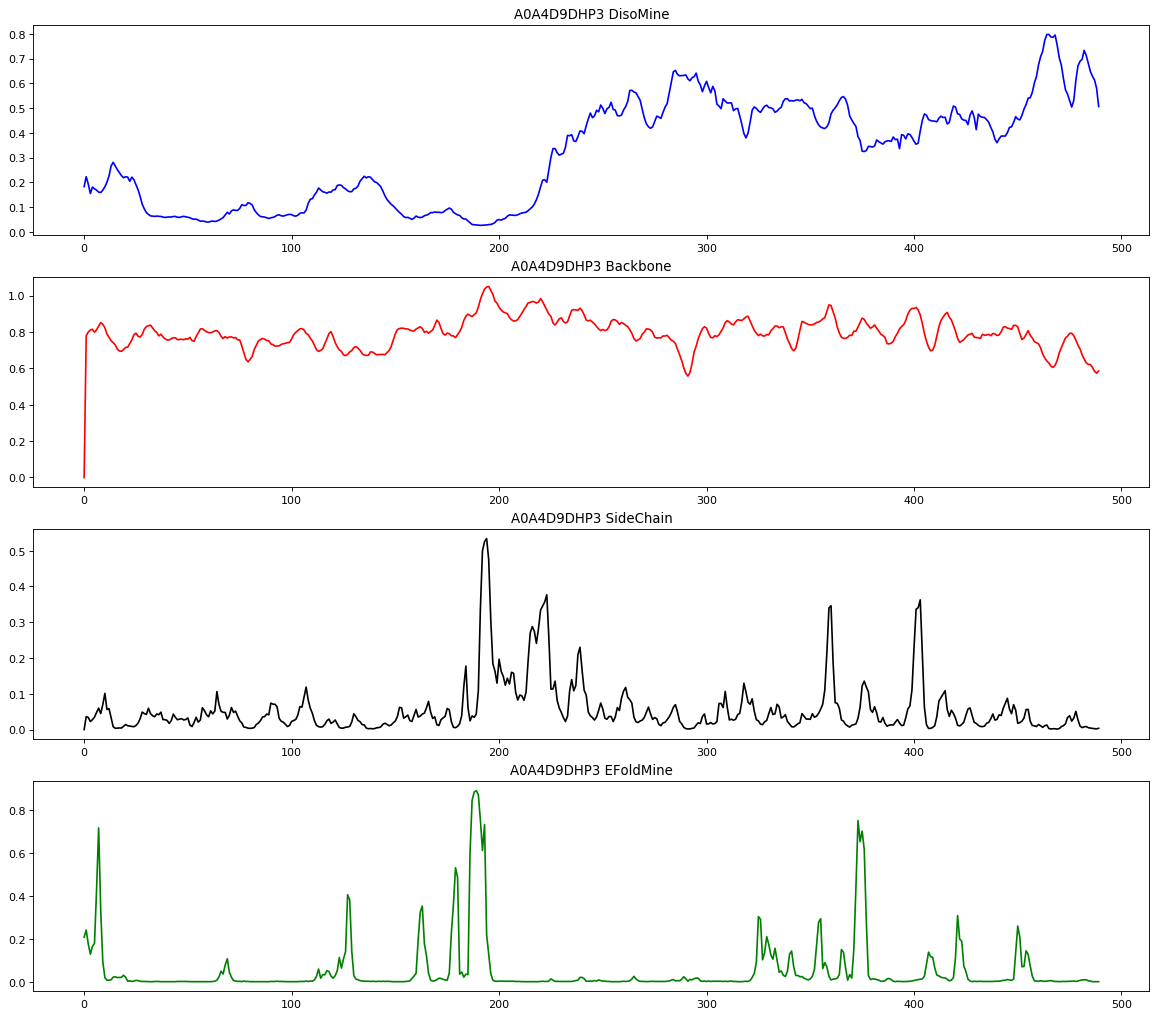

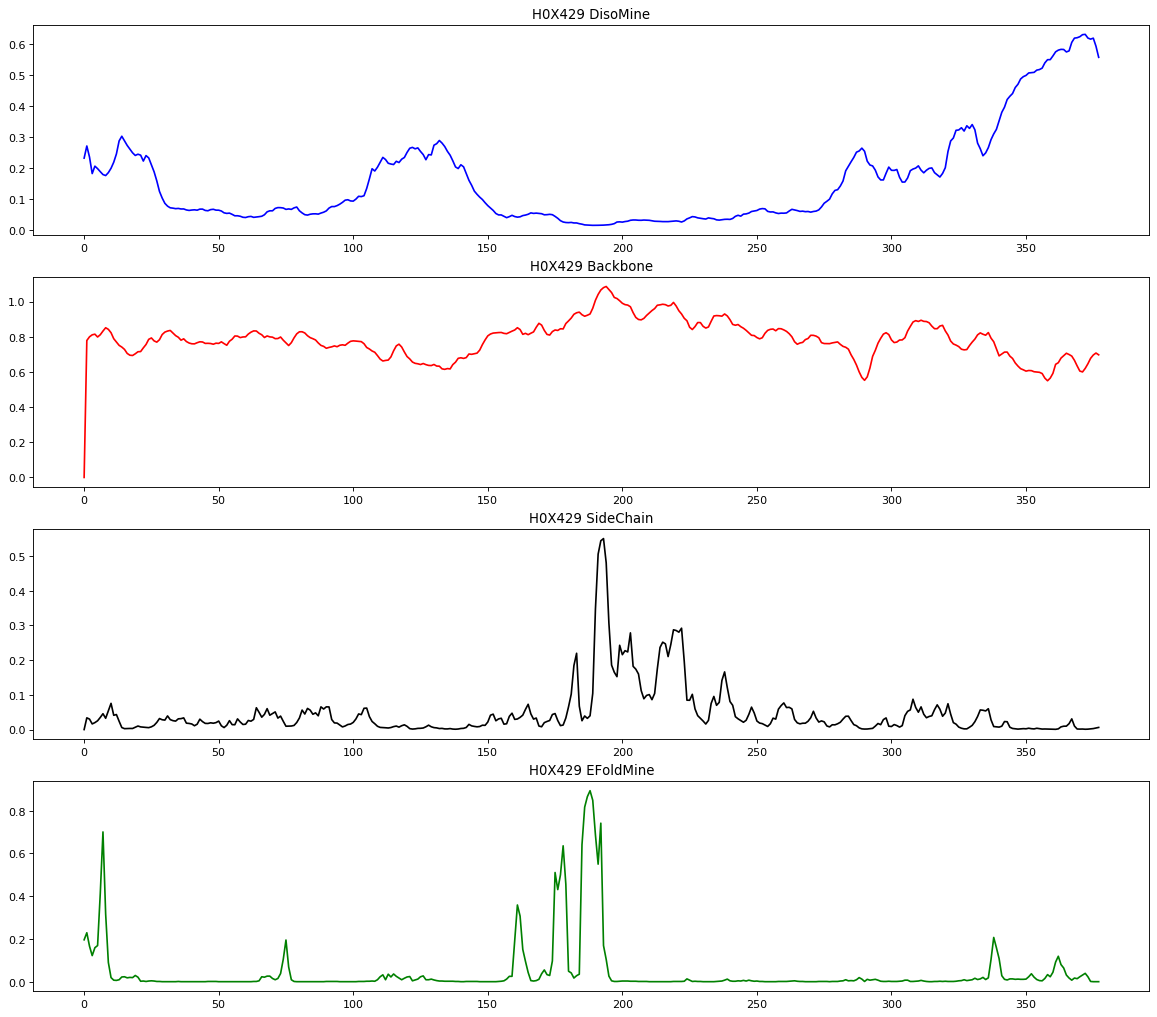

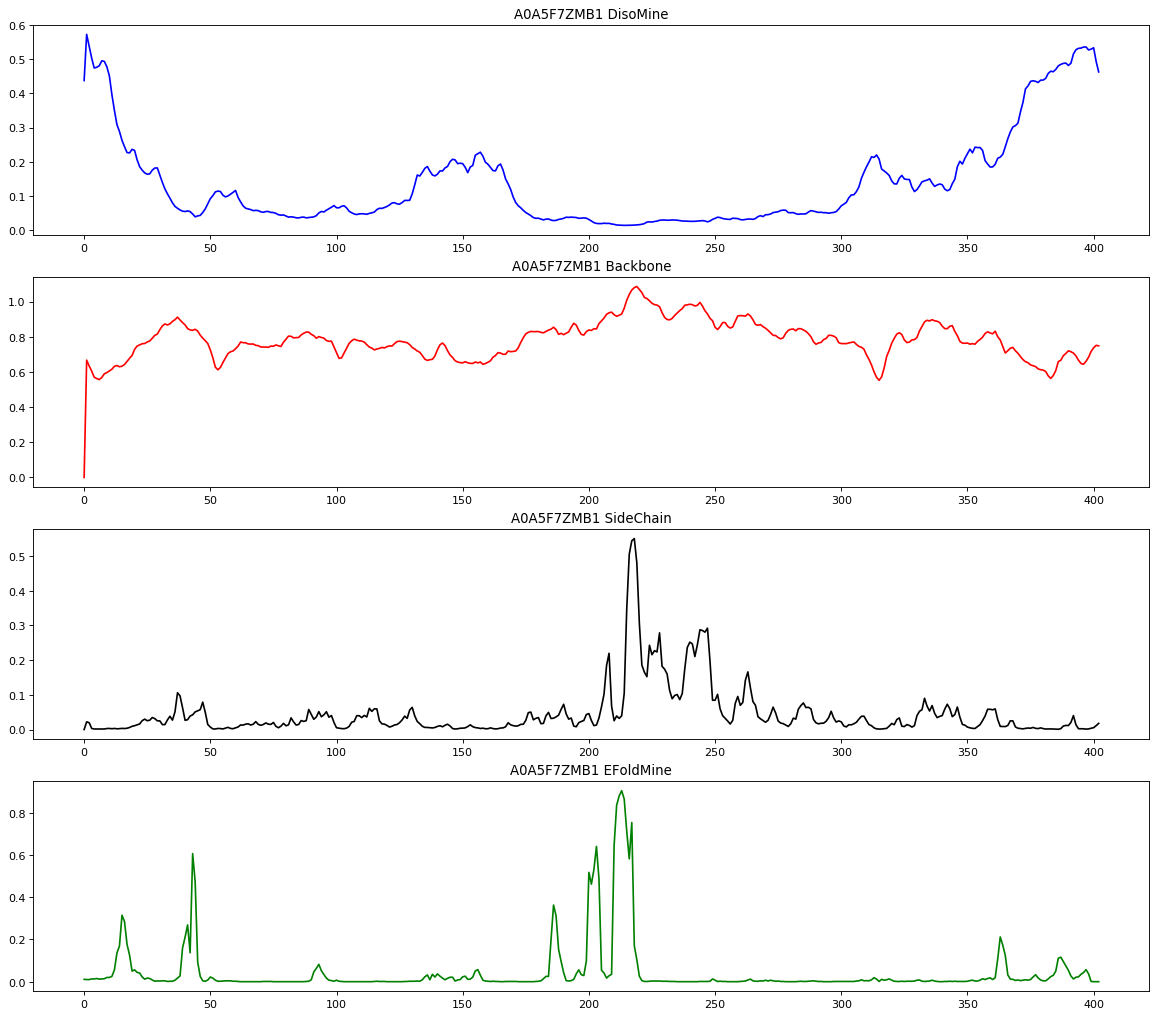

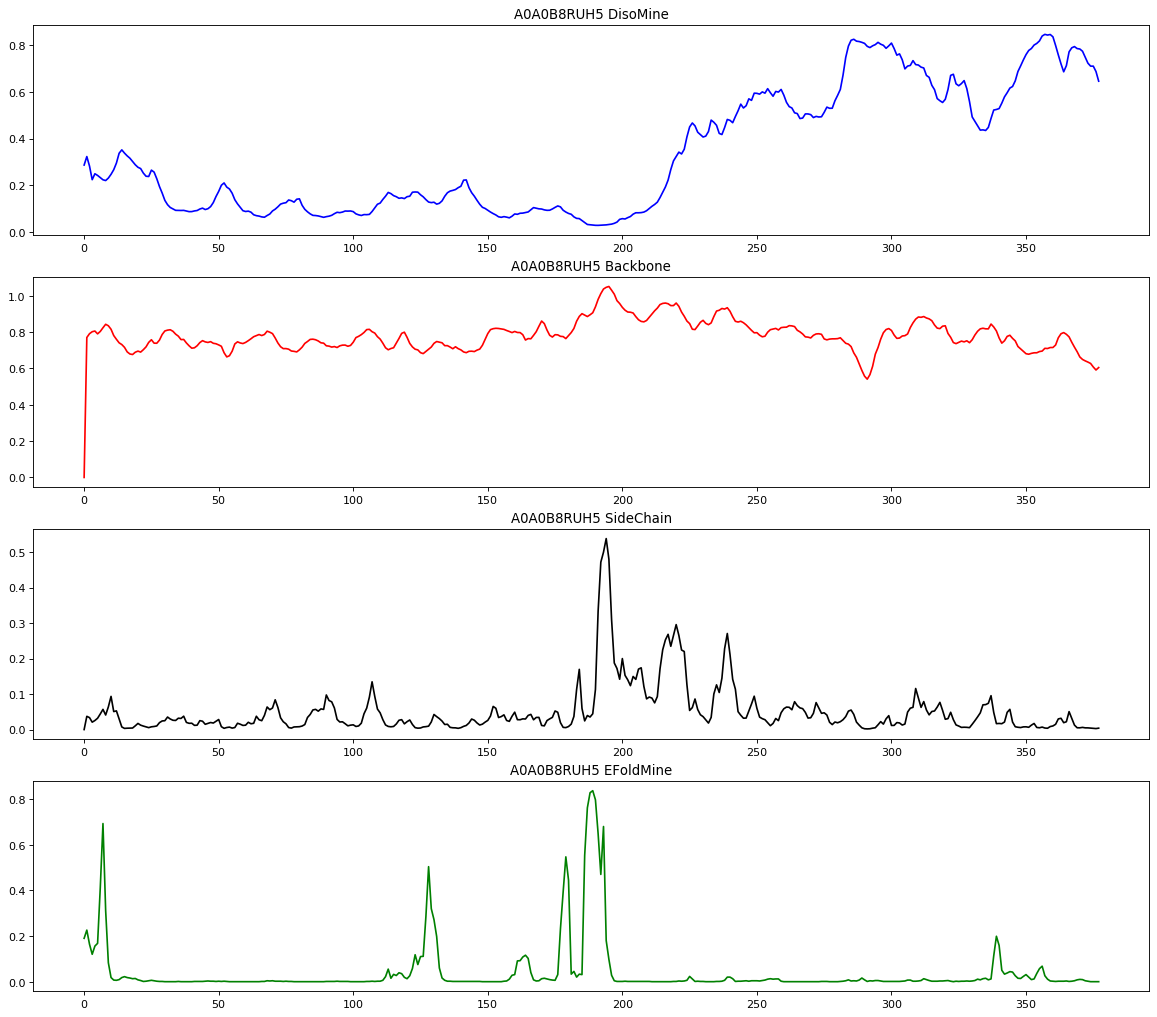

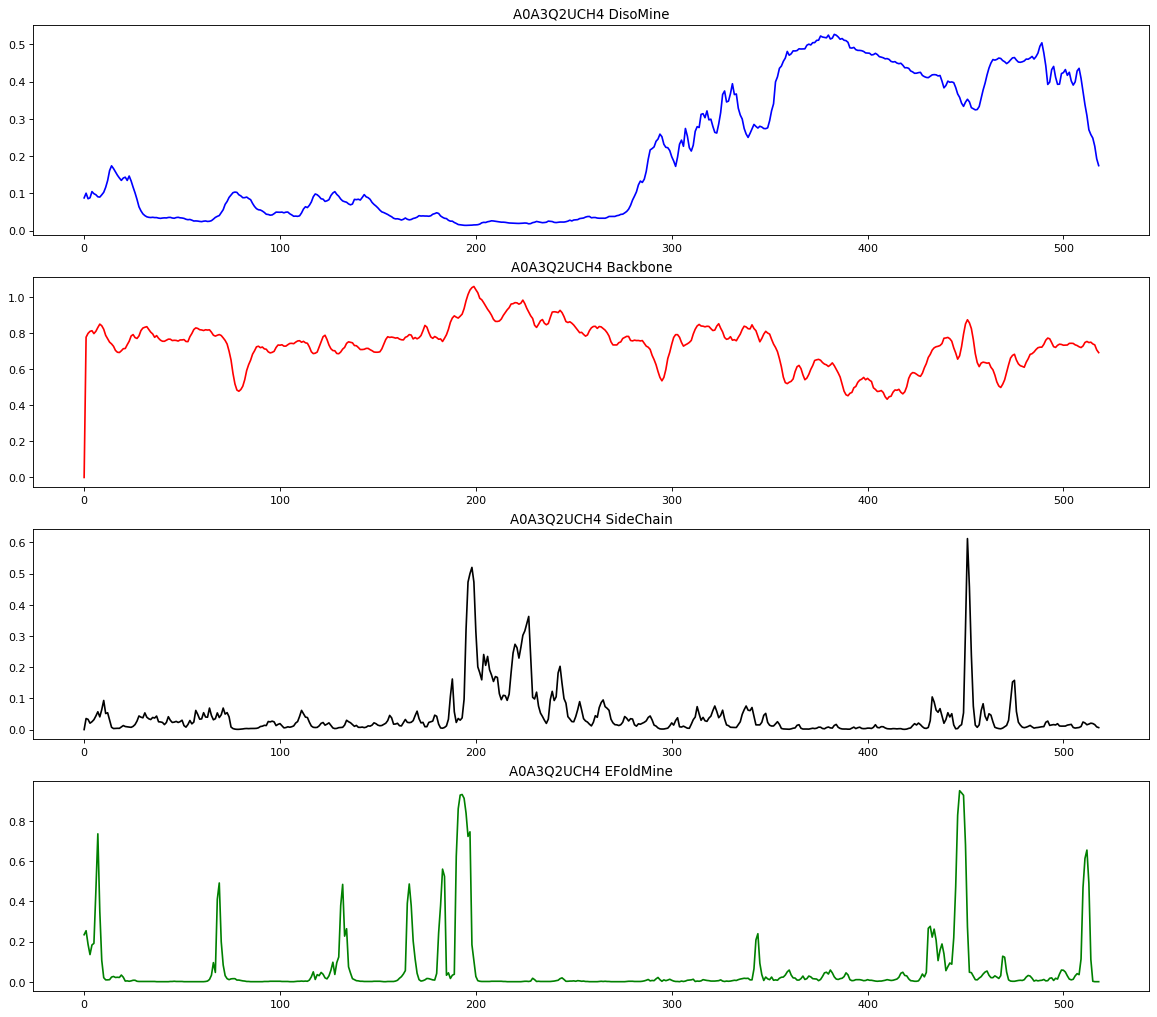

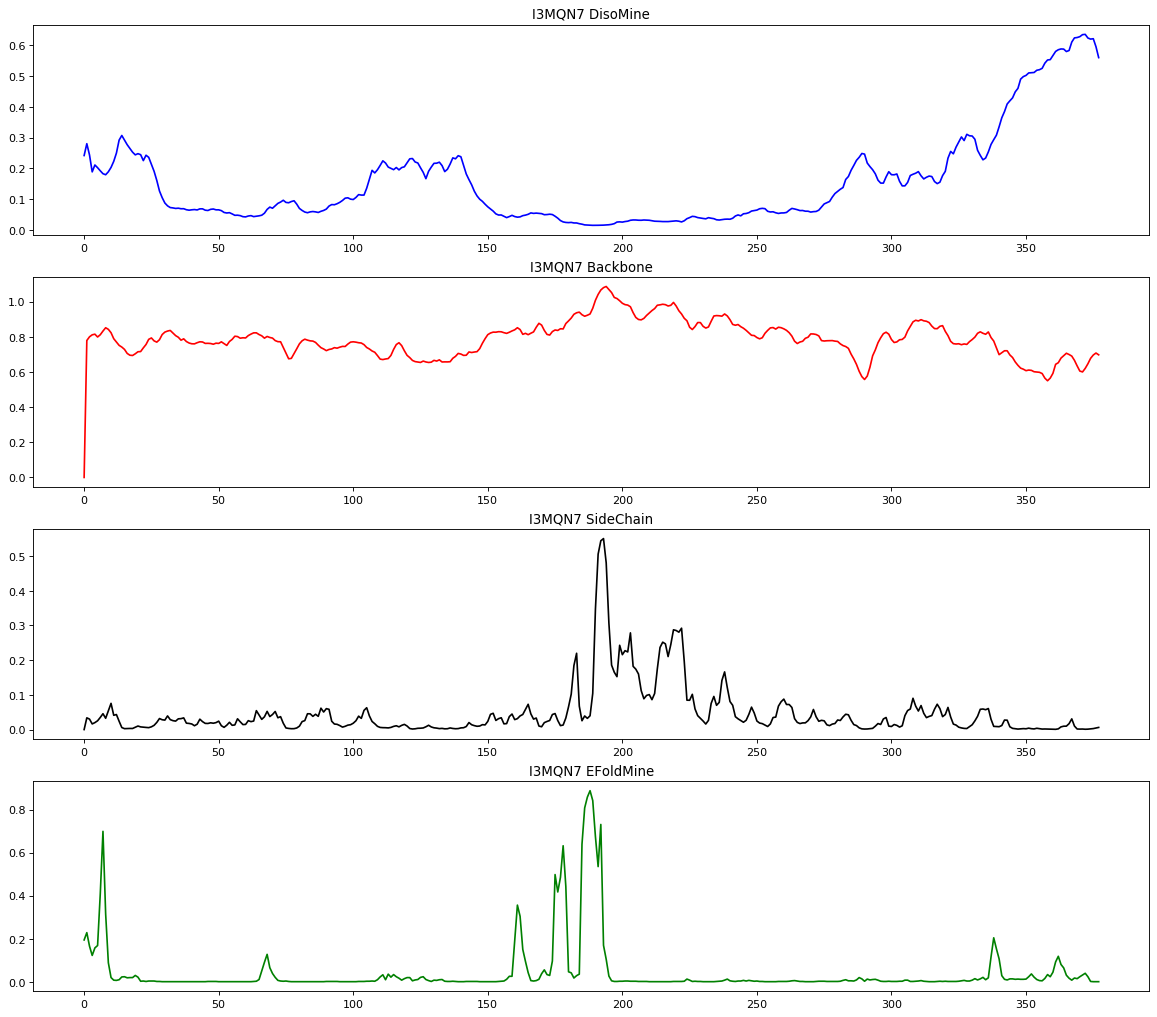

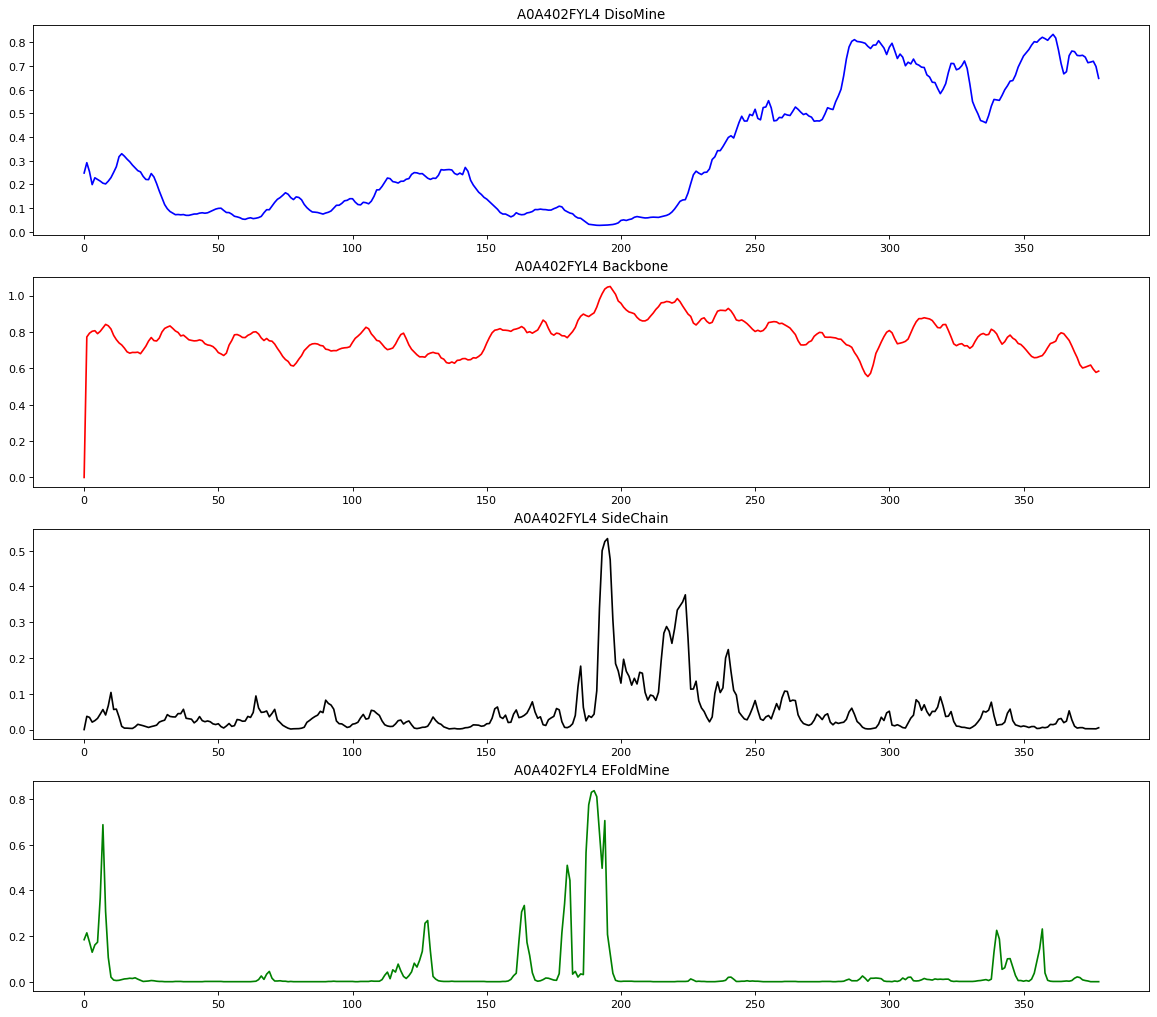

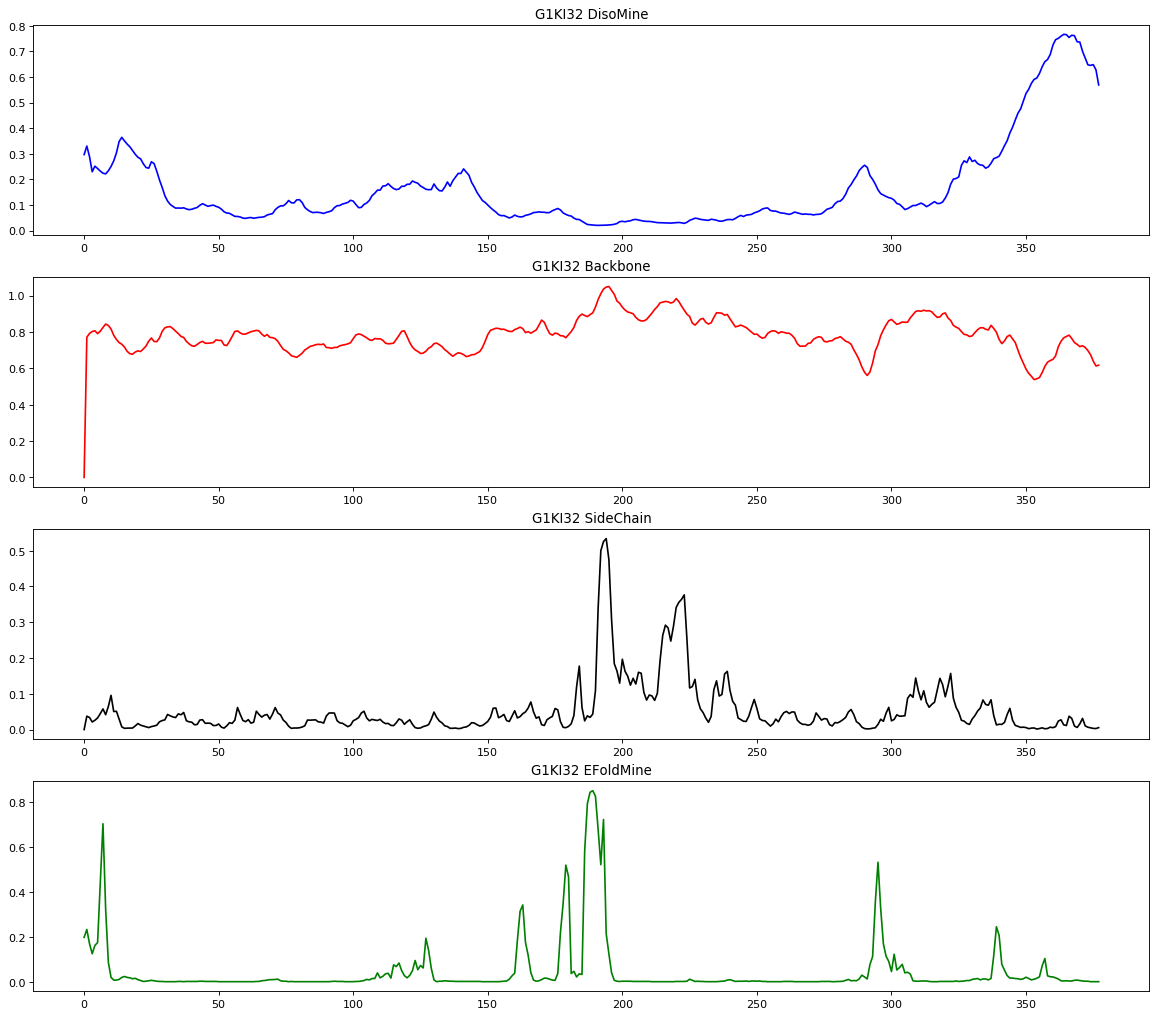

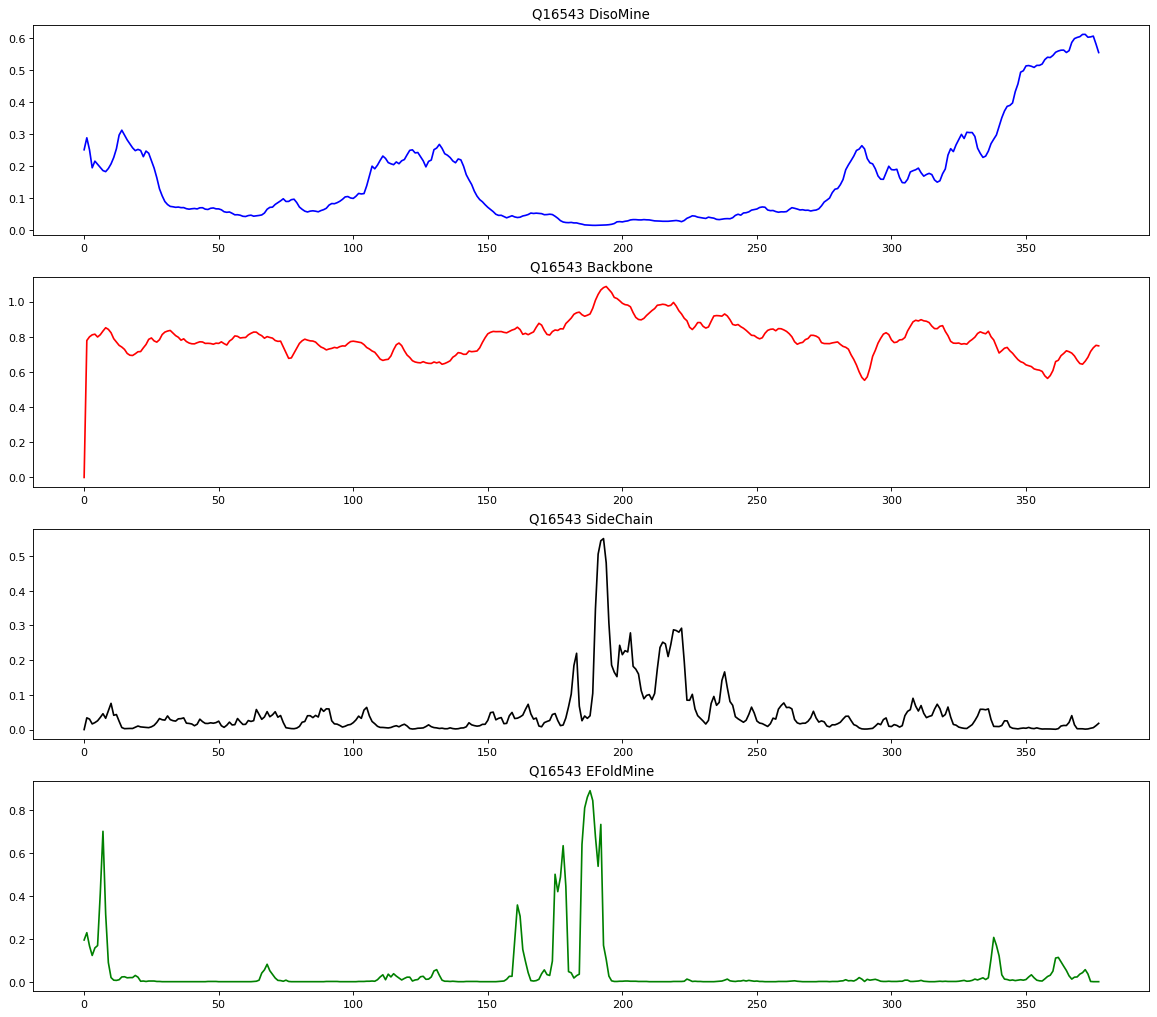

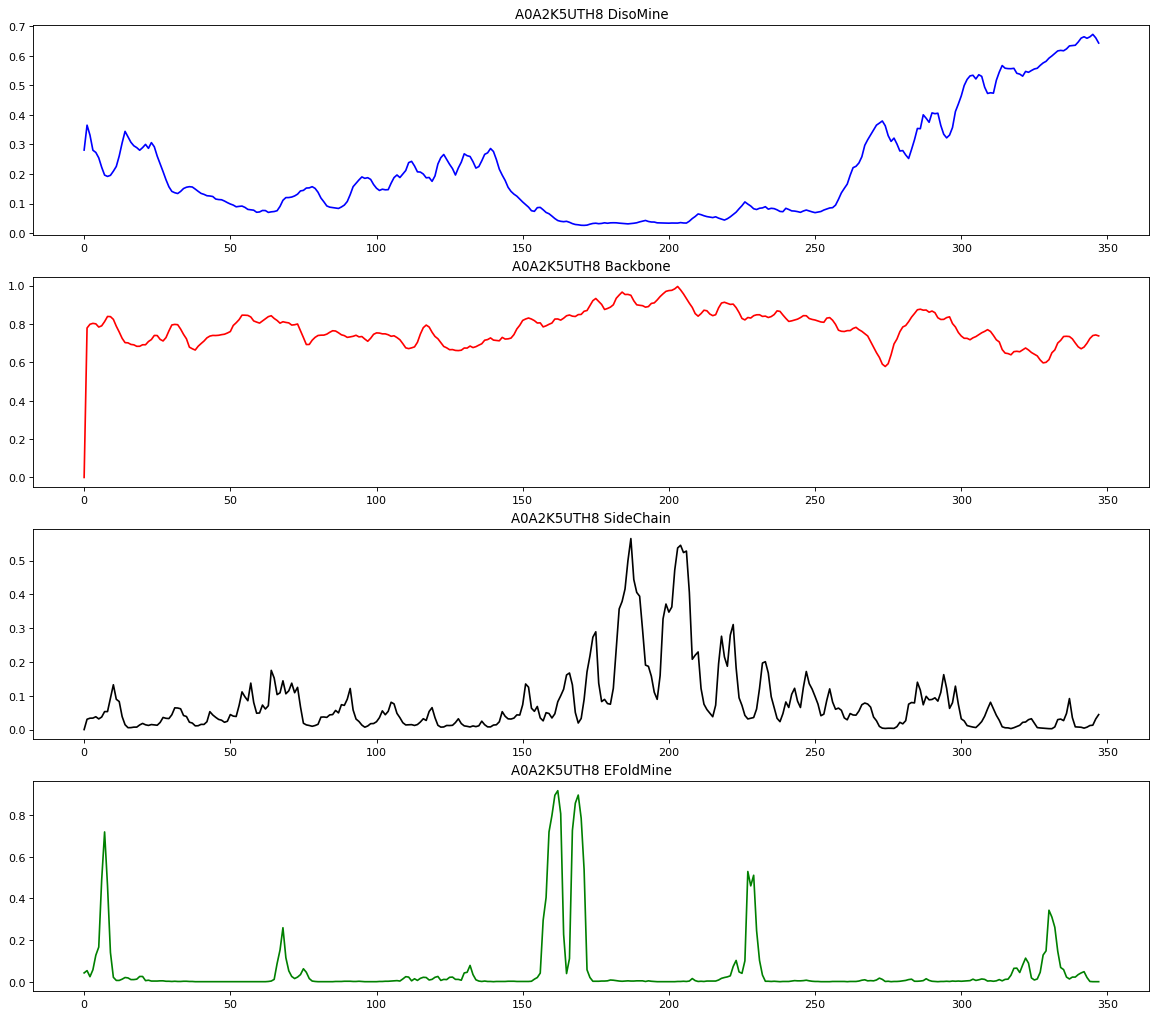

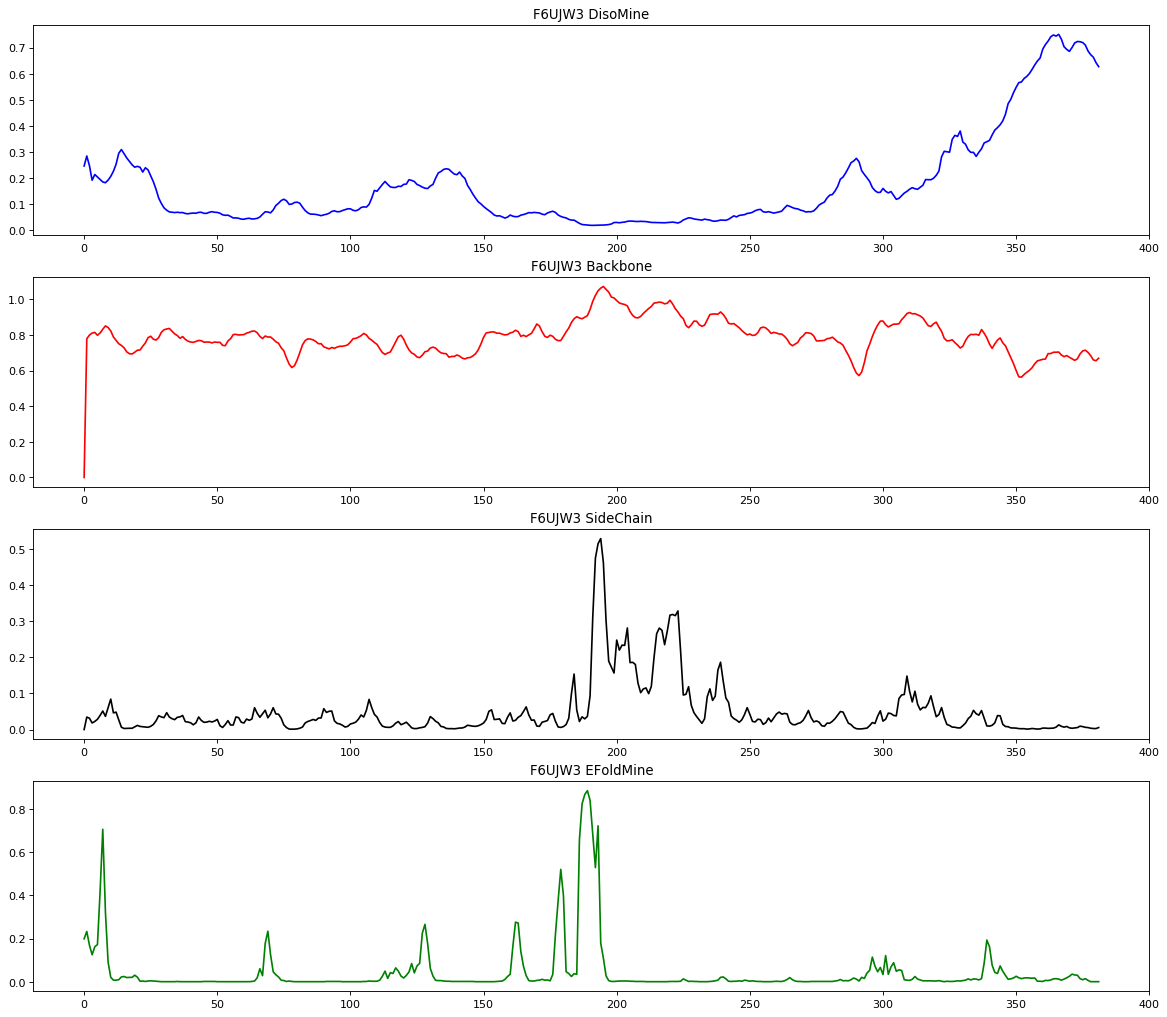

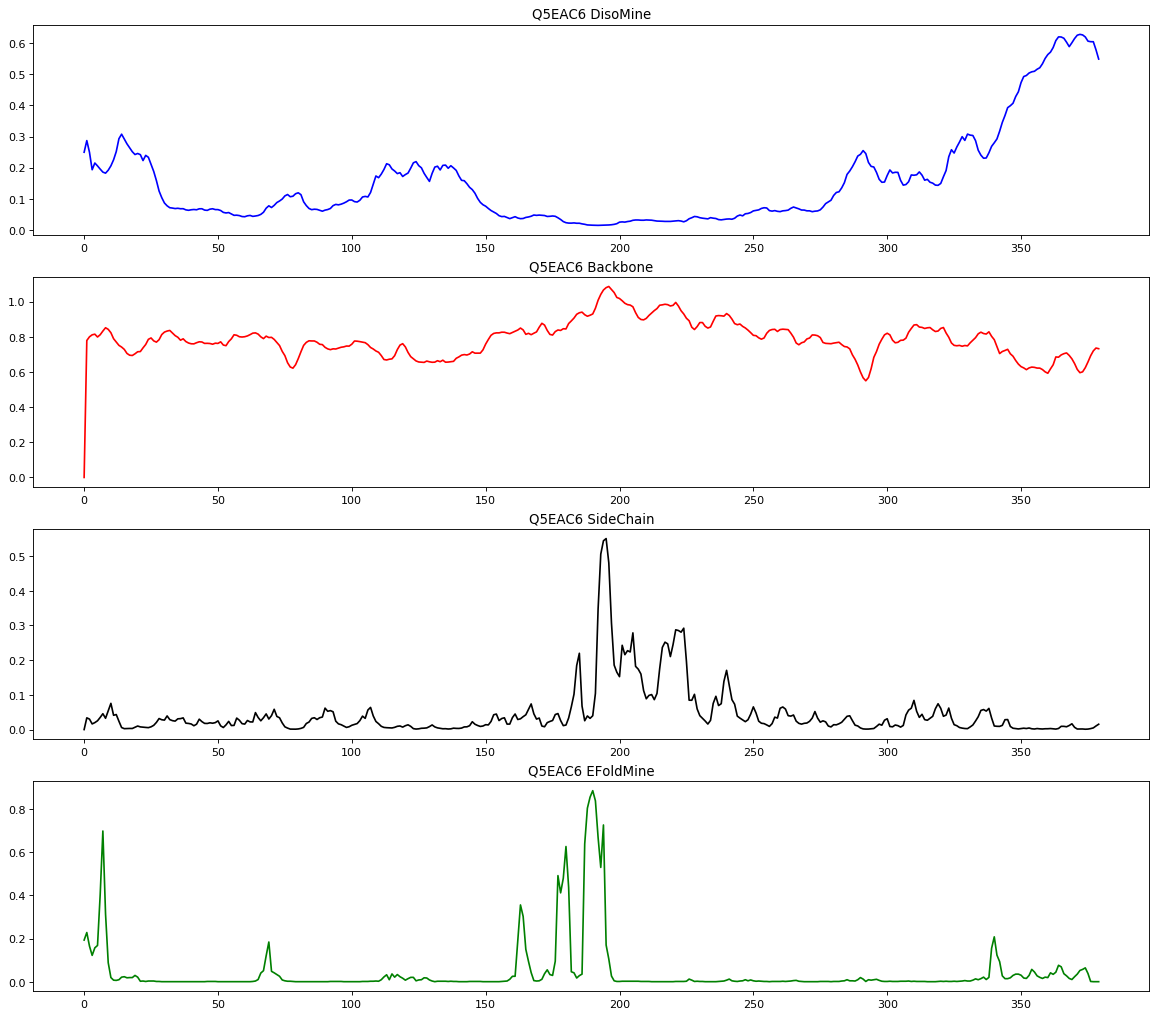

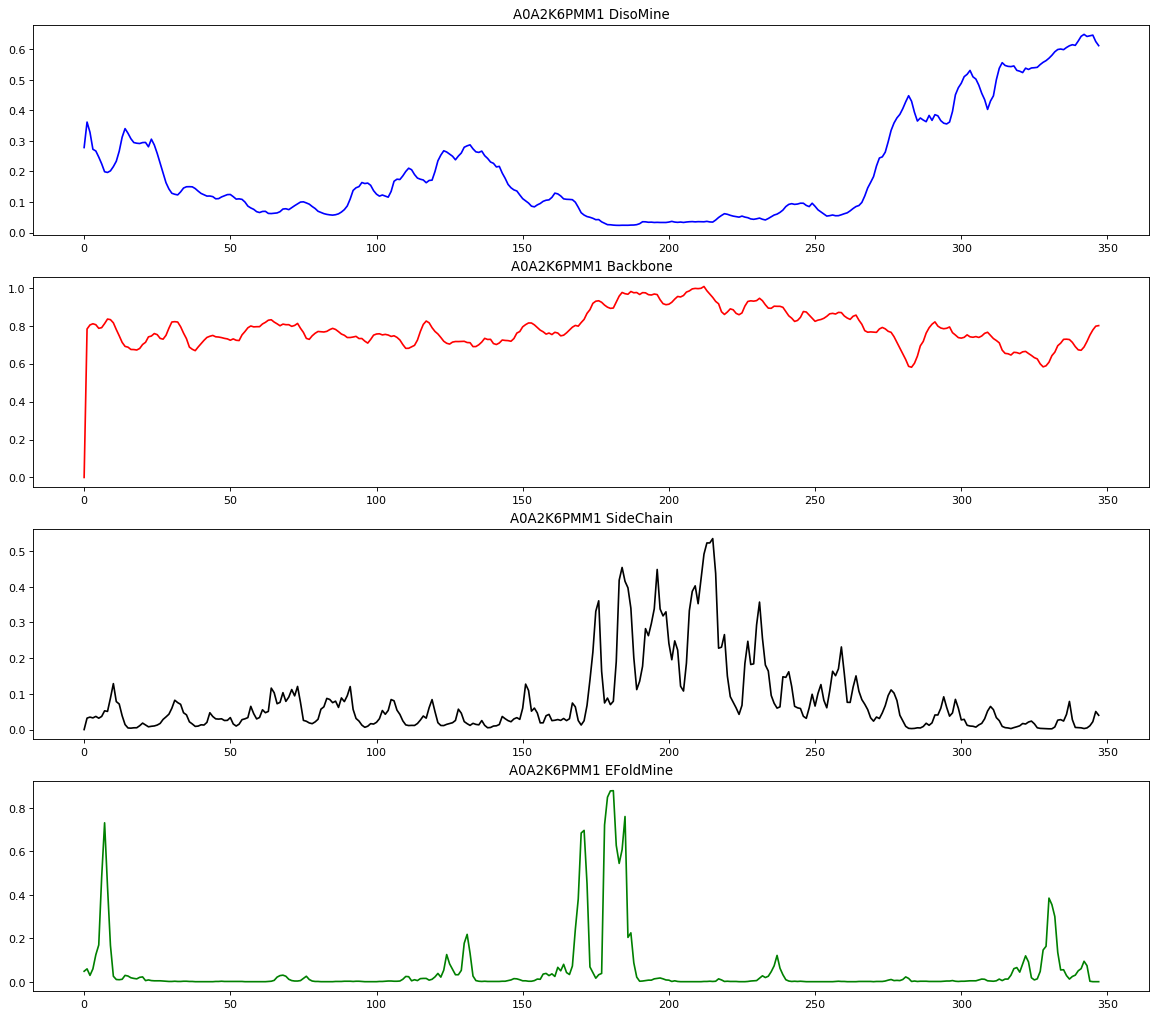

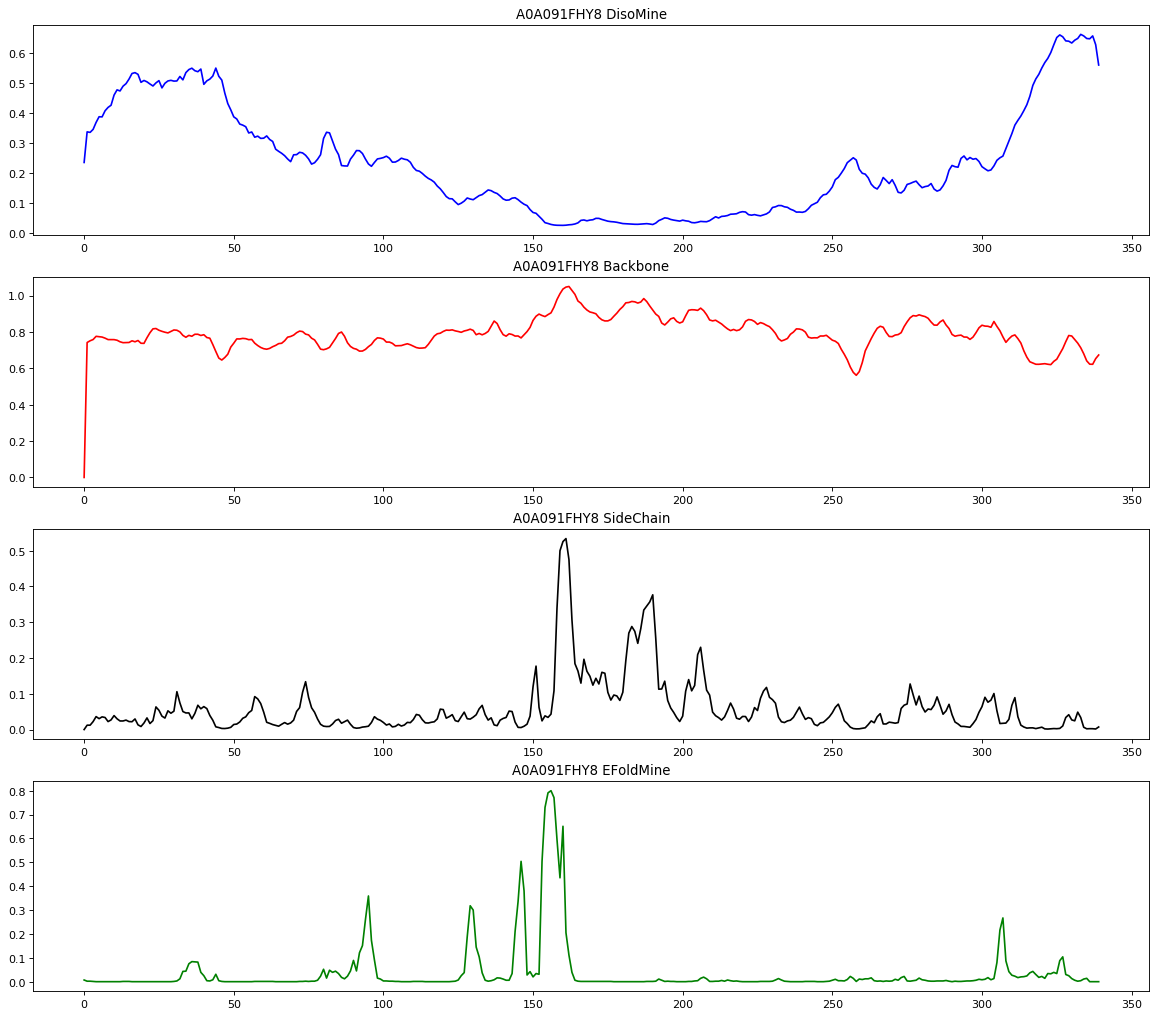

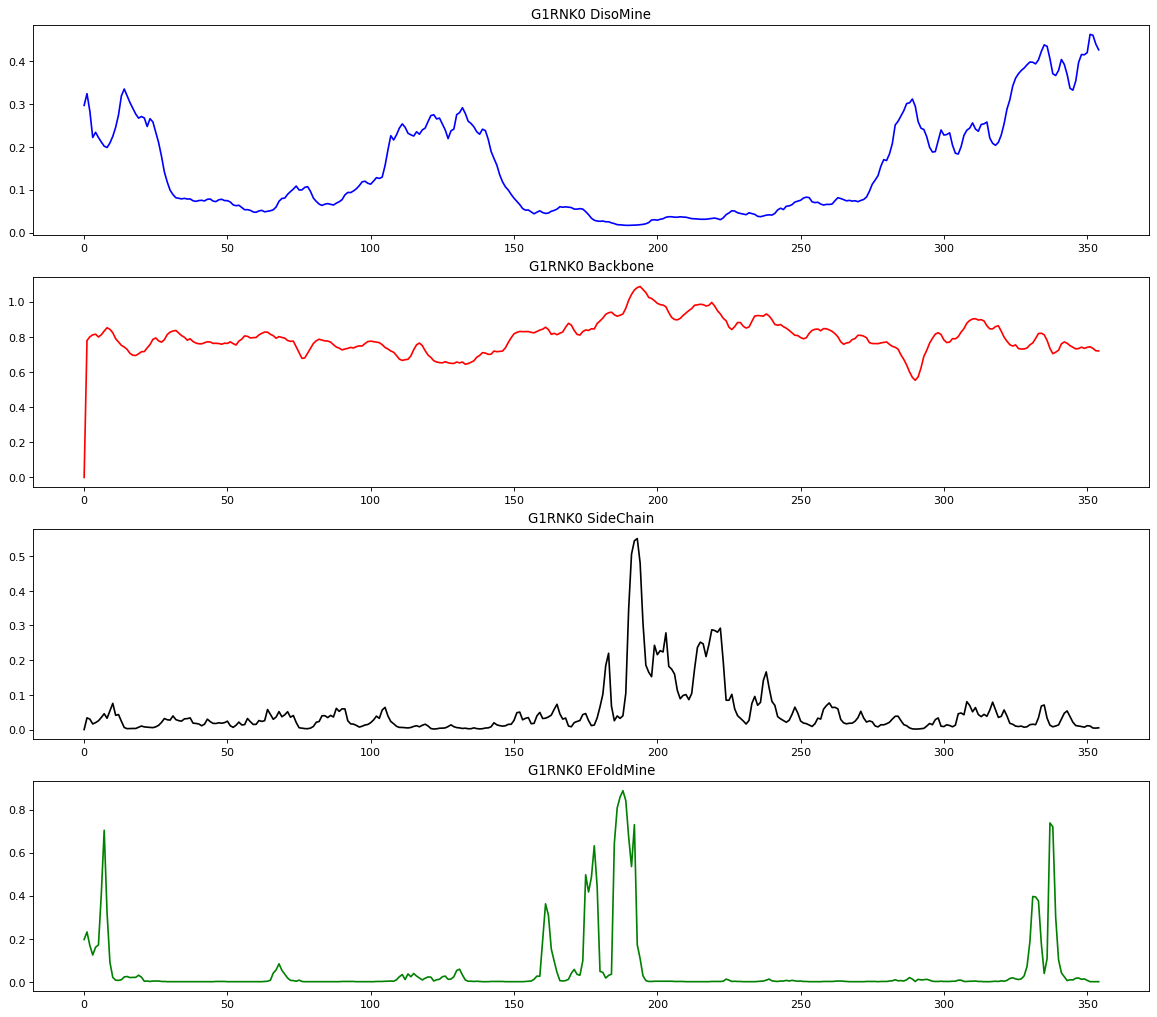

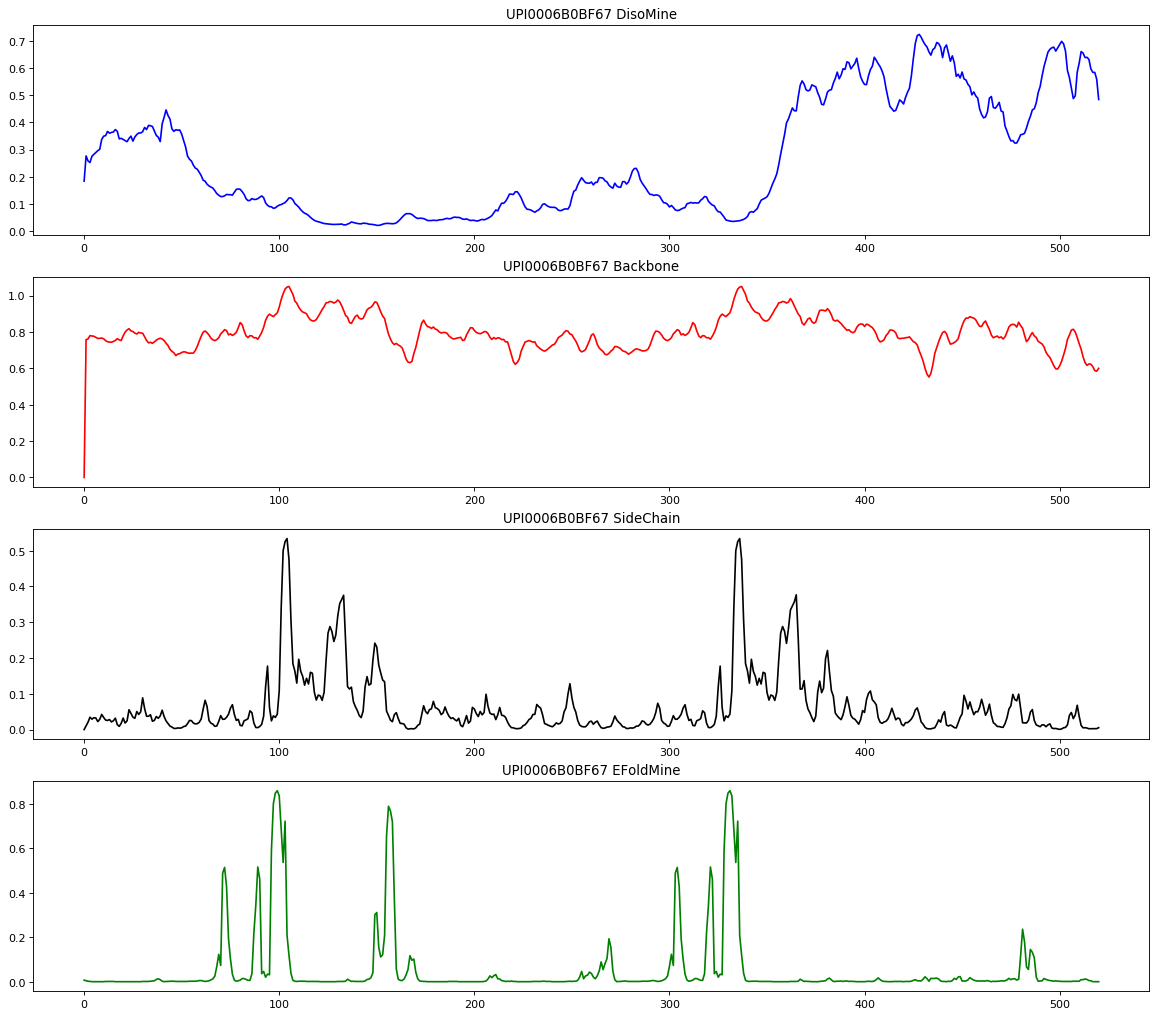

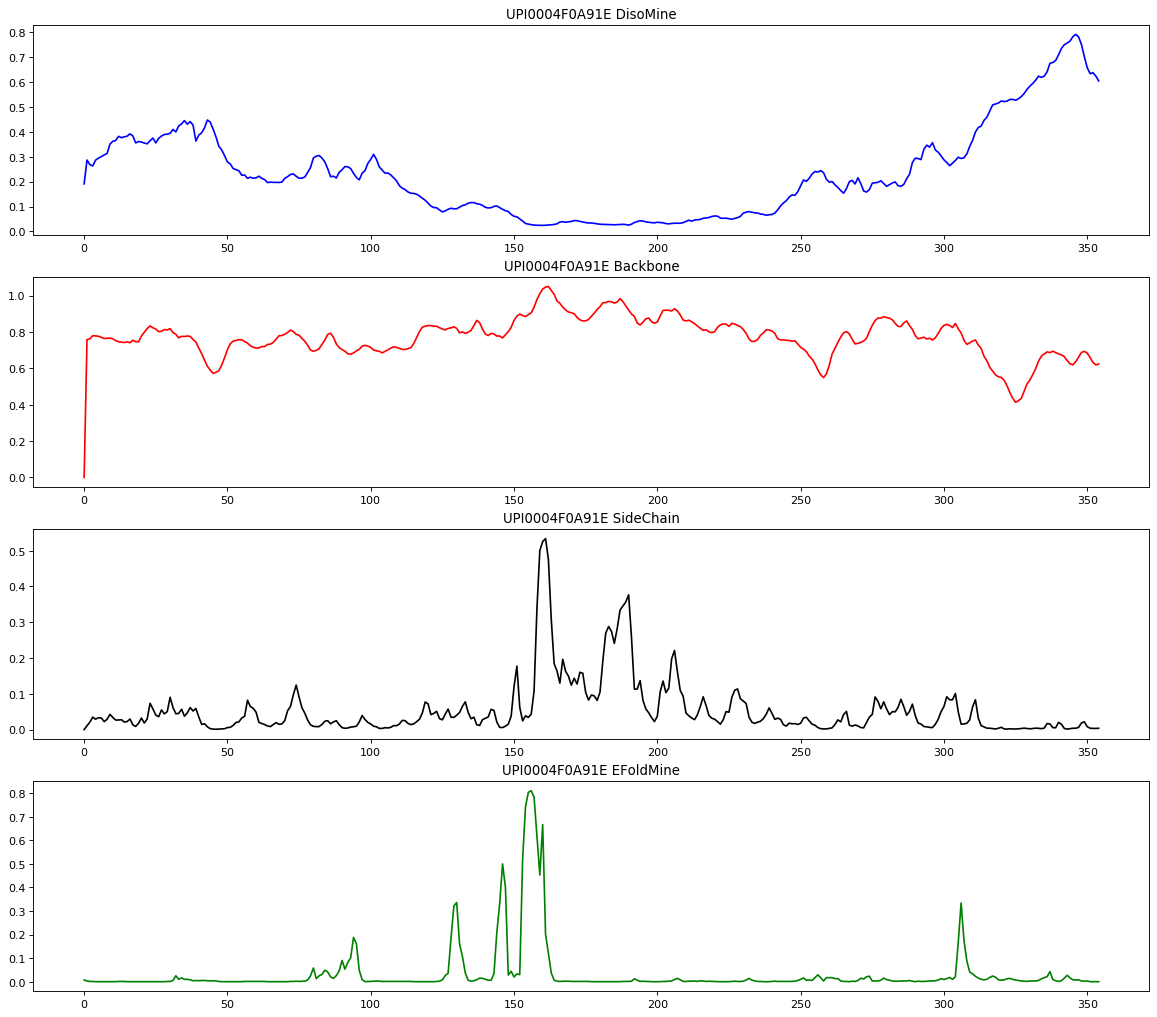

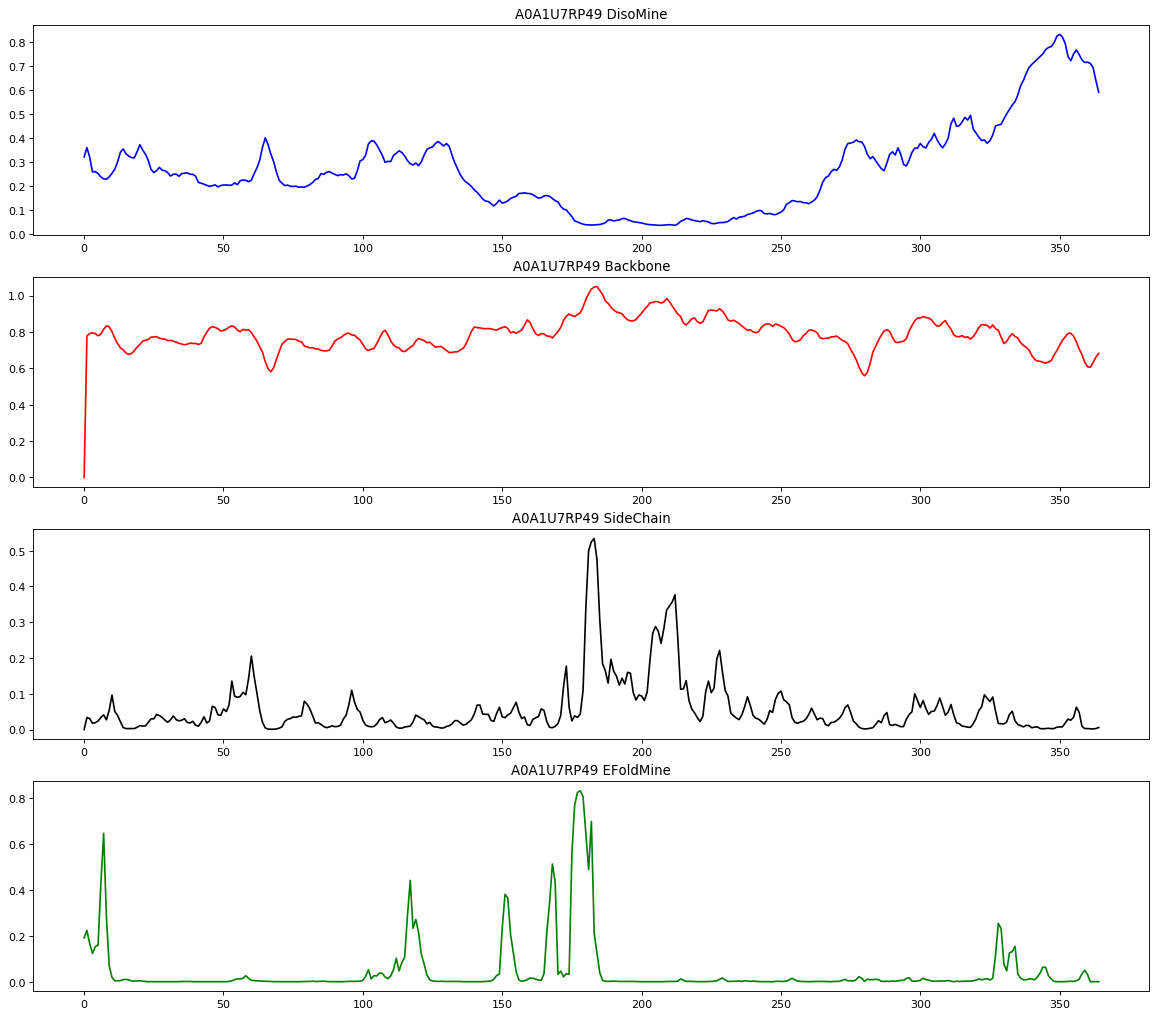

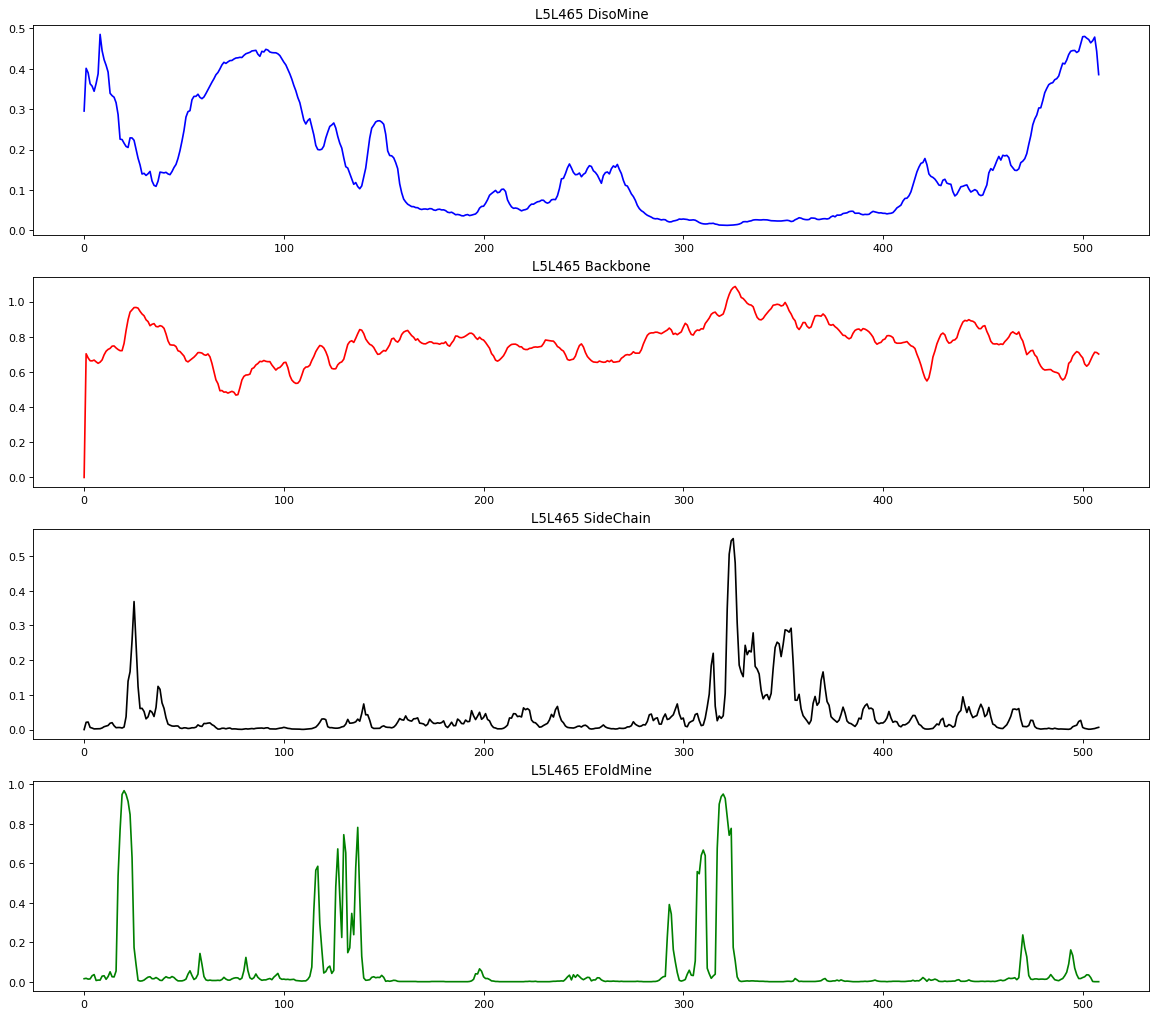

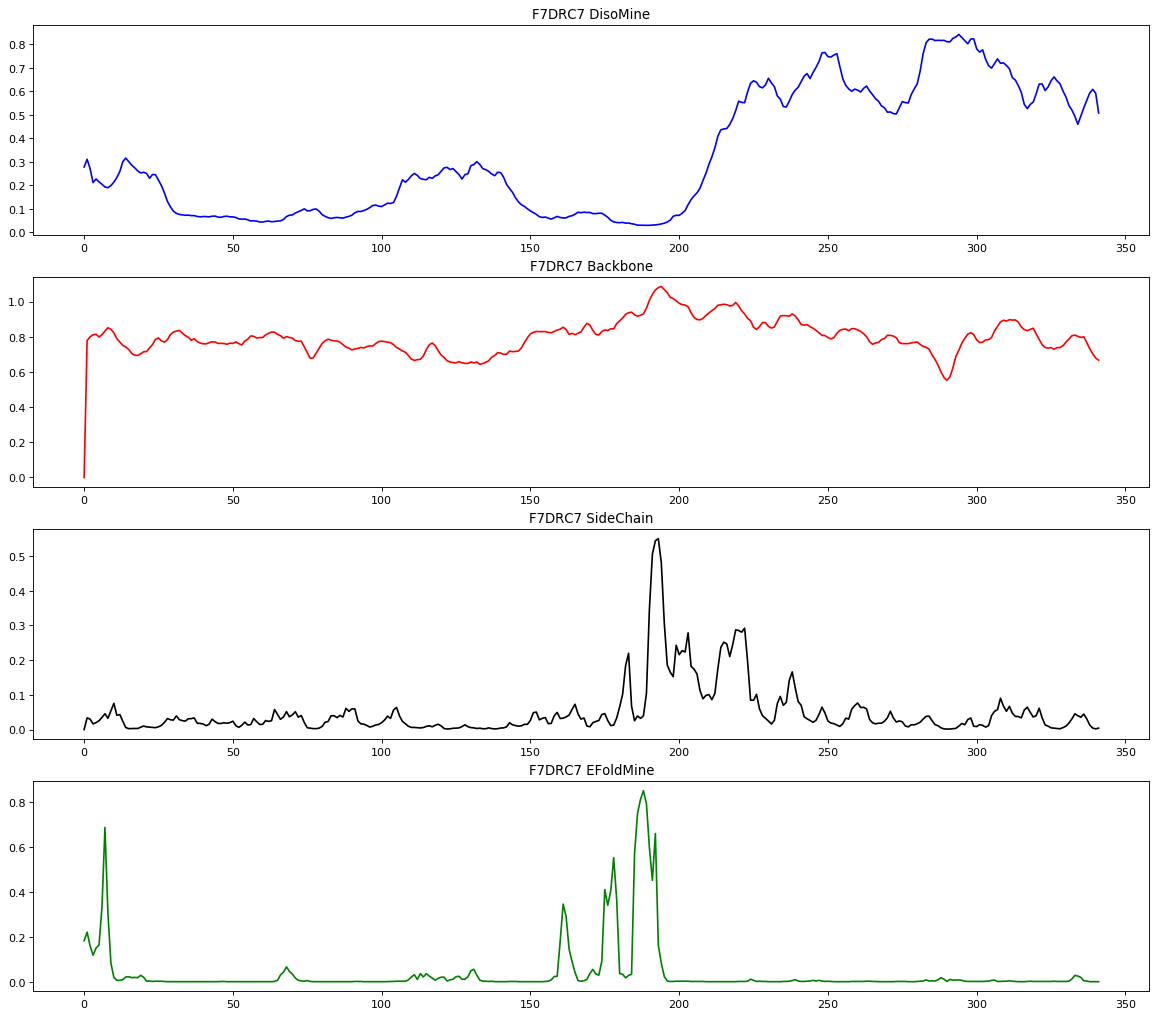

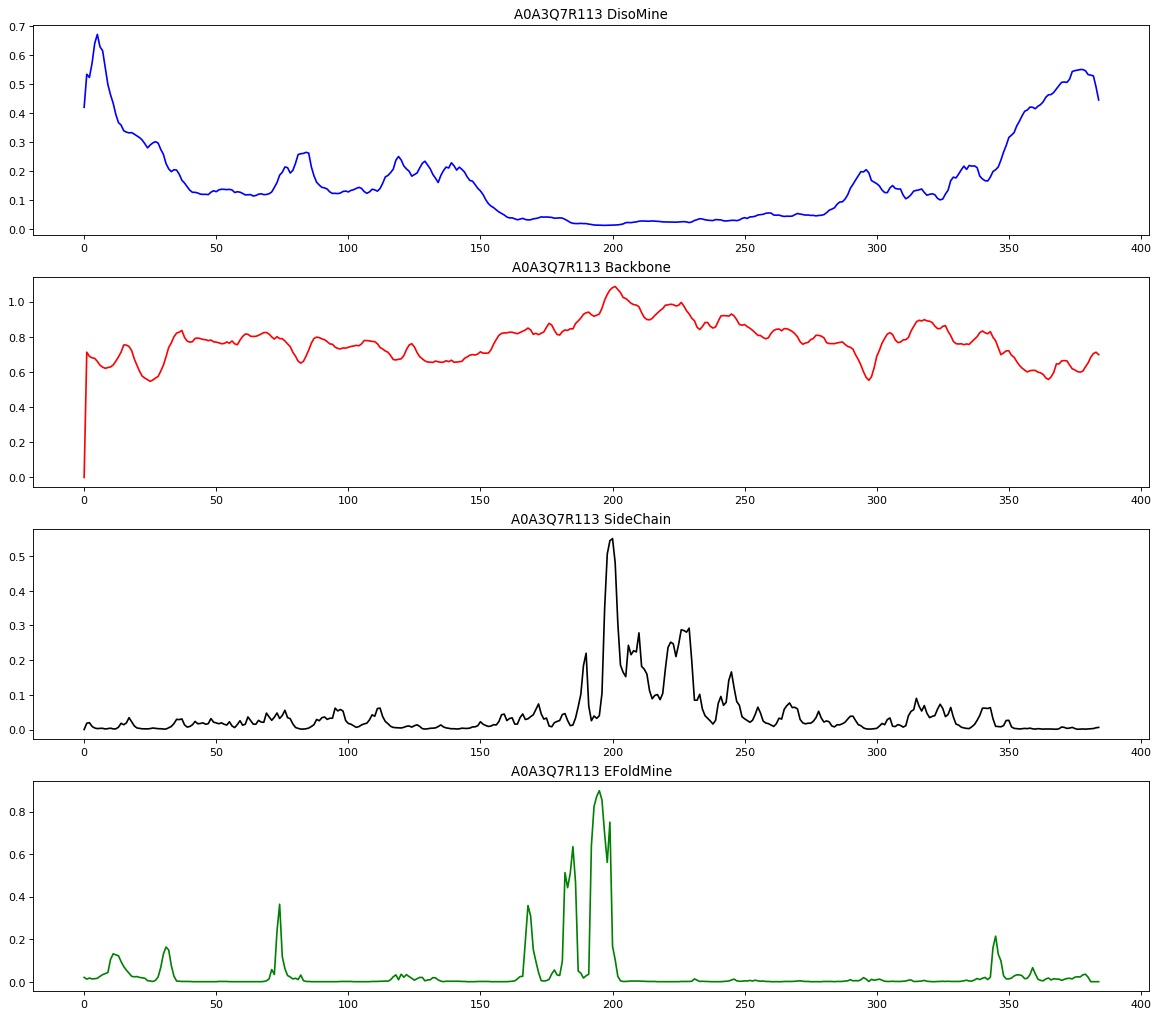

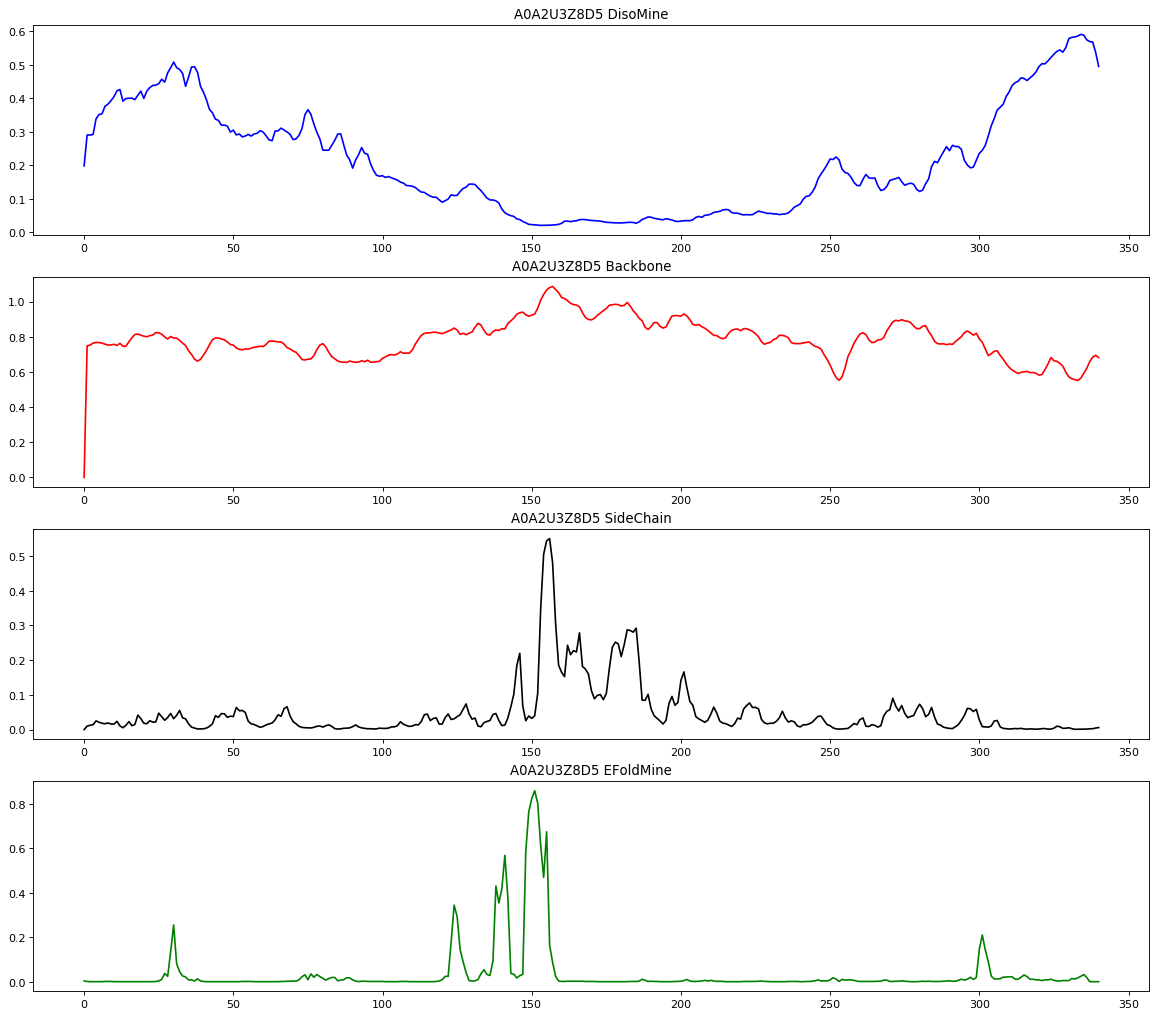

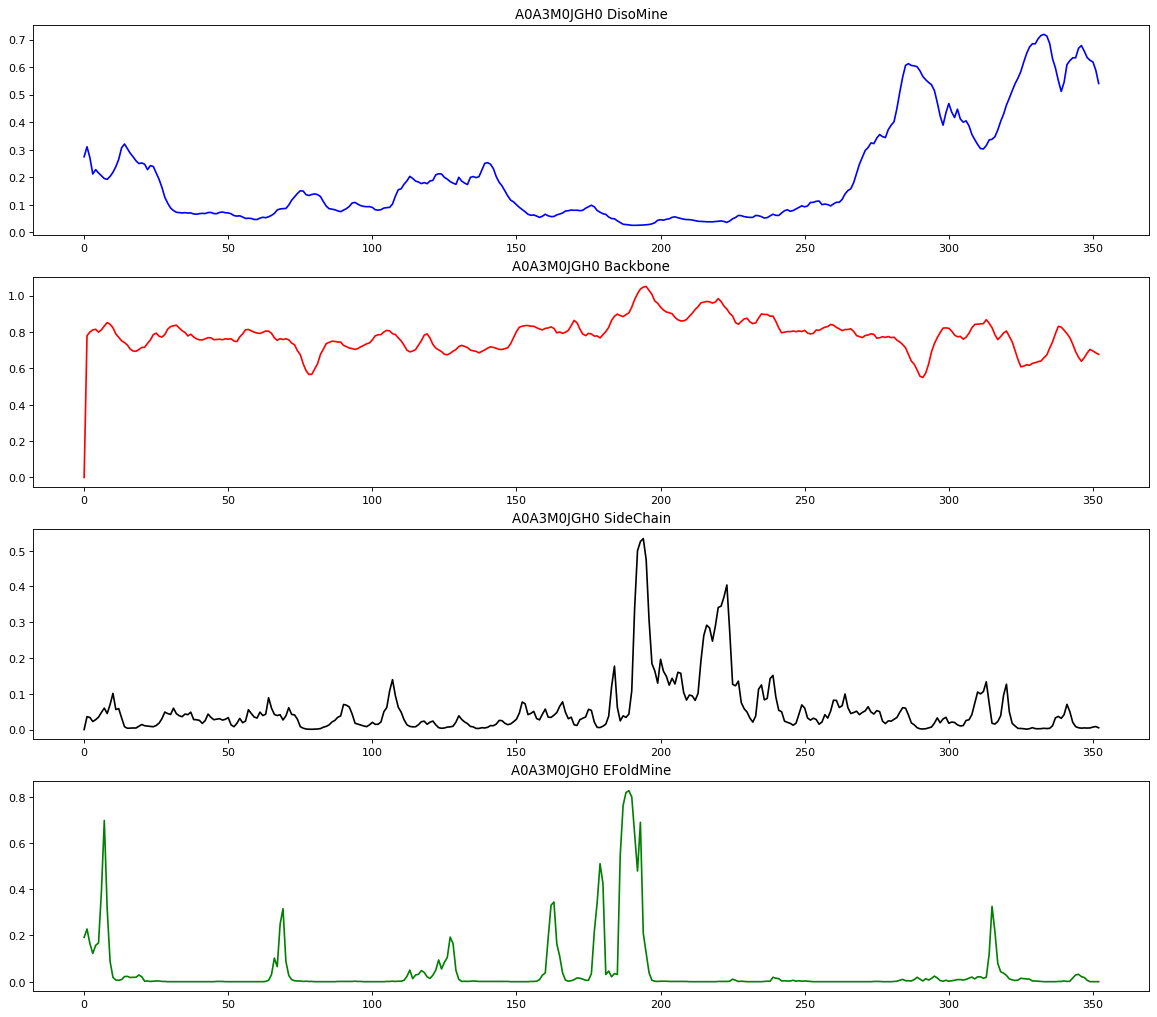

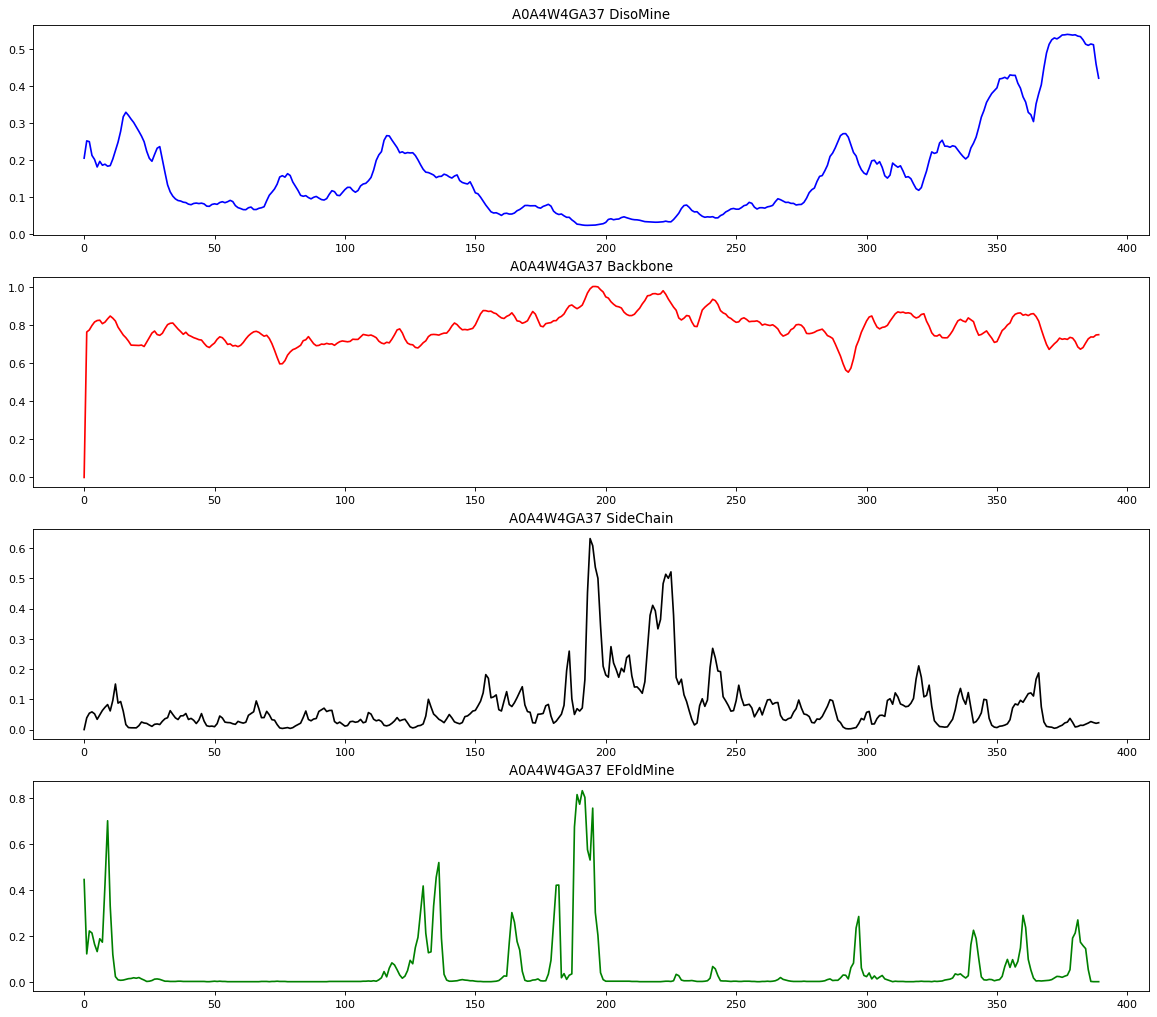

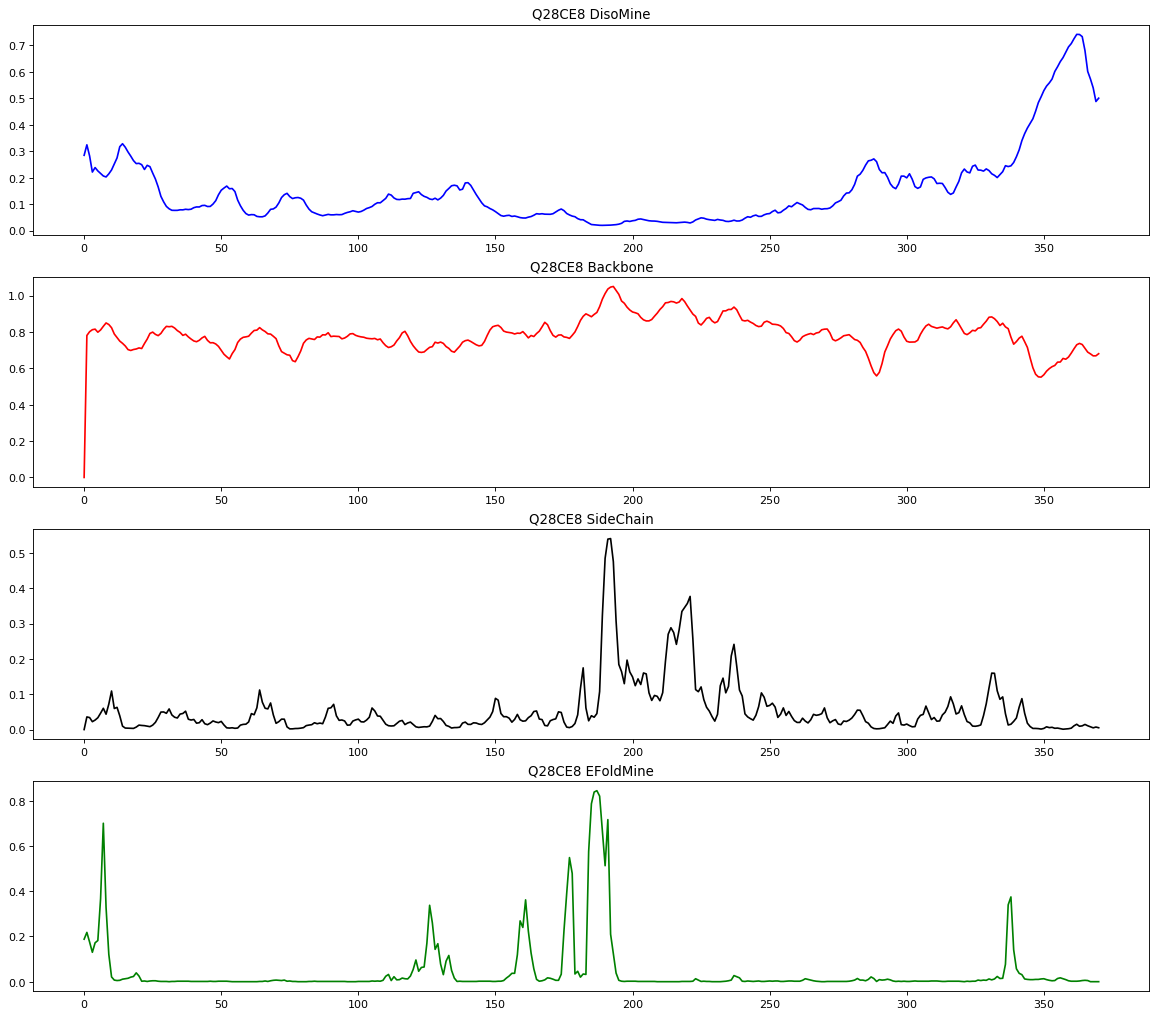

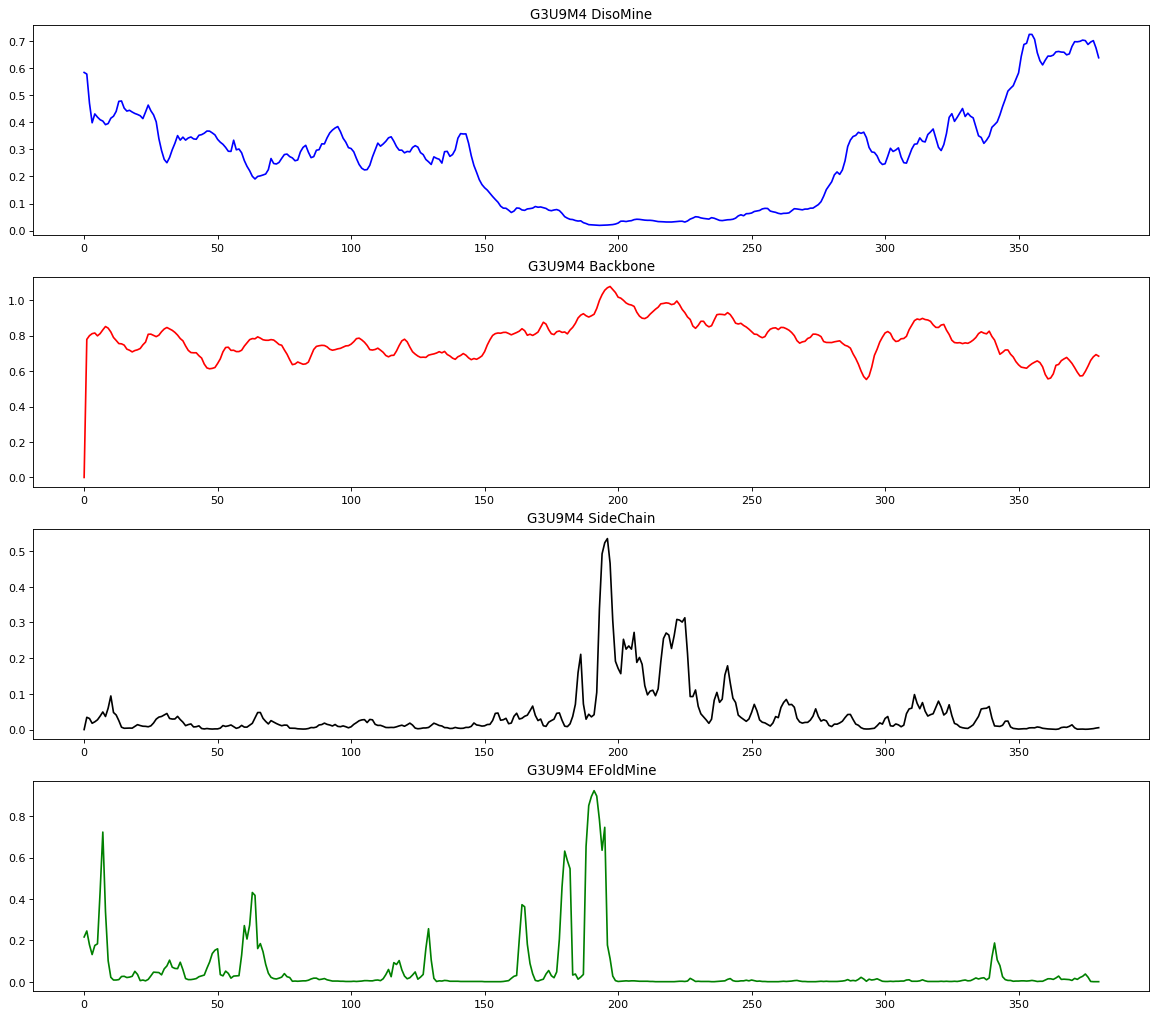

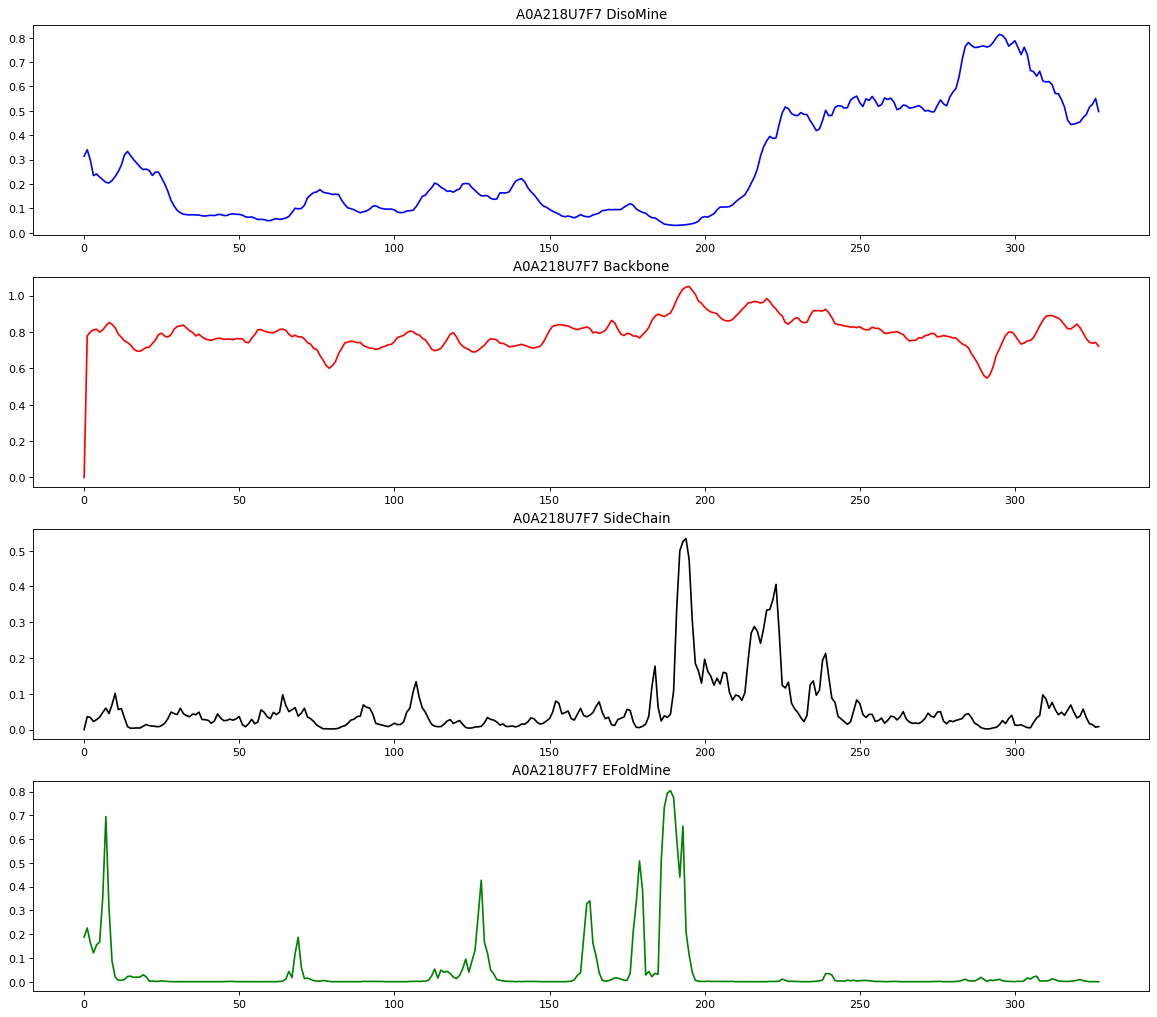

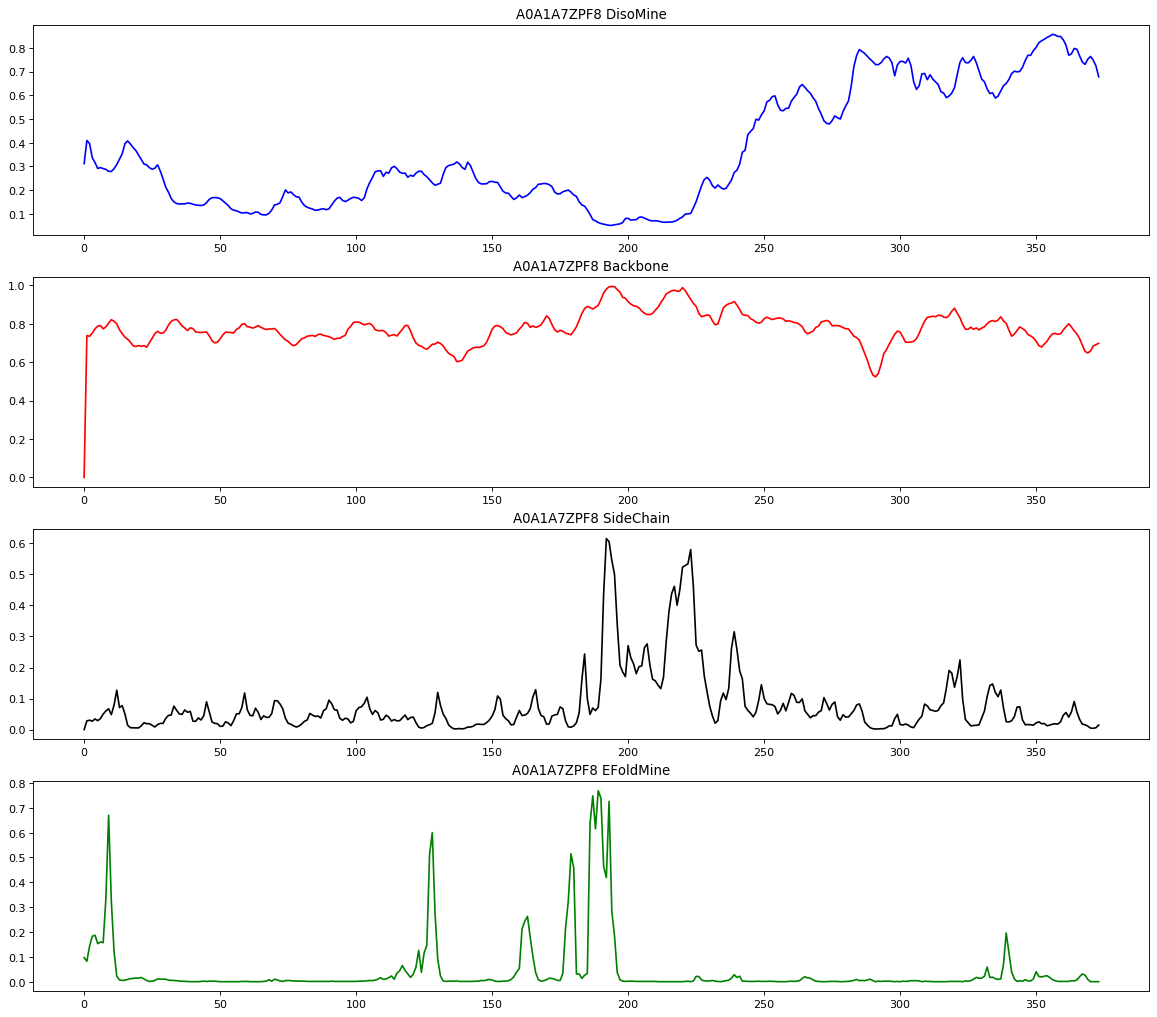

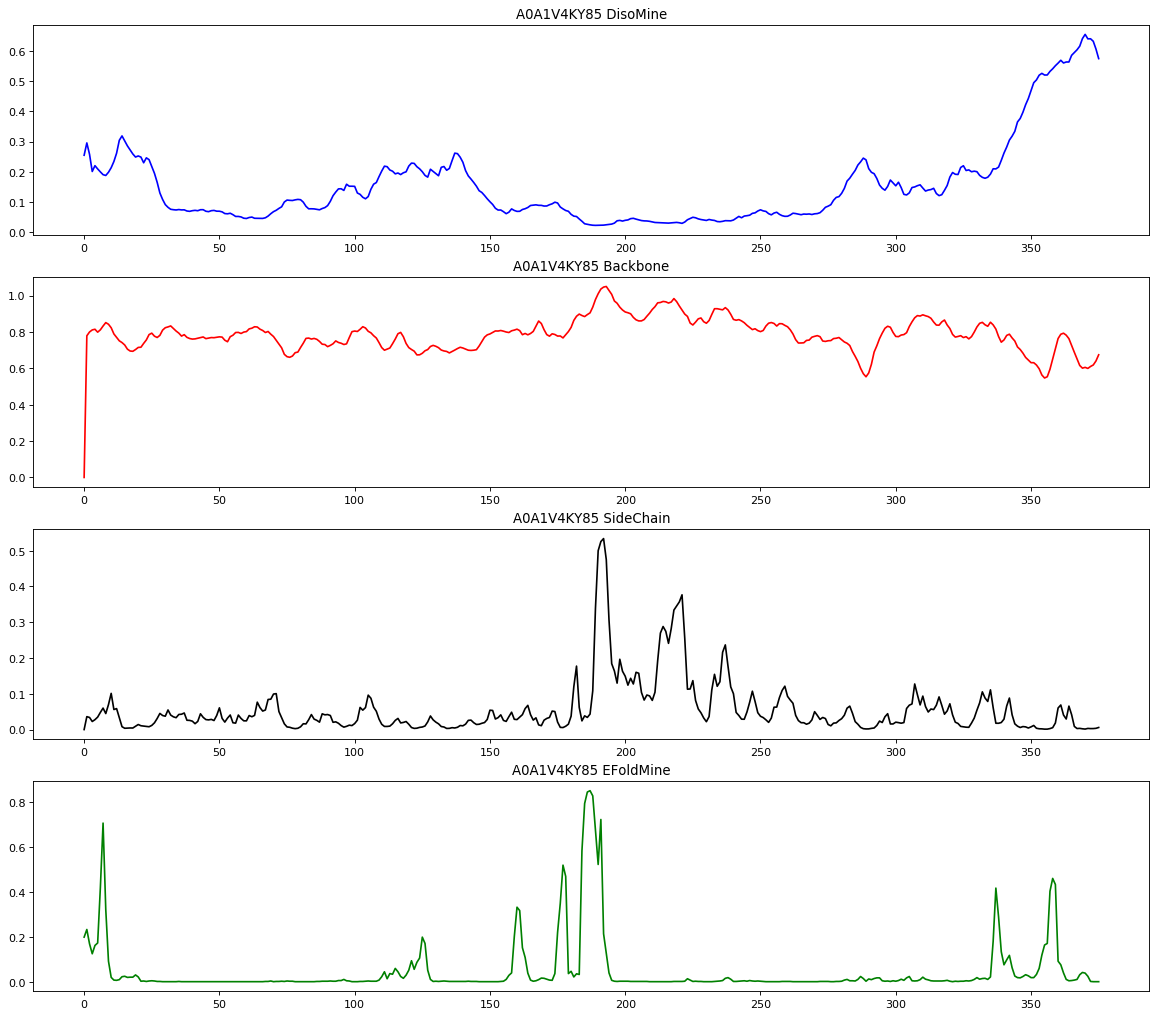

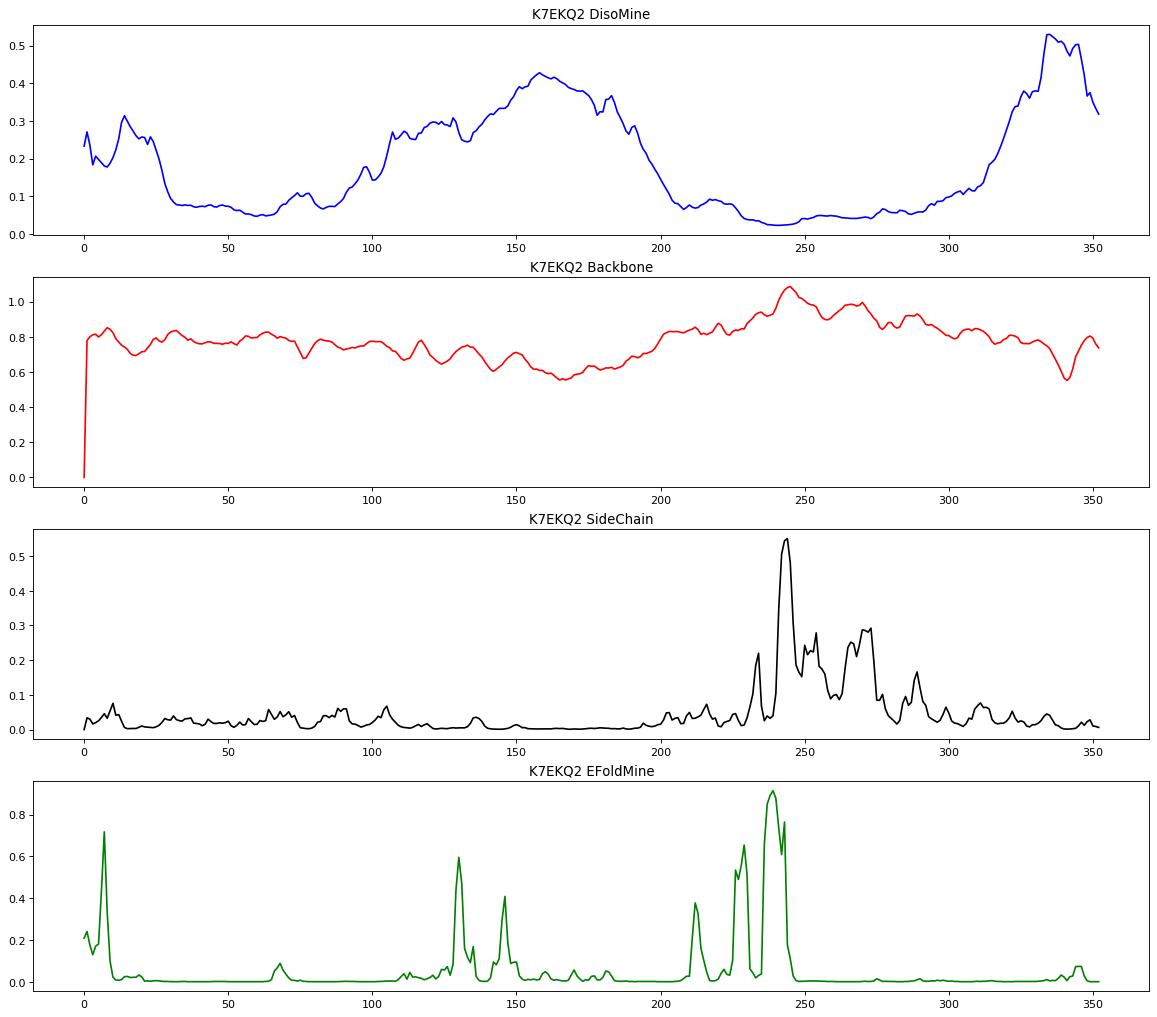

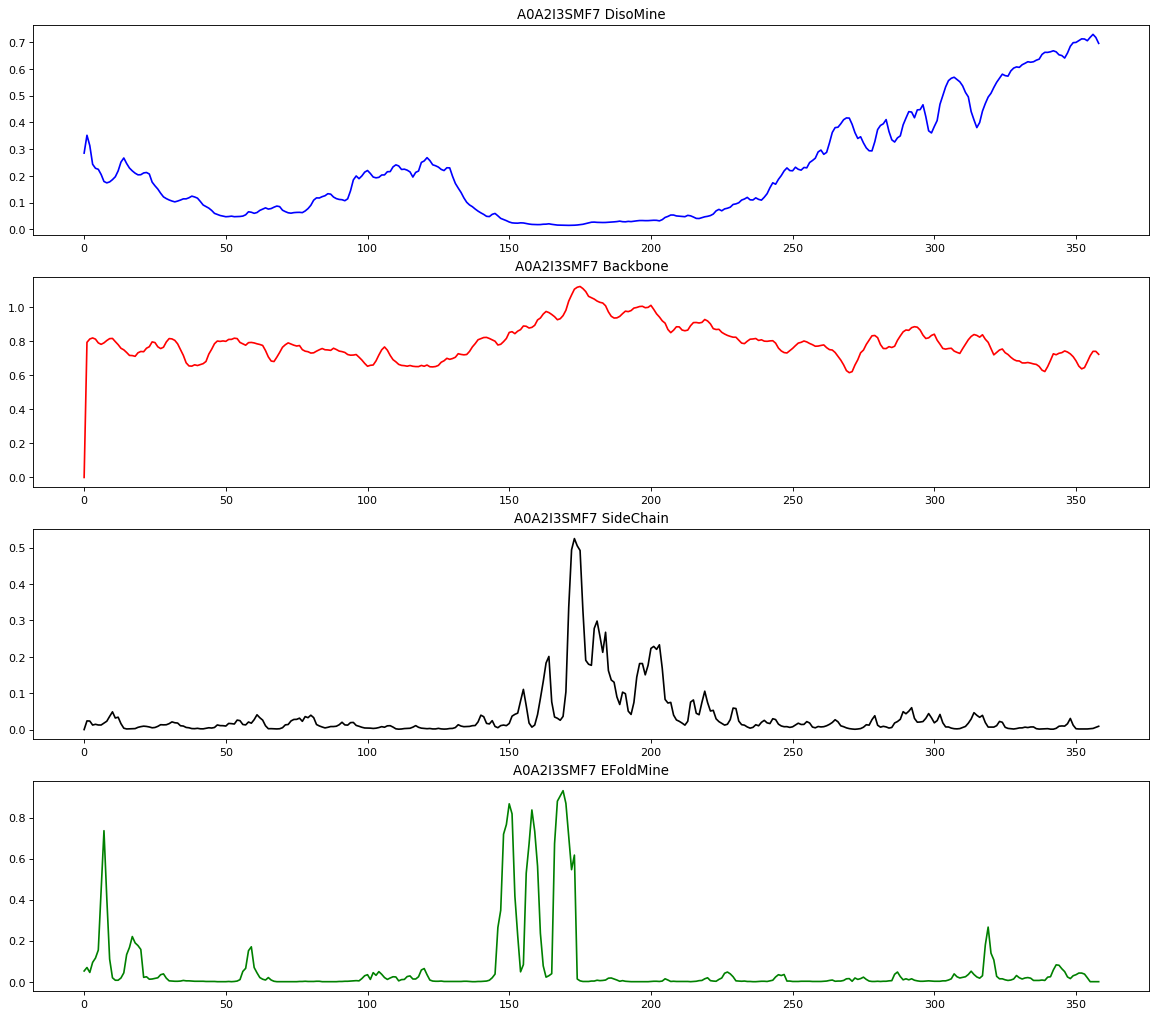

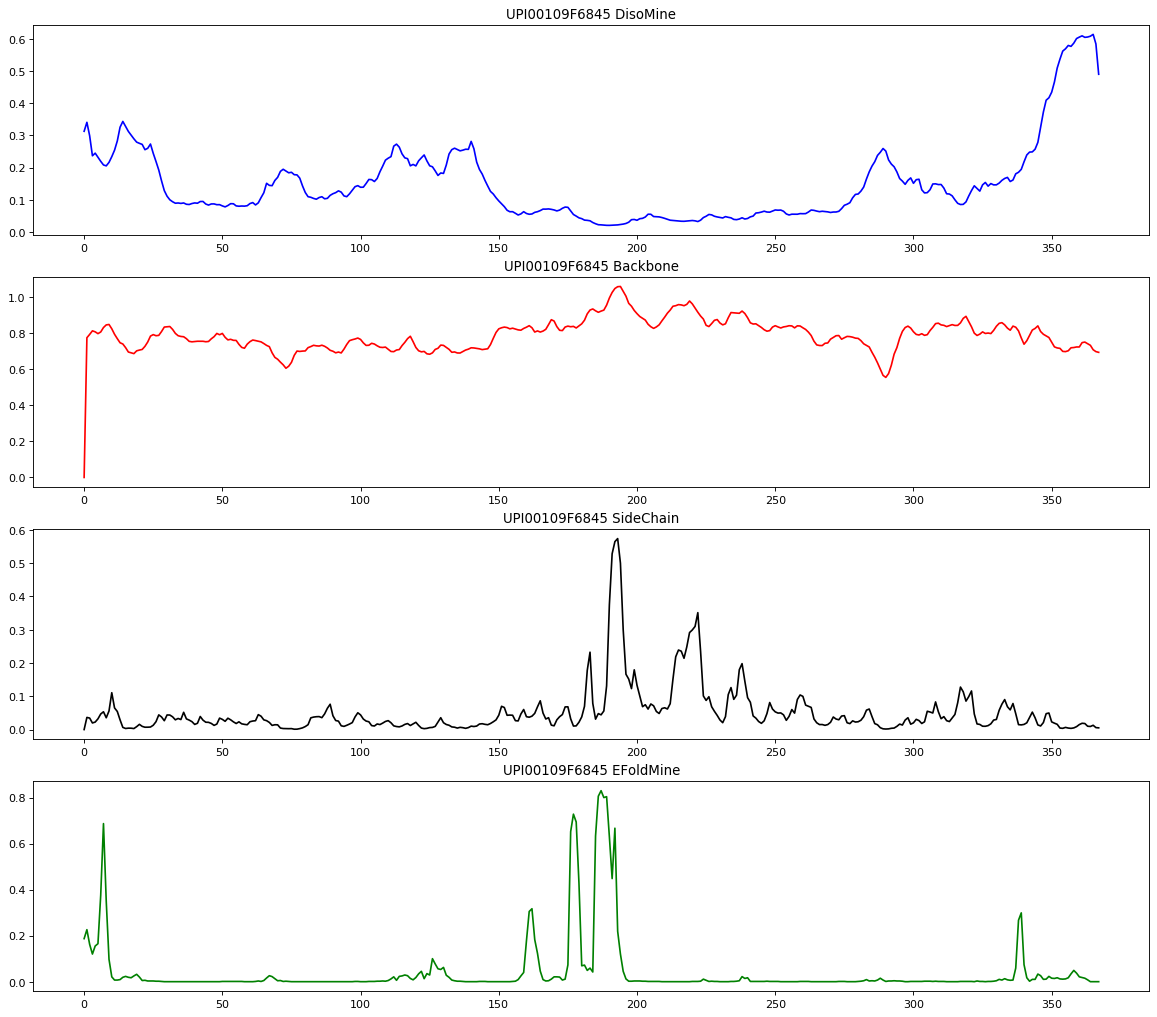

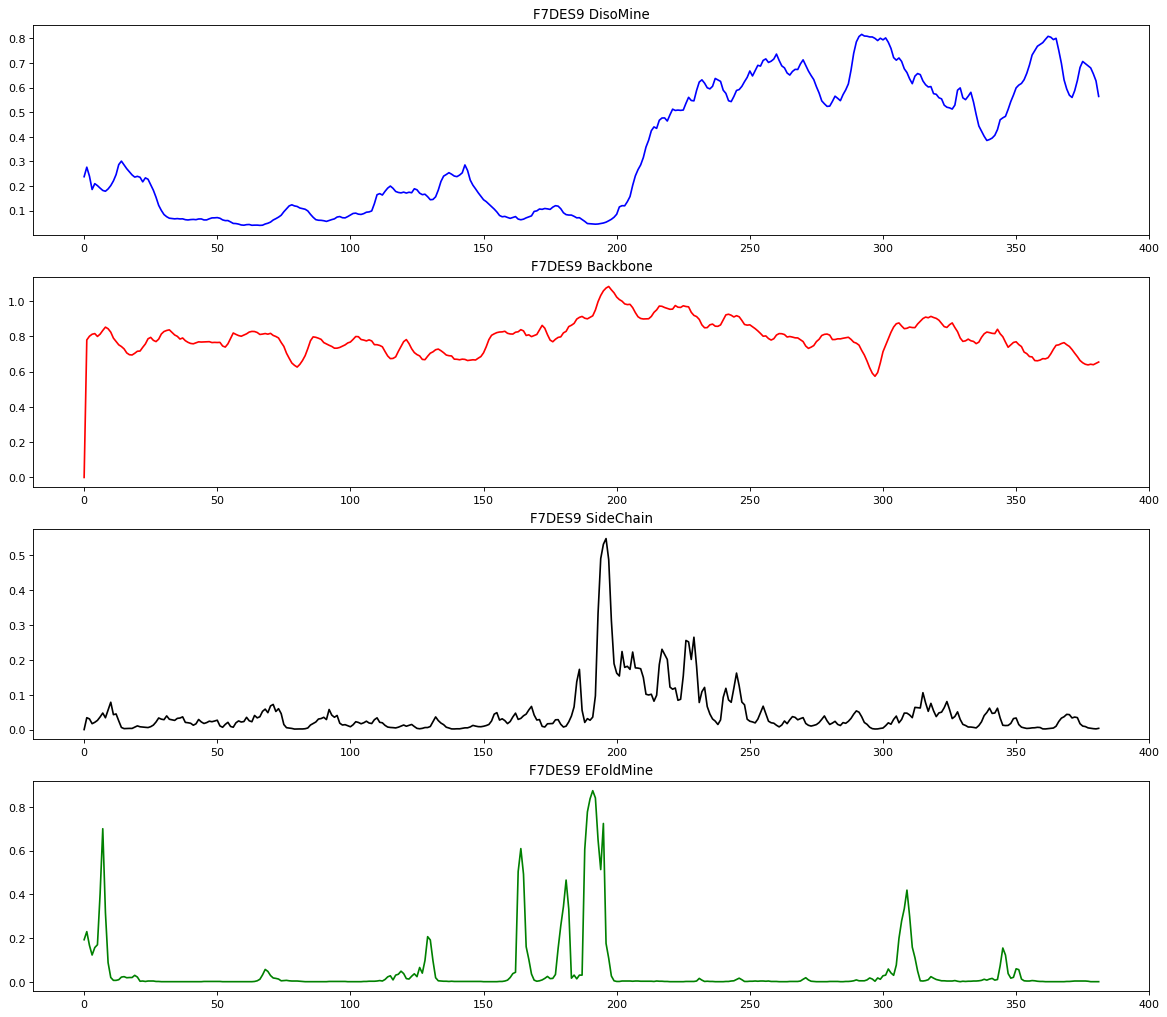

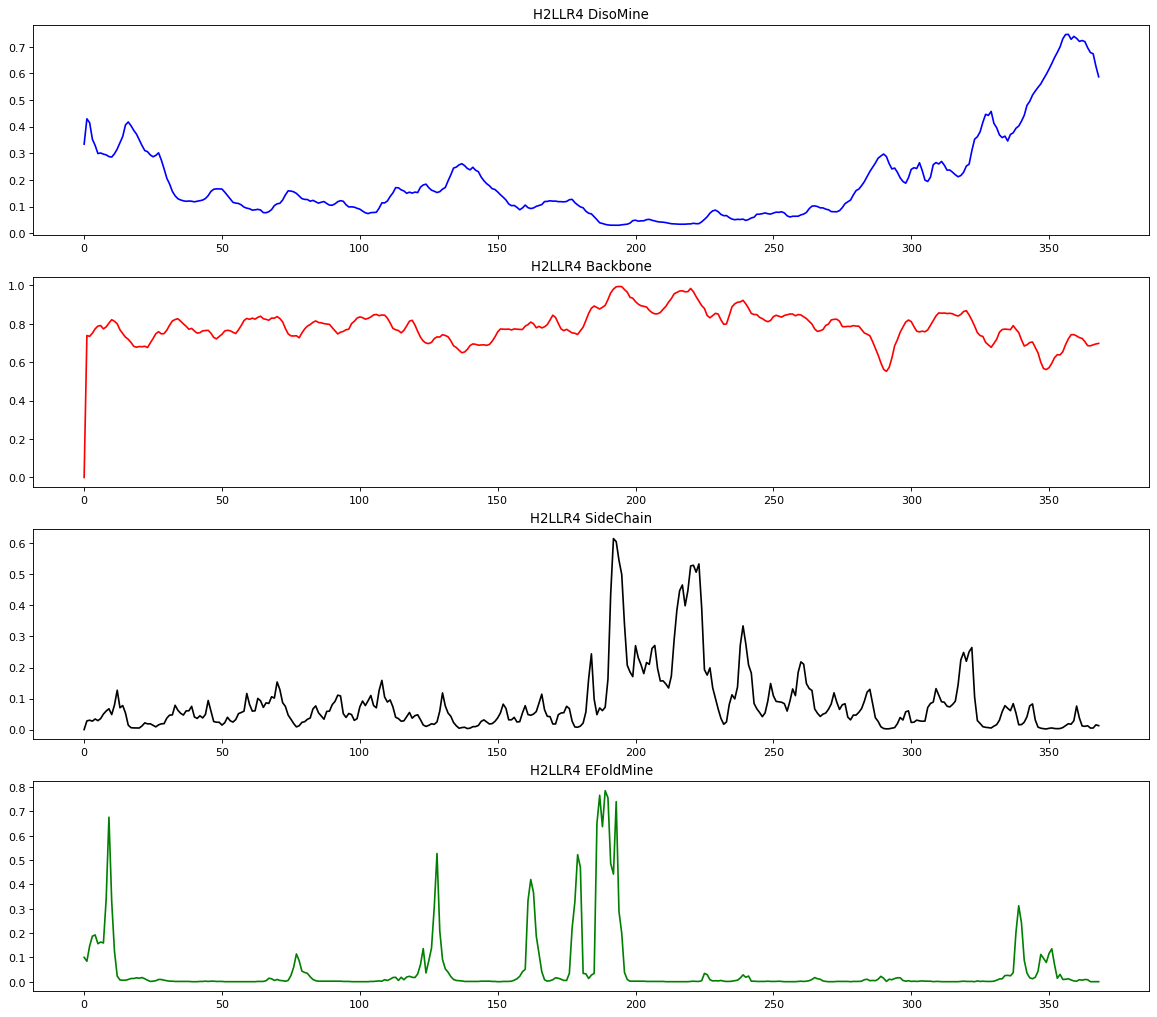

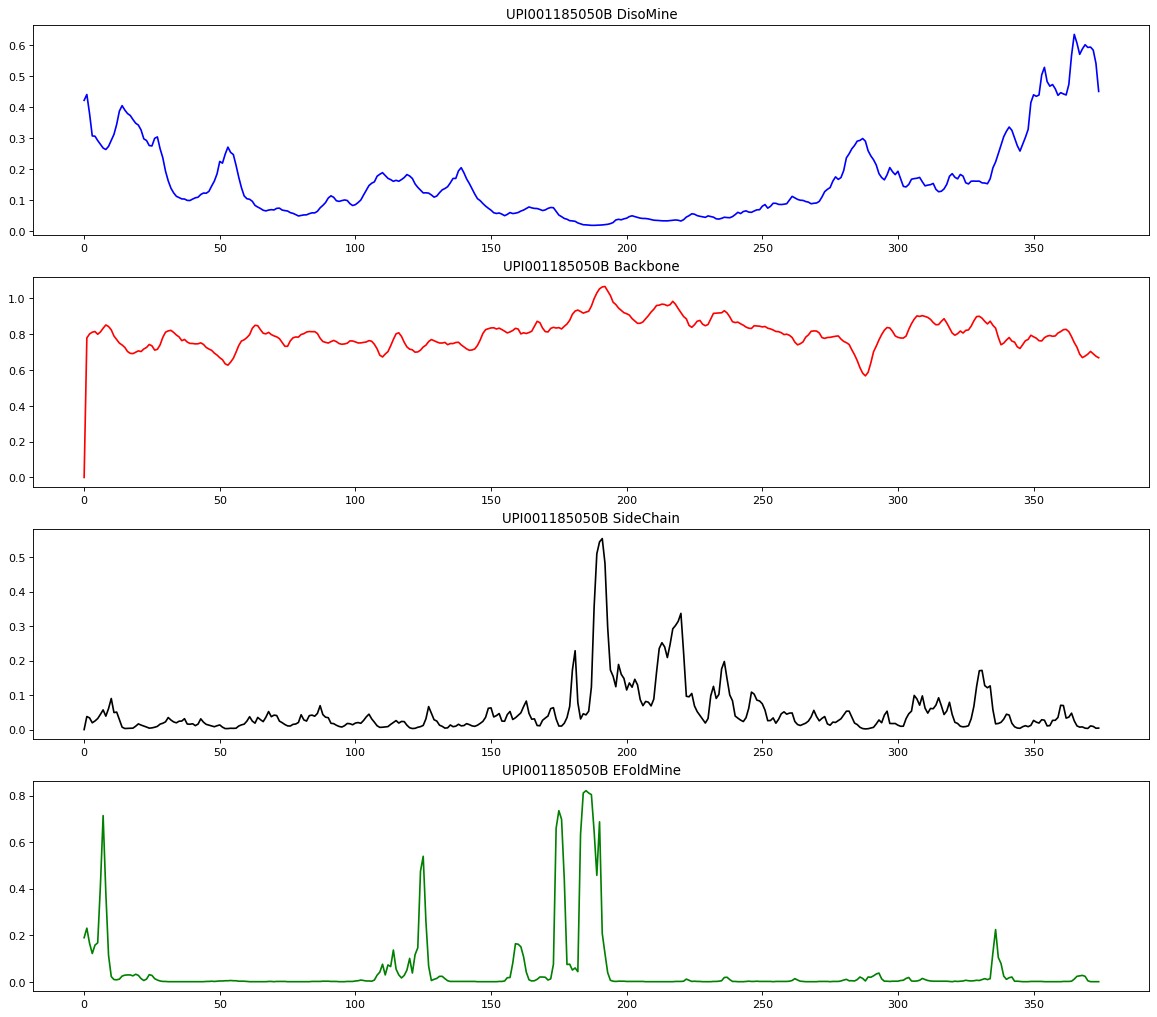

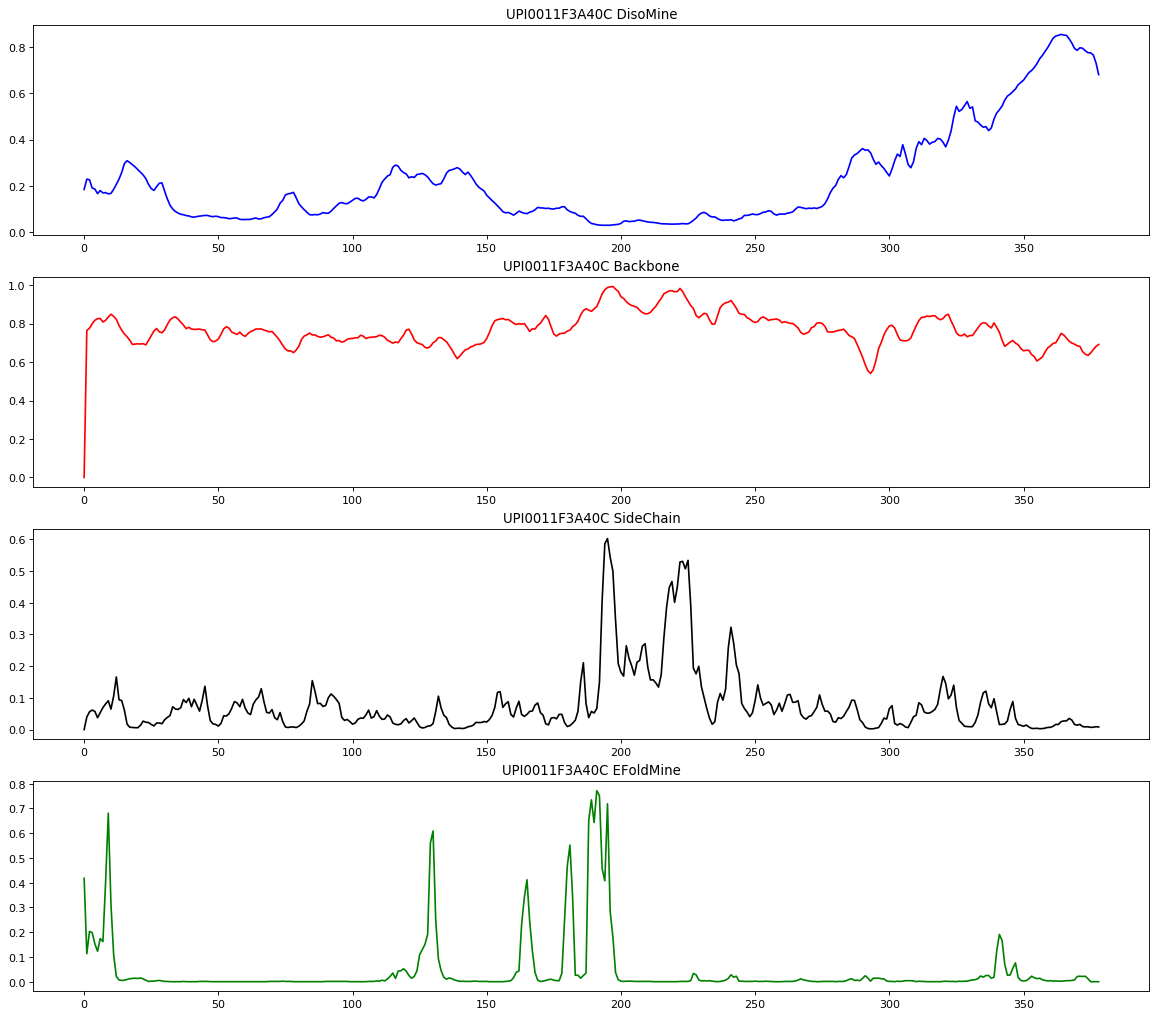

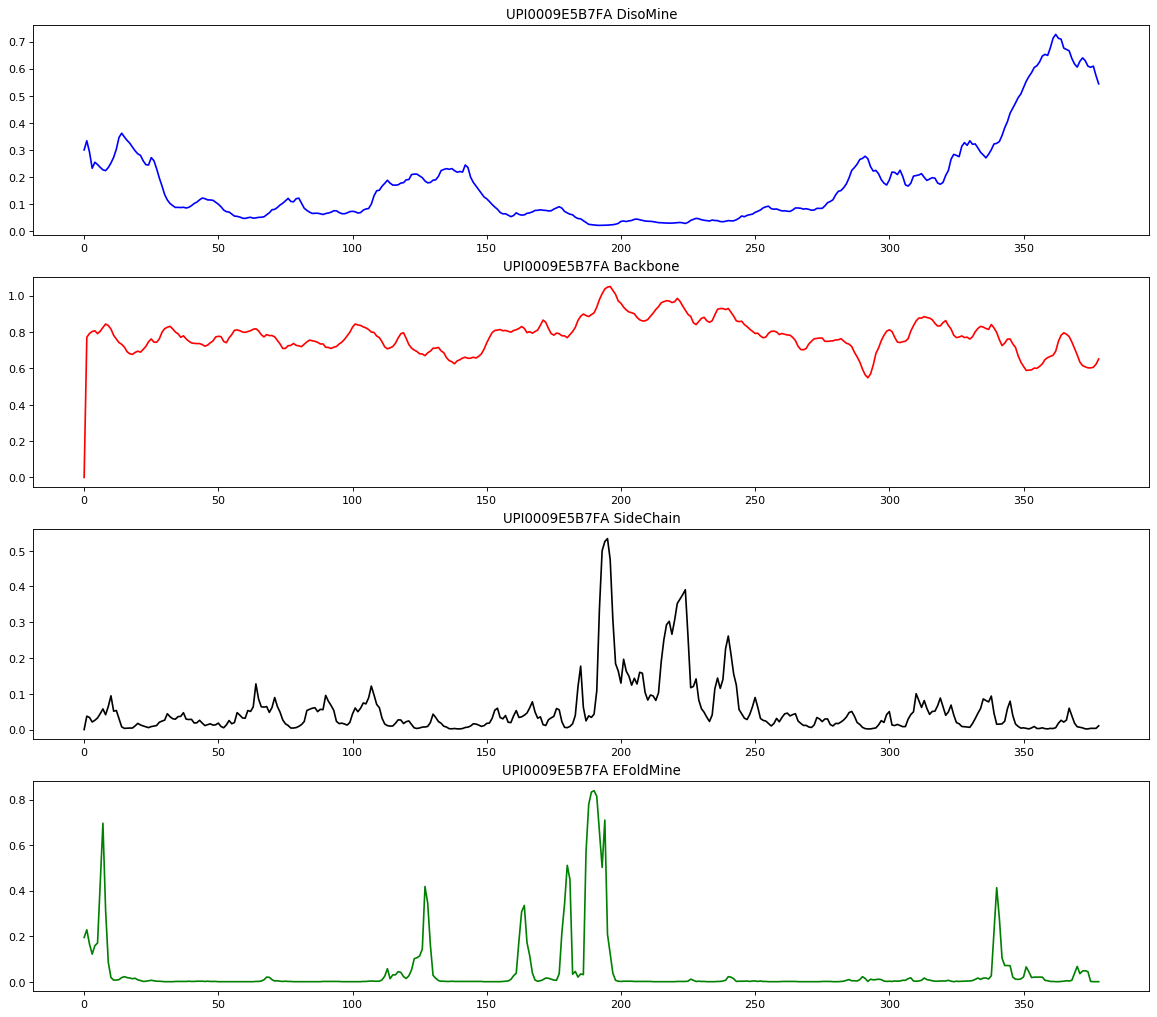

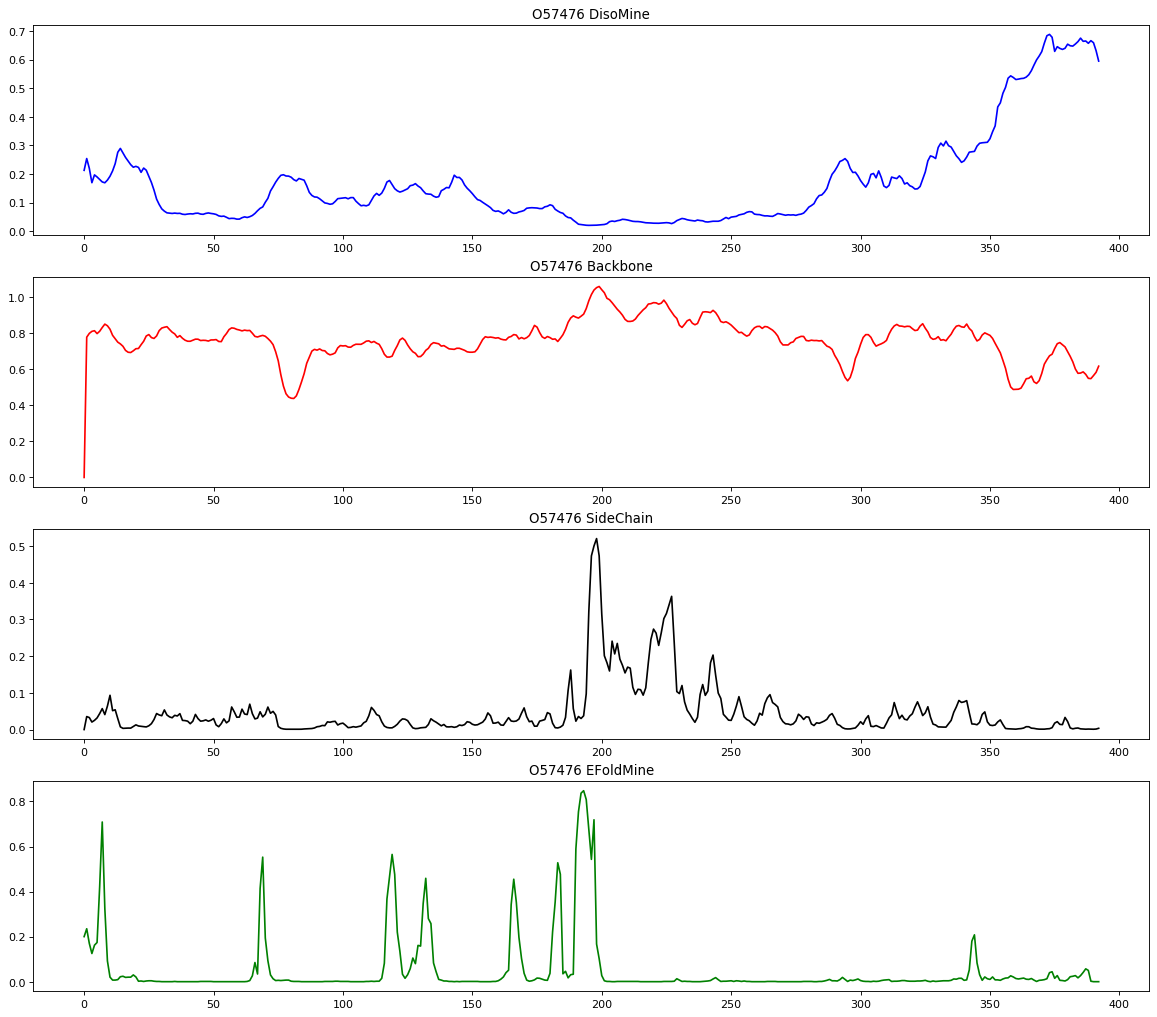

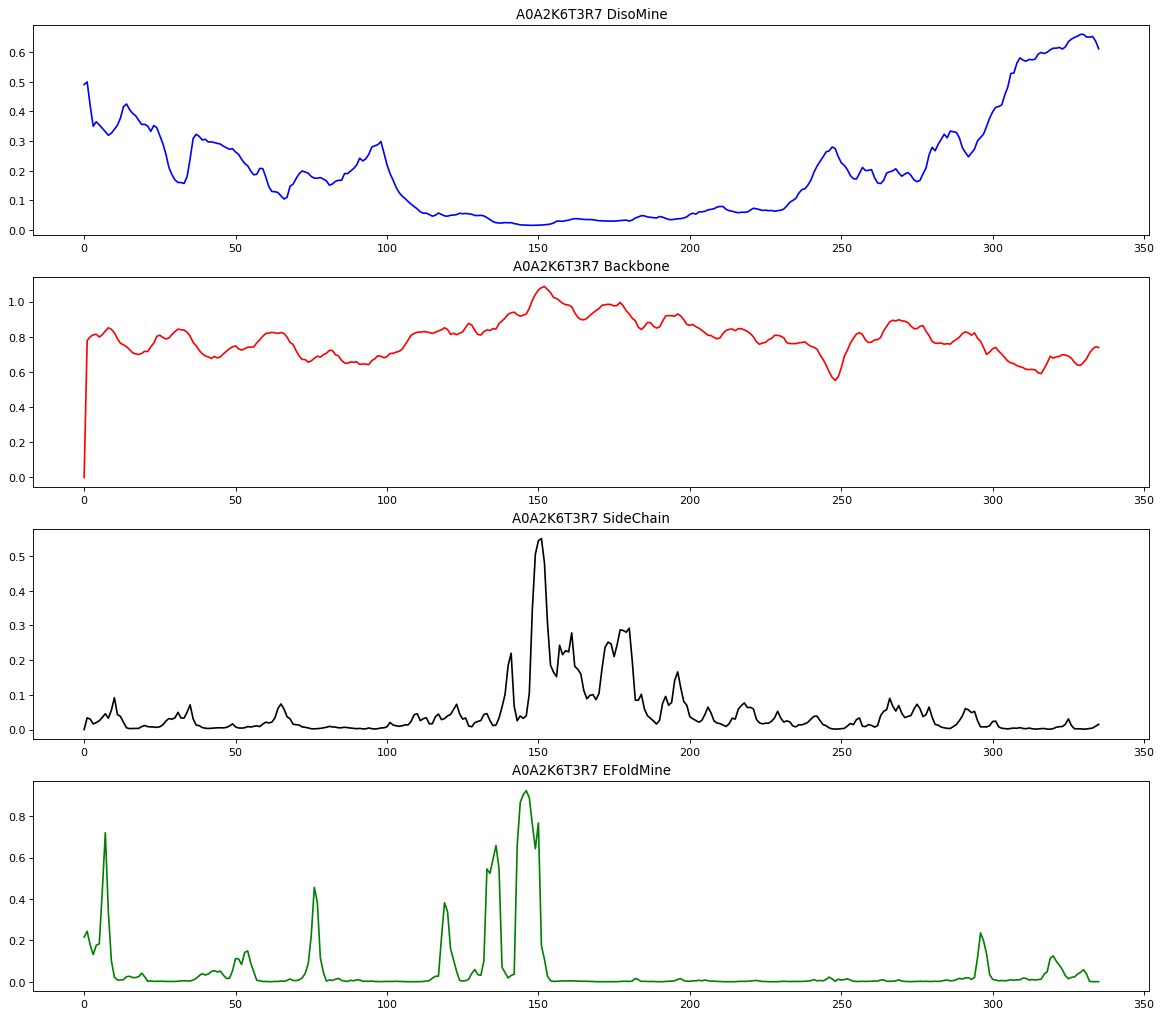

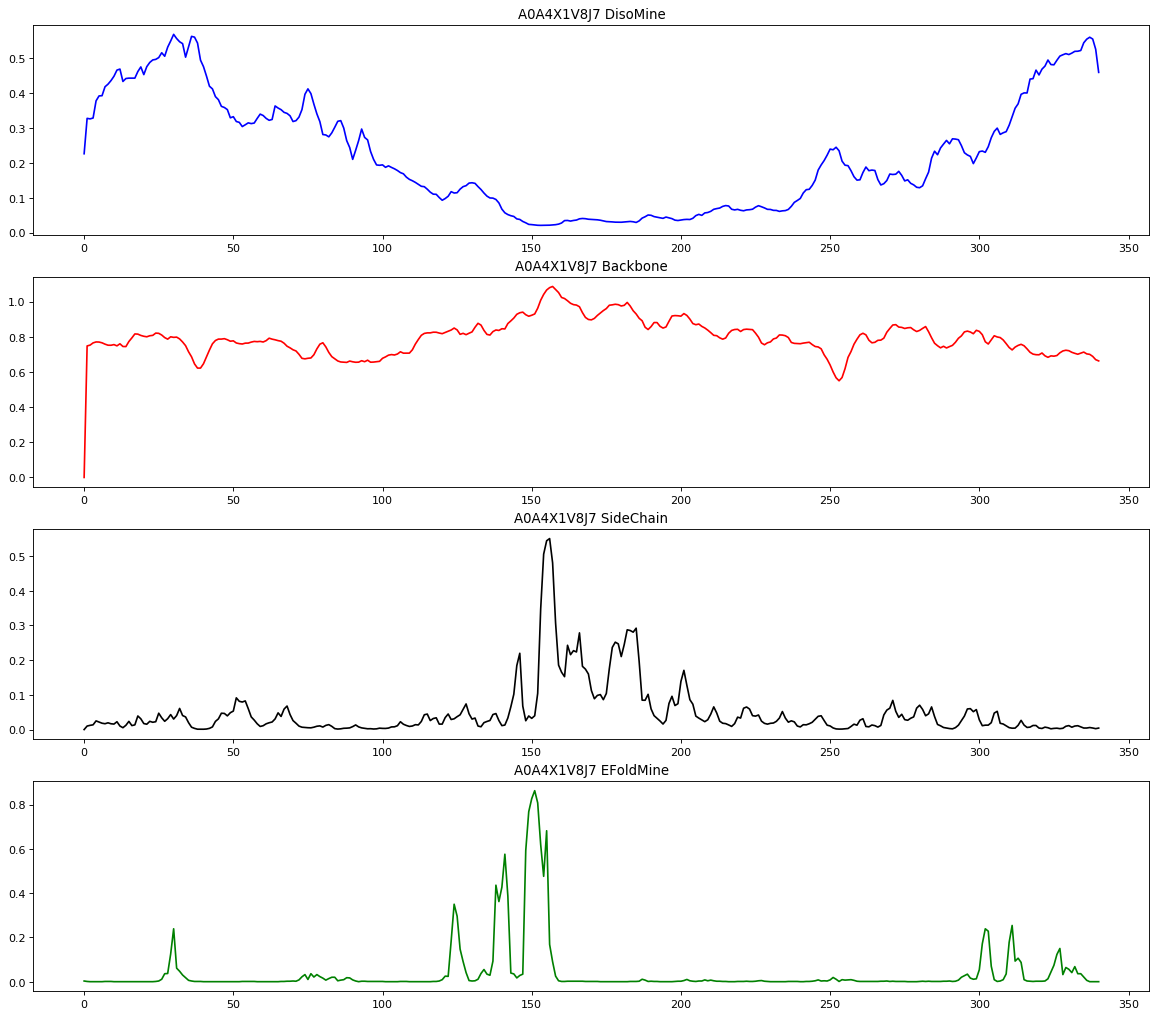

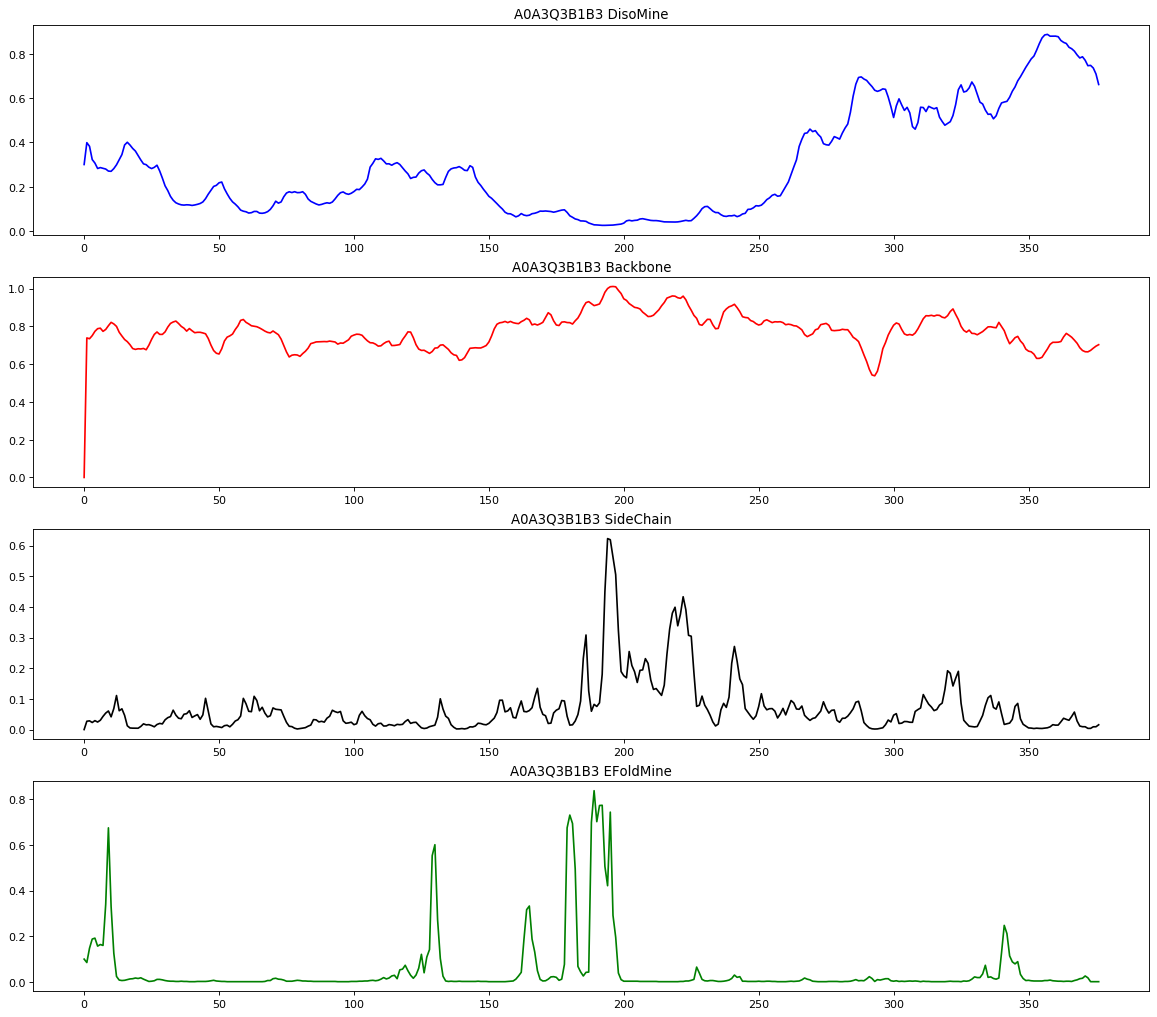

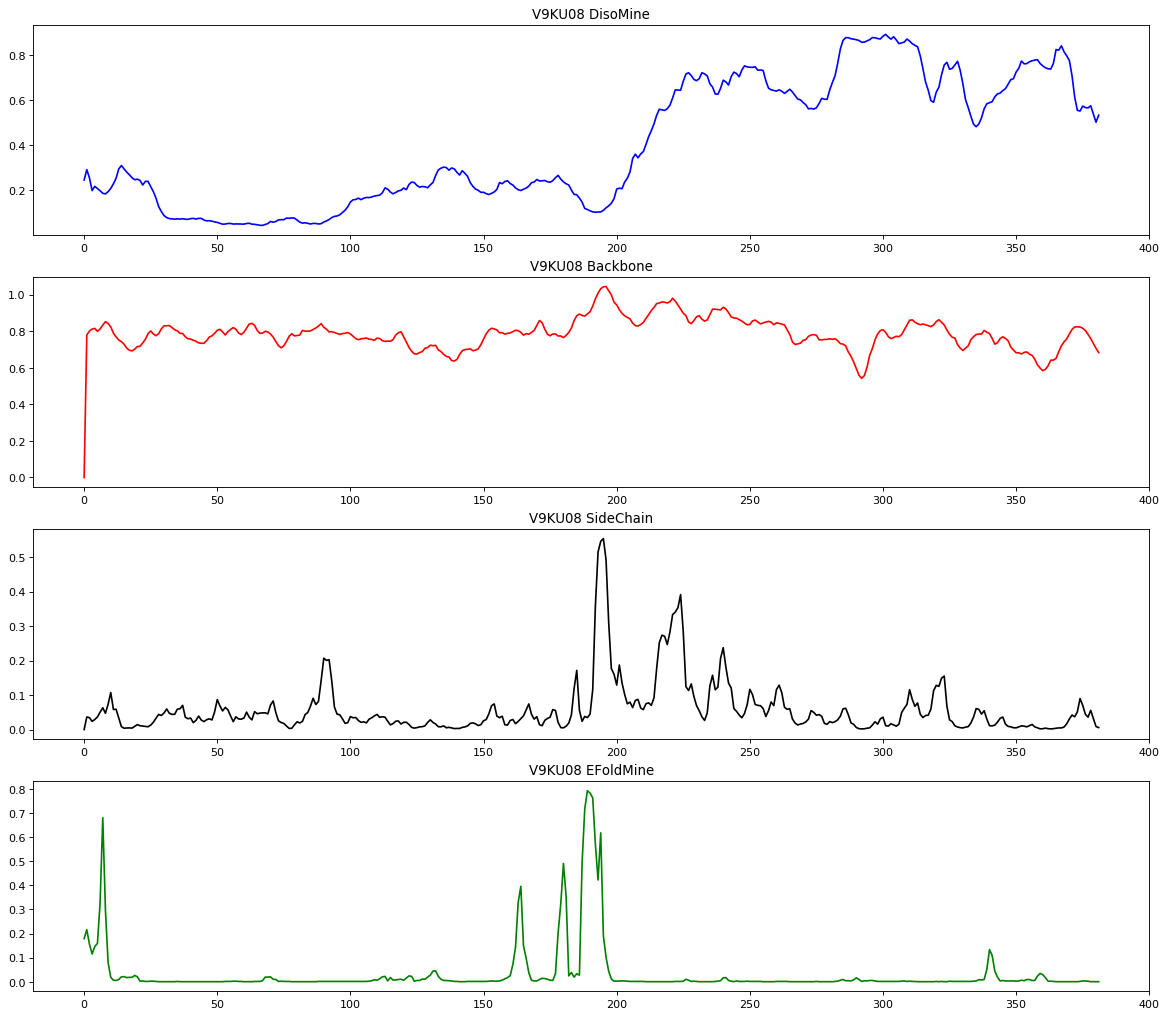

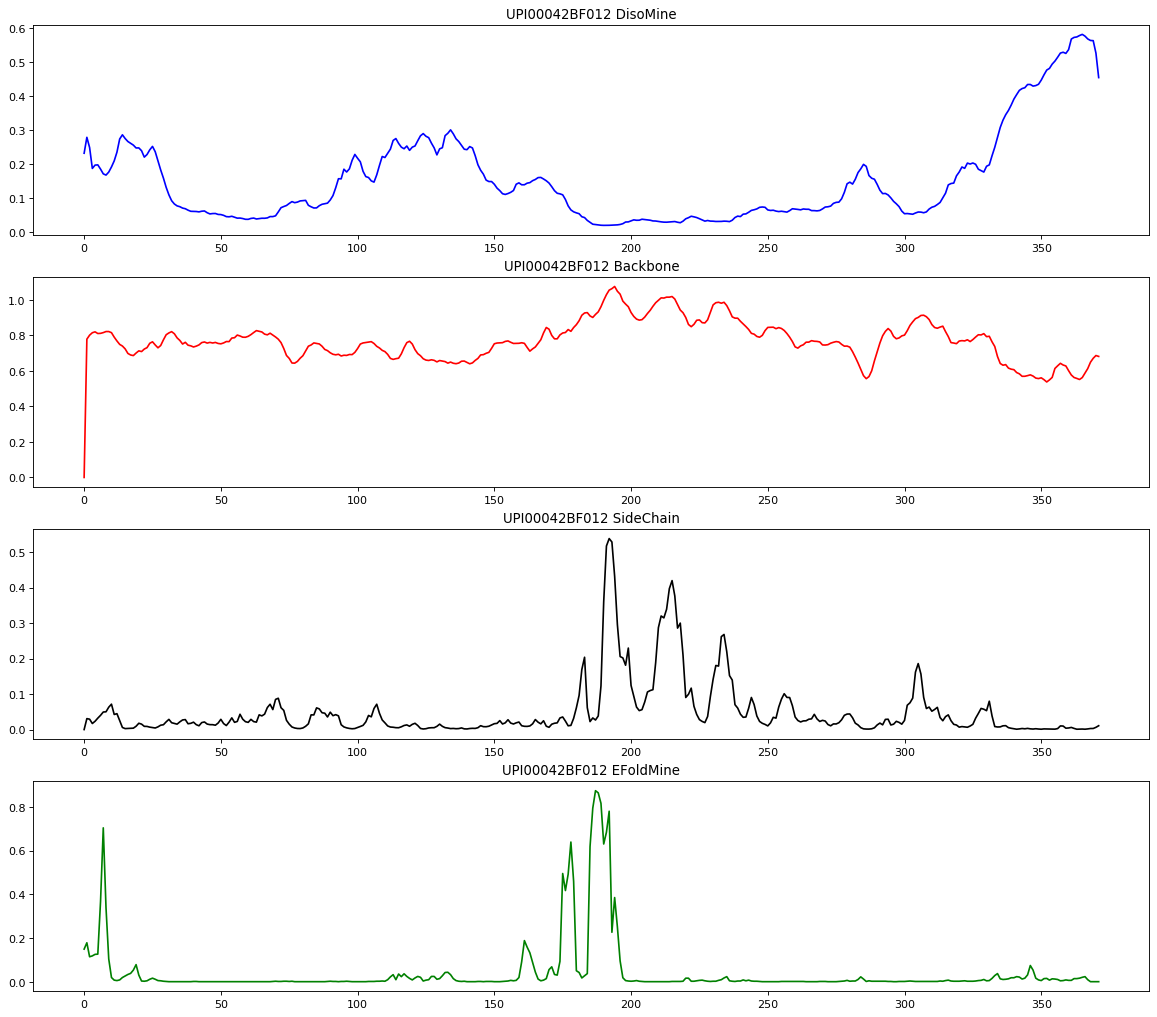

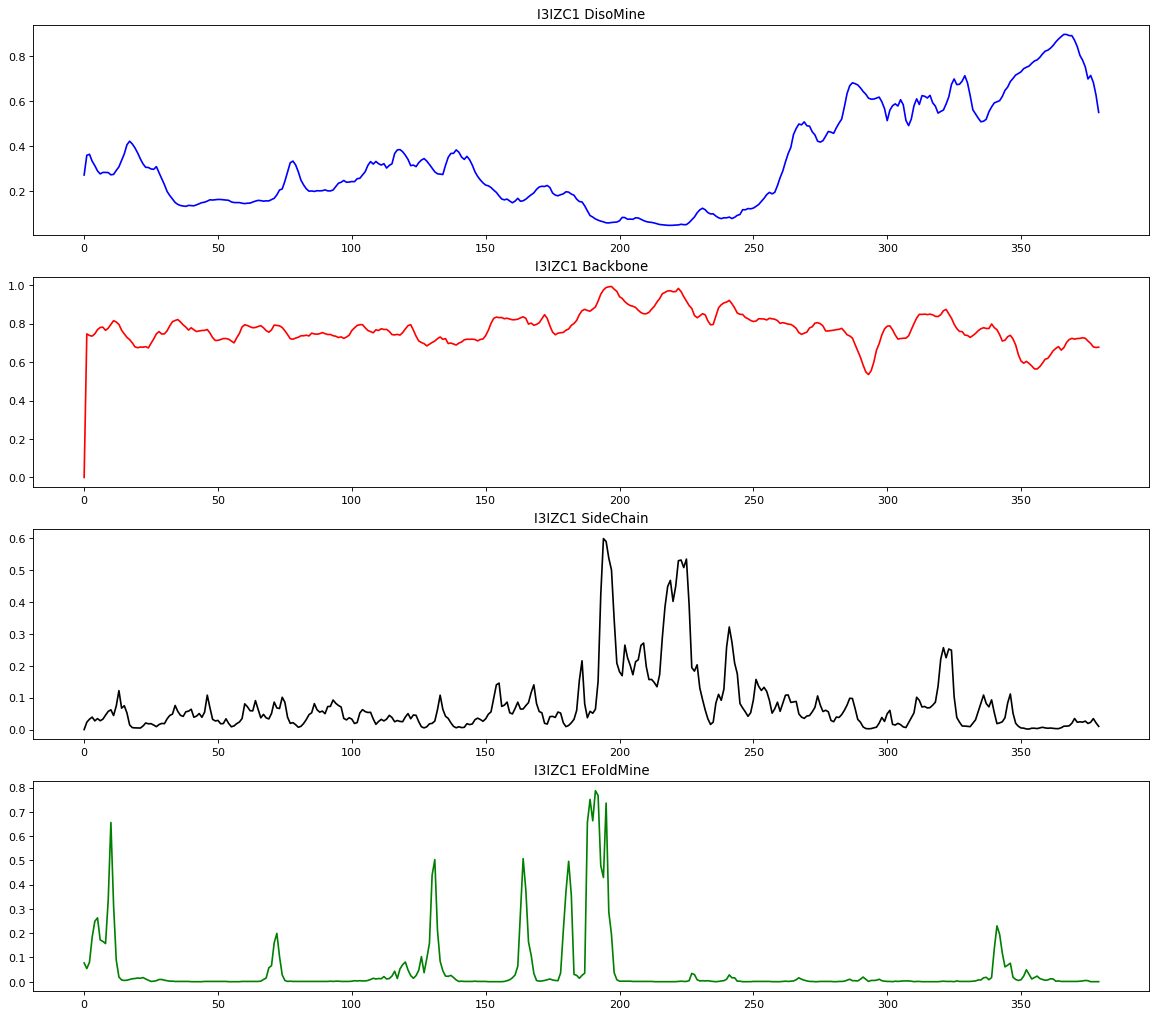

In [12]:
#plot all proteins at once
import matplotlib.pyplot as plt
import json

# Read input Json file
file = open(predJsonFile, 'r')
input = file.read()
request_json = json.loads(input)

for currentProteinIndex in range(len(request_json["results"])):
# Note that here we are showing the results for the first protein - index 0 in the results list
#currentProteinIndex = 2

    # residue index
    seq = request_json["results"][currentProteinIndex]['sequence']
    #DisoMine Score
    disomine = request_json["results"][currentProteinIndex]['disomine']
    #backbone Score
    backbone = request_json["results"][currentProteinIndex]['backbone']
    #sidechain Score
    sidechain = request_json["results"][currentProteinIndex]['sidechain']
    #efoldmine Score
    efoldmine = request_json["results"][currentProteinIndex]['efoldmine']
    # creating a plot
    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    #ploting the DisoMine results
    axes = fig.add_subplot(411)
    axes.plot(range(len(seq)), disomine, color="b")
    axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " DisoMine")

    #ploting the Backbone results 
    axes = fig.add_subplot(412)
    axes.plot(range(len(seq)), backbone, color="r")
    axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " Backbone")

    #ploting the SideChain results
    axes = fig.add_subplot(413)
    axes.plot(range(len(seq)), sidechain, color="black")
    axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " SideChain")

    #ploting the EFoldMine results
    axes = fig.add_subplot(414)
    axes.plot(range(len(seq)), efoldmine, color="g")
    axes.set_title(request_json["results"][currentProteinIndex]['proteinID'] + " EFoldMine")

    plt.show()







2.3 Pearson correlations and scatter plots 

(-0.41179111227810444, 0.0)
(-0.5003052747691477, 0.0)
(-0.3987625206008757, 0.0)


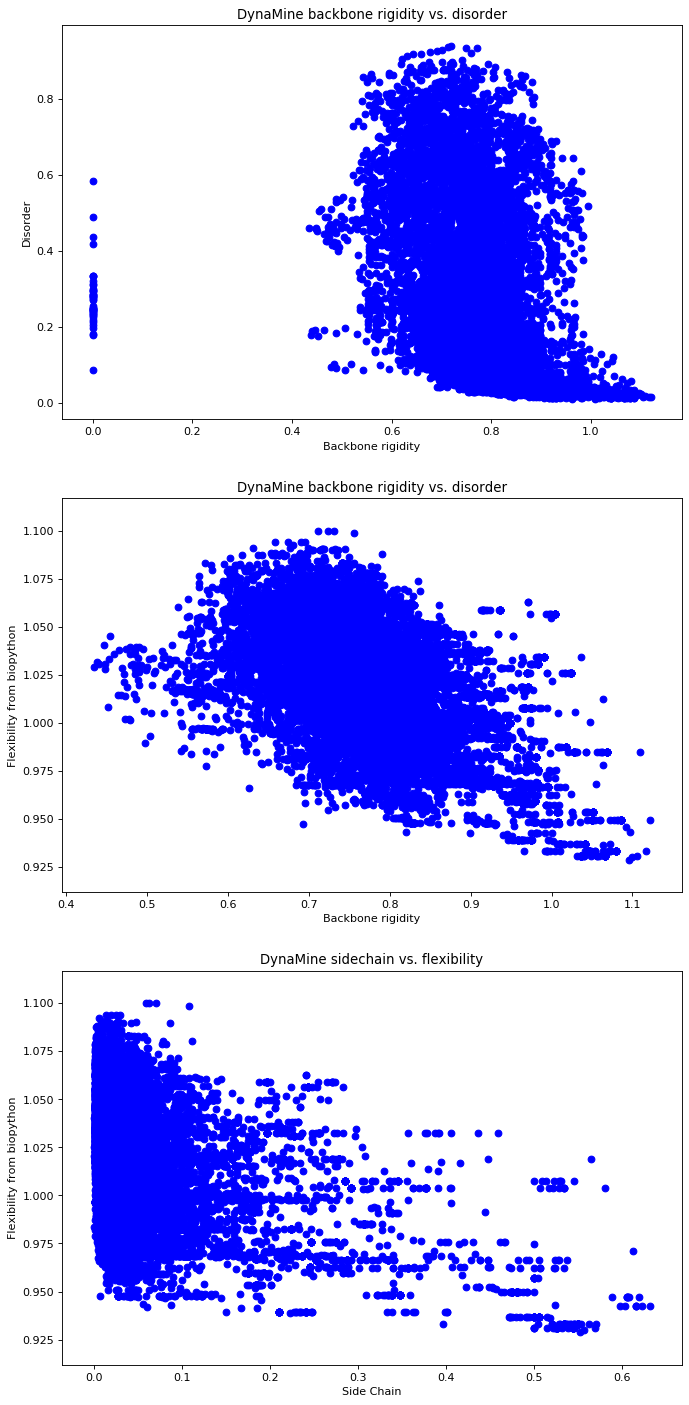

In [13]:
import scipy.stats as stats
import numpy
import matplotlib.pyplot as plt

# 
# Make a large plot to put subplots into
# 

fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')

#
# 1. Check the per-residue dynamine backbone values against the per-residue disomine (disorder) propensity values
#

# Here we make a single list of all residues in all proteins out of the
# list of values per protein that is now available from the pandas dataframe we made
allDynaMineValues = sum(proteinData['backbone'].values.tolist(),[]) 
allDisorderValues = sum(proteinData['disomine'].values.tolist(),[])

# Add a subplot to the main plot - see matplotlib documentation online for more examples/info
# should you want to customise this
axes = fig.add_subplot(411)
# Make a scatter plot
axes.scatter(allDynaMineValues, allDisorderValues, color="b") 
axes.set_title("DynaMine backbone rigidity vs. disorder")
axes.set_xlabel("Backbone rigidity")
axes.set_ylabel("Disorder")

#
# You can see that higher disorder corresponds to lower backbone rigidity (more flexibility)
# It's also possible to calculate the correlation and p-value on this with the numpy package
# From that value you can see that we can be sure of this correlation (low p-value) while
# there is a negative correlation (higher rigidity, lower disorder!)
#

print(stats.pearsonr(allDynaMineValues,allDisorderValues))

# 2. Check the per-residue dynamine backbone values against the biopython flexibility
#    Here the problem is that 9 values are missing in the biopython code, the first 5 and last 4 residues
#

allDynaMineValues = []
for dynaMineValueList in proteinData['backbone'].values.tolist():
    allDynaMineValues.extend(dynaMineValueList[5:-4])
    
allFlexibilityValues = sum(proteinData['flexibility'].values.tolist(),[])

# Add a subplot to the main plot - see matplotlib documentation online for more examples/info
# should you want to customise this
axes = fig.add_subplot(412)
# Make a scatter plot
axes.scatter(allDynaMineValues, allFlexibilityValues, color="b") 
axes.set_title("DynaMine backbone rigidity vs. disorder")
axes.set_xlabel("Backbone rigidity")
axes.set_ylabel("Flexibility from biopython")

#
# You can see that higher disorder corresponds to lower backbone rigidity (more flexibility)
# It's also possible to calculate the correlation and p-value on this with the numpy package
# From that value you can see that we can be sure of this correlation (low p-value) while
# there is a negative correlation (higher rigidity, lower disorder!)
#

print(stats.pearsonr(allDynaMineValues,allFlexibilityValues))

# 3. Check the per-residue dynamine backbone values against the biopython flexibility
#    Here the problem is that 9 values are missing in the biopython code, the first 5 and last 4 residues
#

allDynaMineValues = []
for dynaMineValueList in proteinData['sidechain'].values.tolist():
    allDynaMineValues.extend(dynaMineValueList[5:-4])
    
allFlexibilityValues = sum(proteinData['flexibility'].values.tolist(),[])

# Add a subplot to the main plot - see matplotlib documentation online for more examples/info
# should you want to customise this
axes = fig.add_subplot(413)
# Make a scatter plot
axes.scatter(allDynaMineValues, allFlexibilityValues, color="b") 
axes.set_title("DynaMine sidechain vs. flexibility")
axes.set_xlabel("Side Chain")
axes.set_ylabel("Flexibility from biopython")

#
# You can see that higher disorder corresponds to lower backbone rigidity (more flexibility)
# It's also possible to calculate the correlation and p-value on this with the numpy package
# From that value you can see that we can be sure of this correlation (low p-value) while
# there is a negative correlation (higher rigidity, lower disorder!)
#

print(stats.pearsonr(allDynaMineValues,allFlexibilityValues))

Here we change the script to have a comparison between groups for the plots that display per residue and that are the same data size. 

(-0.6106810128335689, 0.0)
(-0.32732458786034924, 2.2324439597099385e-127)
(-0.3494593534980274, 1.0589090861654276e-118)


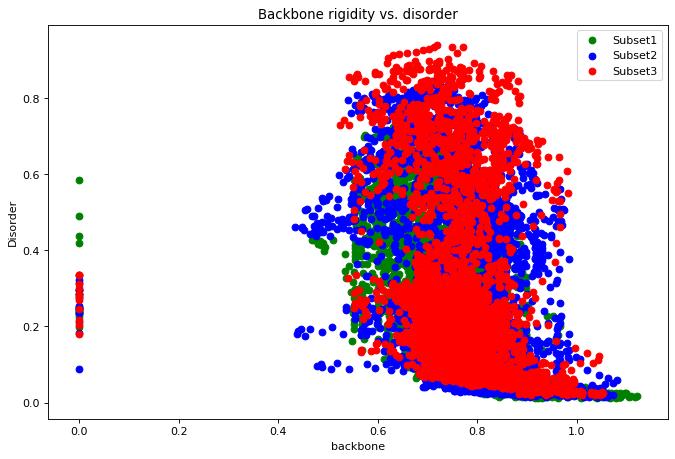

In [14]:
import scipy.stats as stats
import numpy 
import matplotlib.pyplot as plt

# 
# Make a large plot to put subplots into
# 

fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')
# These subsets of protein ID lists you have to generete yourself based on clustering, via SPSS or via a label such as organism
proteinID_subset1 = ['H0X429','Q61081','I3MQN7','A0A2K6T3R7','G3U9M4','Q5EAC6','L5L465','A0A5F7ZMB1','A0A3Q7R113','A0A2U3Z8D5','Q16543','A0A2K5UTH8','A0A2K6PMM1','A0A2I3SMF7','G1QVX5','A0A4X1V8J7','G1RNK0','K7EKQ2']
proteinID_subset2 = ['F7DES9','F6UJW3','A0A402FYL4','A0A0B8RUH5','G1KI32','A0A4D9DHP3','K7G5X4','A0A1U7RP49','A0A091FHY8','A0A1V4KY85','A0A218U7F7','O57476','A0A3Q2UCH4']
proteinID_subset3 = ['V9KU08','Q28CE8','H3AJQ8','W5ML97','H2LLR4','I3IZC1','A0A1A7ZPF8','A0A3Q3B1B3','A0A3B3T5I2','A0A4W4GA37','A0A3M0JGH0']




# Here we get the value per protein (uniprot) ID in each subset, so the values in
# helix_subset1 correspond to the helix fractions in the proteinID_subset1 list,
# the helix_subset2 values to the ones in proteinID_subset2
backbone_subset1 = [proteinData.loc[proteinID]['backbone'] for proteinID in proteinID_subset1]
disomine_subset1 = [proteinData.loc[proteinID]['disomine'] for proteinID in proteinID_subset1]

backbone_subset2 = [proteinData.loc[proteinID]['backbone'] for proteinID in proteinID_subset2]
disomine_subset2 = [proteinData.loc[proteinID]['disomine'] for proteinID in proteinID_subset2]

backbone_subset3 = [proteinData.loc[proteinID]['backbone'] for proteinID in proteinID_subset3]
disomine_subset3 = [proteinData.loc[proteinID]['disomine'] for proteinID in proteinID_subset3]

backbone1=[]
for row in backbone_subset1:
    #for elem in row:
        backbone1 += row


backbone2=[]
for row in backbone_subset2:
    #for elem in row:
        backbone2 += row

backbone3=[]
for row in backbone_subset3:
    #for elem in row:
        backbone3 += row
        
        
disomine1=[]
for row in disomine_subset1:
    #for elem in row:
        disomine1 += row  
        
disomine2=[]
for row in disomine_subset2:
    #for elem in row:
        disomine2 += row 
              
disomine3=[]
for row in disomine_subset3:
    #for elem in row:
        disomine3 += row         
        
        
        
# We now make a list of these separate lists in order to plot it in matplotlib



axes = fig.add_subplot(414)
# This adds a boxplot
axes.scatter(backbone1,disomine1, color='g',label='Subset1')
axes.scatter(backbone2,disomine2, color='b',label='Subset2')
axes.scatter(backbone3,disomine3, color='r',label='Subset3')

axes.legend()



axes.set_title("Backbone rigidity vs. disorder")
axes.set_xlabel("backbone")
axes.set_ylabel("Disorder")

print(stats.pearsonr(backbone1,disomine1))
print(stats.pearsonr(backbone2,disomine2))
print(stats.pearsonr(backbone3,disomine3))

2.4 heat Map

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

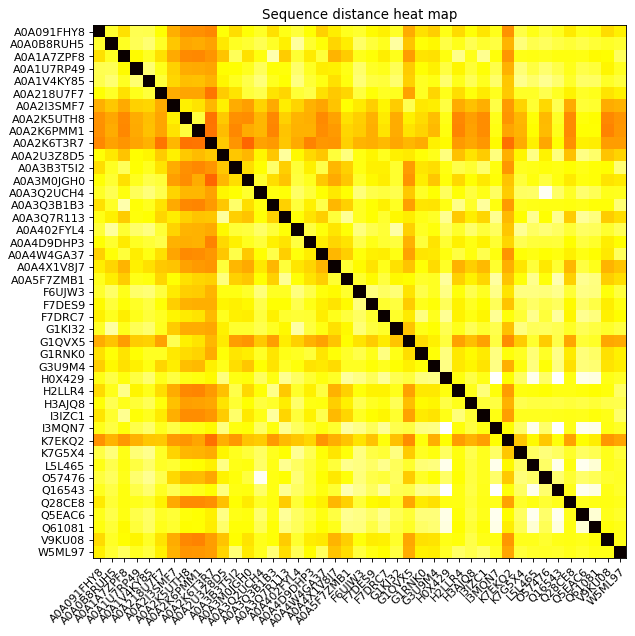

In [15]:
import scipy.stats as stats
import numpy
import matplotlib.pyplot as plt

# 
# Make a large plot to put subplots into
# 

fig = plt.figure(figsize=(10, 30), dpi= 80, facecolor='w', edgecolor='k')


# 2. Heat map of the sequence distances
#

axes = fig.add_subplot(312)

# First make pandas matrix, convert to numpy, send to matplotlib
distanceMatrix_pandas = pd.DataFrame()

# Make sure we stick to the correct uniprot ID order!
for uniprotID1 in uniprotKeys:
    dataValues = []
    for uniprotID2 in uniprotKeys:
        if uniprotID1 == uniprotID2:
            value = 0
        else:
            value = seqDistData[uniprotID1][uniprotID2]
        dataValues.append(value)
        
    distanceMatrix_pandas[uniprotID1] = dataValues

distanceMatrix_numpy = distanceMatrix_pandas.to_numpy()

axes.imshow(distanceMatrix_numpy, cmap='hot', interpolation='nearest')
axes.set_title("Sequence distance heat map")
axes.set_xticks(numpy.arange(len(uniprotKeys)))
axes.set_yticks(numpy.arange(len(uniprotKeys)))
axes.set_xticklabels(uniprotKeys)
axes.set_yticklabels(uniprotKeys)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
